### fetch the data

In [4]:
#--- extract the catalog (new)

import pandas as pd
#import matplotlib; matplotlib.use('agg')
import sys
from matplotlib import rc
import matplotlib
import matplotlib.pylab as plt
import numpy as np
from matplotlib import patches
import warnings
import matplotlib.ticker
import matplotlib as mpl
#from mpl_toolkits.mplot3d import Axes3D
import datetime
#import path
from math import *
import matplotlib.dates as mdates
from matplotlib import dates
import matplotlib.dates as md
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
import itertools
import traceback
from scipy.ndimage import gaussian_filter
import math

mpl.rcParams.update(mpl.rcParamsDefault)
warnings.filterwarnings('ignore') #--- get rid of warnings

rc('text', usetex=True)
font = {'size'   : 20}
matplotlib.rc('font', **font)

def DrawFrame(ax, (alpha_xl,alpha_xr),(alpha_yb,alpha_yt),linewidth,LOG_X=None,LOG_Y=None):
    [xlo,xhi,ylo,yhi] = ax.axis()
    if LOG_X:
        [xlo,xhi,junk,junk] = np.log10(ax.axis())
    if LOG_Y:
        [junk,junk,ylo,yhi] = np.log10(ax.axis())
    lx = xhi - xlo
    ly = yhi - ylo
    xy = [xlo - alpha_xl * lx, ylo - alpha_yb * ly]
    height = ly*(1+alpha_yb+alpha_yt)
    width = lx*(1+alpha_xl+alpha_xr)
    xy_end=[xy[0]+width,xy[1]+height]
    if LOG_X:
        xy[0] = 10 ** xy[0]
        xy_end[0] = 10 ** xy_end[0]
    if LOG_Y:
        xy[1] = 10 ** xy[1]
        xy_end[1] = 10 ** xy_end[1]
    ax.add_patch( patches.Rectangle(xy=xy, width=xy_end[0]-xy[0], 
                                    height=xy_end[1]-xy[1], linewidth=linewidth,
                                    clip_on=False,facecolor=None,edgecolor='black',fill=None) ) 
    
#--- add a new time attribute
def ConvertTime( df_in ):
    df=df_in.copy()
#    display(df.head())
#    df.insert(0,'date',pd.to_datetime(swarm[['yyyy','mm','dd','HH','MM','SS.SSS']]))
    df.insert(0,'date',pd.to_datetime(swarm['yyyy'].apply(lambda x:'%s'%x)+\
                   swarm['mm'].apply(lambda x:'-%s'%x)+\
                   swarm['dd'].apply(lambda x:'-%s'%x)+\
                   swarm['HH'].apply(lambda x:'\t%s:'%x)+\
                  swarm['MM'].apply(lambda x:'%s:'%x)+\
                  swarm['SS.SSS'].apply(lambda x:'%s'%x)))

    df.drop(['yyyy','mm','dd','HH','MM','SS.SSS'],axis=1,inplace=True)
    return df

#--- set path
SWARM_PATH = './dataset/Fillmore2015/SRL-2016020_esupp_Table_S2.txt' #--- comment if passed by arg.
DIR_OUTPT = '.' #'/dataset/Fillmore2015' 
DIR_OUTPT_figs = '.' #'/dataset/figs'

#--- store
swarm = pd.read_csv( SWARM_PATH, sep = ',' ) #--- parse data

swarm = ConvertTime( swarm ) #--- add new column 'date'

#--- sort based on time
swarm.sort_values(by=['date'],inplace=True)

#--- reindex
swarm.reset_index(inplace=True,drop=True)

#--- rename cols
swarm = swarm.rename(index=str,columns={'lat(deg)':'latitude','lon(deg)':'longitude'
                                       ,'depth(km)':'depth'})
swarm['depth'] *= -1
swarm.head()

,date,latitude,longitude,depth,x(m),y(m),z(m),magnitude
0,2015-07-05 02:21:34.740,34.401705,-118.980013,-13.762,395.1,-132.6,-319.5,1.03
1,2015-07-05 02:27:58.120,34.401575,-118.980452,-13.991,354.8,-147.2,-89.6,0.46
2,2015-07-05 04:12:26.250,34.401432,-118.979883,-13.962,407.2,-163.1,-119.0,0.53
3,2015-07-05 04:30:14.420,34.401912,-118.979582,-13.891,434.7,-109.9,-189.9,0.36
4,2015-07-05 04:51:22.640,34.401424,-118.979769,-13.802,417.3,-164.0,-279.3,0.57


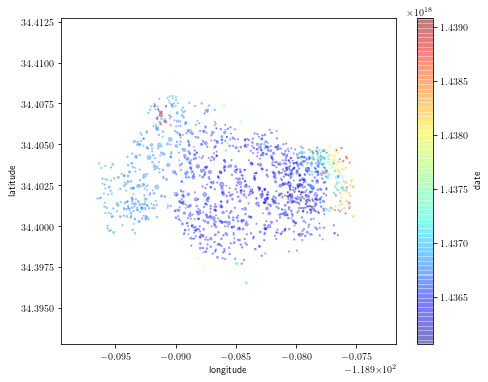

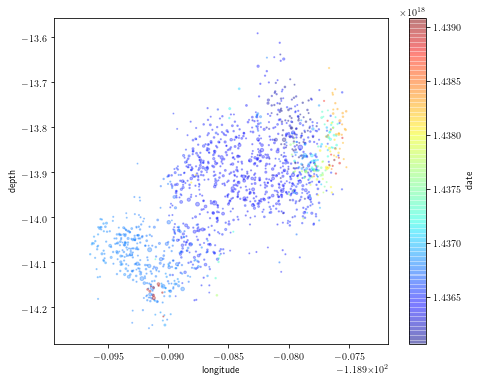

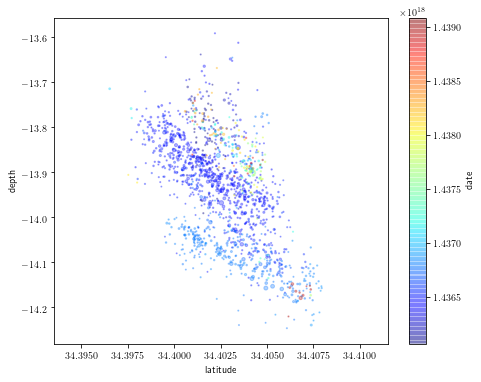

In [5]:
#--- plot spatial map 
#--- fault map california: temporal evolution of events


def DataFrameSubSet( df, column, (xmin,xmax) ):
    return df[ ( df[column] >= xmin ) & 
               ( df[column] < xmax ) ]

#--- subset of data
cc=1.5
swarm_lohi = swarm.copy()#DataFrameSubSet( swarm, 
                          #   'date', 
                           #  ( pd.to_datetime('2010-04-04'), pd.to_datetime('2010-06-26') ) )

swarm_lohi.plot.scatter('longitude','latitude',
                        s=3**(swarm_lohi['magnitude']),
                        c='date',cmap='jet',
                        alpha=0.3,figsize=(5*cc,4*cc)) #--- plot

#plt.savefig('%s/map0.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
swarm_lohi.plot.scatter('longitude','depth',
                        s=3**(swarm_lohi['magnitude']),
                        c='date',cmap='jet',
                        alpha=0.3,figsize=(5*cc,4*cc)) #--- plot

#plt.savefig('%s/map1.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')

swarm_lohi.plot.scatter('latitude','depth',
                        s=3**(swarm_lohi['magnitude']),
                        c='date',cmap='jet',
                        alpha=0.3,figsize=(5*cc,4*cc)) #--- plot

#plt.savefig('%s/map2.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')

plt.show()

#plt.figure(figsize=(6,6)).gca(projection='3d')
#plt.xlabel('Long')
#plt.ylabel('Lat')
#plt.scatter(swarm_lohi['longitude'],
 #           swarm_lohi['latitude'],
  #          swarm_lohi['depth']) #s=10*swarm['magnitude'],cmap='jet') #--- plot


### plot spatial map

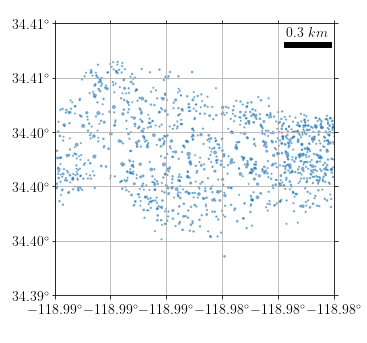

In [6]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm


swarm_lohi = swarm.copy()

exponent = 2.5
alpha=.5
dff = swarm_lohi.copy()
# (injection_period, xlo, xhi ) = (0, dff['date'].min(),
#                     pd.to_datetime('2019-07-6 00:00:00'))
(injection_period, xlo, xhi ) = (1, dff['date'].min(),
                                 dff['date'].max()
                    )


#--- plot
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
#ax.tick_params(labelsize='small')

#--- xmax, xmin
Xlo = swarm_lohi['longitude'].min()
Xhi = swarm_lohi['longitude'].max()
Ylo = swarm_lohi['latitude'].min()
Yhi = swarm_lohi['latitude'].max()
dx=0.5*max(Xhi-Xlo,Yhi-Ylo)*.75
xc=0.5*(Xlo+Xhi)
yc=0.5*(Ylo+Yhi)
ax.set_xlim(xc-dx,xc+dx)
ax.set_ylim(yc-dx,yc+dx)

#--- set tick labels
xx={0:xc,1:yc}
xlist=np.linspace(xx[0]-dx,xx[0]+dx,6,endpoint=True)
ax.set_xticks(xlist)
xlist=[r'$%4.2f^{\circ}$'%i for i in xlist]
#
ylist=np.linspace(xx[1]-dx,xx[1]+dx,6,endpoint=True)
ax.set_yticks(ylist)
ylist=[r'$%4.2f^{\circ}$'%i for i in ylist]
#ax.tick_params(labelsize=12)
ax.tick_params(axis='y',labelright=False,labelleft=True,right=True,left=True)
ax.tick_params(axis='x',top=True)#,left=True)
ax.set_xticklabels(xlist,{'fontsize':14})
ax.set_yticklabels(ylist,{'fontsize':14})
    
#--- filter
dff = dff[(dff['date'] > xlo) &\
                      (dff['date'] < xhi)] #--- inj
#--- plot
#    ax.set_title(r'$%s$'df_lohi.iloc[itime]['date'])#,labelsize='small')
line=ax.scatter(dff['longitude'],dff['latitude'],
                        s=exponent**(dff['magnitude']),
#                        label=df_lohi.iloc[itime]['date'],
                        alpha=alpha,animated=True,color='C0') #--- plot
#ax.legend()

#--- plt grid
plt.grid()

# #--- mmax
# m_max = dff['magnitude'].max()
# x0=dff['longitude'][dff['magnitude']==m_max].iloc[0]
# y0=dff['latitude'][dff['magnitude']==m_max].iloc[0]
# plt.scatter(x0,y0,
#                     s=exponent**m_max,
#                     marker='*',zorder=3,
#                     facecolors='yellow',color='black',
#                     alpha=1.0)
# # #--- 2nd max
# m_max=dff.sort_values(by='magnitude',ascending=False)['magnitude'].iloc[1]
# x0=dff['longitude'][dff['magnitude']==m_max].iloc[0]
# y0=dff['latitude'][dff['magnitude']==m_max].iloc[0]
# plt.scatter(x0,y0,
#                     s=exponent**m_max,
#                     marker='*',zorder=3,
#                     facecolors='yellow',color='black',
#                     alpha=1.0)

DrawFrame(ax, (0.17,0.09),(0.15,0.06),0.01)

fontprops = fm.FontProperties(size=14)
xx=1/111.0
yy = 0.3 #---km
scalebar = AnchoredSizeBar(ax.transData,
                           yy*xx, r'$%s~km$'%yy, 'upper right',label_top=True,
#                           pad=0.1,
                           fill_bar='white',
                           frameon=False,#,
                           size_vertical=yy*xx/10,
                           fontproperties=fontprops)

ax.add_artist(scalebar)


fig.savefig('%s/spatialFillmore.png'%(DIR_OUTPT_figs),dpi=150,bbox_inches='tight')
plt.show()


### make movies

In [7]:
# import os

# class makeDATA:
#     def __init__(self, write, read = None ):
#         self.wirite = write
#         self.read = read   # embedded object: attrs (coord, lohi, type, vel)

#     def __del__( self ):
#         self.wirite.close()

#     def Map(self, coord, comnt, *args ):
#          nAtom = len(coord)
#          self.wirite.write('%s\n%s\n'%(nAtom,comnt))
#          for i in coord:
#              ndime = len( coord[i] )
#              self.wirite.write('%s\t'% i)
#  #           self.wirite.write('%d\t'% type[i])
#              for idime in xrange( ndime ):
#                  self.wirite.write('%e\t'%coord[i][idime] )
#              if args:
#                  for dics in args:
#  #                   if type( dics[ i ] == type( 1 ) ):
#  #                       self.wirite.write( '%d\t' % dics[ i ] )
#  #                   else:
#                      VAL = 0.0 if abs(dics[ i ])<1.0e-15 else dics[ i ]
#                      self.wirite.write( '%s\t' % VAL )
#                  self.wirite.write( '\n' )
#              else:
#                  self.wirite.write( '\n' )
#          self.wirite.flush()
#          self.wirite.close()

# swarm_lohi.sort_values(by='date',inplace=True)            
# coord_length=swarm_lohi['longitude'].apply(lambda x:[x])+swarm_lohi['latitude'].apply(lambda x:[x])
# Magnitude = np.exp(swarm_lohi['magnitude'])/20000

# makeDATA( open( '%s/map.xyz'%DIR_OUTPT, 'w' ), None ).Map( coord_length.to_dict(), 'ITIME=%s'%0, Magnitude.to_dict()) #--- instantanuous
# EVENT_ID = Magnitude.keys()
# EVENT_ID = map(int,EVENT_ID)
# EVENT_ID.sort()
# cords={}
# mag={}
# t0 = None
# os.system('rm %s/temporalMap.xyz'%DIR_OUTPT)
# for j_event,indexx in zip(EVENT_ID,xrange(10000)):
# #    print j_event
#     t = swarm_lohi['date'].iloc[ j_event ]
#     if not t0:
#         t0 = t
#     assert t >= t0, 't0=%s,t=%s'%( t0, t )
#     #--- temporal map 
#     cords[ j_event ] = coord_length[ j_event ]
#     mag[ j_event ] = Magnitude[ j_event ]
#     itime=swarm_lohi[ 'date' ].iloc[ j_event ]
#     tstr='%s-%s'%(itime.strftime("%x"), itime.strftime("%X"))
#     makeDATA( open( '%s/temporalMap.xyz'%DIR_OUTPT, 'a' ), None ).Map( cords, 'ITIME=%s'%itime, mag ) #--- instantanuous
#     t0 = t
    
    
    

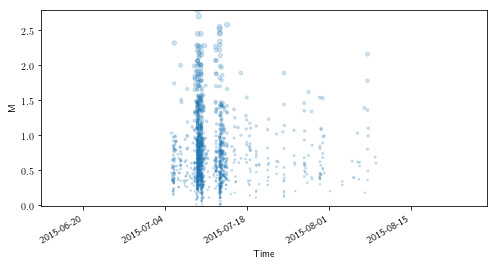

In [8]:
# #--- plot timeseries


class Tlohi:
     def __init__(self,lo,hi):
        self.lo = lo
        self.hi = hi

fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(111)
plt.xlabel('Time')
plt.ylabel('M')

plt.ylim(swarm['magnitude'].min(),swarm['magnitude'].max())

#tt=swarm[swarm['magnitude']==swarm['magnitude'].sort_values(ascending=False).iloc[3]]['date']
#plt.xlim(tt-datetime.timedelta(days=30),tt+datetime.timedelta(days=30))# pd.to_datetime('2014-12-04'),pd.to_datetime('2015-06-1'))
#plt.xlim(swarm['date'].min(),pd.to_datetime('2010-07-20'))
plt.scatter(swarm['date'],swarm['magnitude'],
            s=2*np.exp(swarm['magnitude']),
            alpha=0.2)

#myTlohi = Tlohi( pd.to_datetime('2010-04-08'), 
#                 pd.to_datetime('2010-07-01'))

#plt.plot([myTlohi.lo,myTlohi.lo],
#        [-2,7],'r-')

#plt.plot([myTlohi.hi,myTlohi.hi],
#        [-2,7],'r-')
fig.autofmt_xdate()
#plt.savefig('%s/timeSeries.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
plt.show()


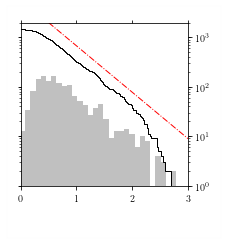

In [9]:
#--- freq-magnitude relation

import sys 

def histogramACCUMLTD( slist ):
    assert type( slist ) == type( [] ), 'arg must be a list. a %s is given!' %( type( slist ) )
    d = {}
    for item in slist:
        try:
            d[ item ] += 1
        except:
            d[ item ] = 1
    keys = d.keys()
    keys.sort()

    cdf = 0.0
    xi = min( slist ) - 1.0e-6
    xf = max( slist ) + 1.0e-6
    npoin = len( slist )
    adict = {}
    for ikey, index in zip( keys, xrange( sys.maxint ) ):
        adict[ index ] = [ xi, ikey, cdf ]
        cdf += 1.0 * d[ ikey ] # / npoin
        xi = ikey
    adict[ index + 1 ] = [ xi, xf, cdf ]
    return adict





#--- set min/max time to avoid temporal incompletenesss issue
swarm_copy = swarm.copy()#DataFrameSubSet( swarm, 
                          #   'date', 
                           #  ( myTlohi.lo, 
                            #   myTlohi.hi ) )
#--- min/max magnitude
xmin=swarm_copy['magnitude'].min()
xmax=swarm_copy['magnitude'].max()

#--- accumulated histogram
N = len(swarm_copy['magnitude'])
slist=np.array(swarm_copy['magnitude'])
slist.sort()
d = histogramACCUMLTD( slist.tolist() )
keys=d.keys()
keys.sort()

#--- plot
fig= plt.figure(figsize=(3,3))#,dpi=75)
ax = fig.add_subplot(111)


ax.axis([np.floor(xmin)+1,np.ceil(xmax),1,2e3])
ax.set_yscale('log')

#--- add major xticks
xmin=np.ceil(ax.axis()[0])
xmax=np.floor(ax.axis()[1])
nbin = xmax - xmin
ax.set_xticks(np.linspace(ax.axis()[0],ax.axis()[1],int(nbin)+1))

#--- add major yticks
ymin=np.ceil(np.log10(ax.axis()[2]))
ymax=np.floor(np.log10(ax.axis()[3]))
nbin = ymax - ymin
ax.set_yticks(np.logspace(ymin,ymax,int(nbin)+1))

#--- put minor bins
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#--- put minor bins y
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.tick_params(axis='y',left=True, right=True,which='both',labelleft=False, labelright=True)
ax.tick_params(axis='x',bottom=True, top=True,which='both')


dx=0.1
junk = ax.hist( swarm_copy['magnitude'],
                bins=int((xmax-xmin)/dx),
               label='histogram',color='silver') #--- histogram
xx=[];yy=[]
for ikey in keys:
    xx.append(d[ikey][0])
    yy.append(N-d[ikey][2])
ax.plot(xx,yy,
            linestyle='-', drawstyle='steps-post',color='black',
             linewidth=1.0) #--- accumulated
    
b=0.94
ax.plot([.5,3],[2e3, 2e3* 10**(-b*(3-.5))],'r-.',linewidth=1)

DrawFrame(ax, (0.08,0.2),(0.32,0.1),0.01,LOG_Y=True) 

#plt.savefig('%s/gr.png'%DIR_OUTPT_figs,dpi=300,bbox_inches='tight')#,transparent=True)
plt.show()


In [10]:
swarm_copy['magnitude'].min()

-0.01

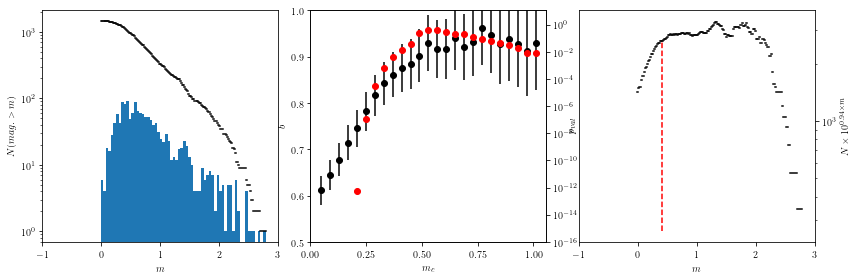

In [11]:
#--- estimate b by varying the mc value

from math import *
import scipy.stats

#--- set min/max time to avoid temporal incompletenesss issue
swarm_copy = swarm.copy()#DataFrameSubSet( swarm.copy()#, 
                          #   'date', #
                           #  ( myTlohi.#lo, 
                            #   myTlohi.hi# ) )

#--- plot distributions (Nm)
fig = plt.figure(figsize=(12,4))
ax=fig.add_subplot(131)
ax.set_xlabel('$m$')
ax.set_ylabel('$N(mag.>m)$')
xmin = np.floor(swarm_copy['magnitude'].min())
xmax = np.ceil(swarm_copy['magnitude'].max())
ax.set_xticks(np.linspace(xmin,xmax,int(xmax-xmin)/1+1))
ax.set_xlim(xmin,xmax)
#plt.ylim(1,1e5)
ax.set_yscale('log')
for ikey in keys:
    ax.plot([d[ikey][0],d[ikey][1]],
             [N-d[ikey][2],N-d[ikey][2]],
             '-',color='black') #--- accumulated
junk = ax.hist( swarm_copy['magnitude'],
                bins=64,
               label='histogram') #--- histogram

#--- list of magnitudes
mm_list = swarm_copy['magnitude'].to_list()
mm_list = np.sort(mm_list)

#--- b vs mc
ax2=fig.add_subplot(132)
ax2.set_xticks(np.linspace(0,1,5,endpoint=True))
ax2.set_ylim(0.5,1.0)
ax4 = ax2.twinx()
ax4.set_yscale('log')
ax4.set_ylim(1e-16,)
#plt.xlim(0.0,1.5)
ax2.set_xlabel('$m_c$')
ax2.set_ylabel('$b$')
ax4.set_ylabel(r'$p_{val}$',labelpad=-10)
ax4.set_xticks(np.linspace(0,1,5,endpoint=True))

#--- bvalue bhatacharya eq. 5
DM = 0.01
n = 25
#--- 
MC = []
B = []
Err_B = []
pval = []
for mc_new in [0.05+i*0.04 for i in xrange(n)]: #--- m values are quantized (+- 0.1)!
    mlist = swarm_copy[ swarm_copy['magnitude']-mc_new>=0.0]['magnitude'] 
    m_mean=mlist.mean()
    assert m_mean-mc_new > 0.0#, 'm_mean=%s,mc=%s'%( m_mean, mc )
    k_mean = (m_mean-mc_new)/DM
    b_value = log(np.exp(1),10)*log(1+DM/(m_mean-mc_new))/DM
    nsamp = len(mlist)
    err_b = 1.96 * b_value / nsamp ** 0.5 #1.96*(b_value/nsamp/log(10,exp(1.0)))**0.5
#    err_b = 2*(k_mean*(k_mean+1)/nsamp)**0.5/log(10,exp(1.0)) #--- Guttorp and Hopkins (1986) eq.(4)

    
    
#     #--- bvalue bhatacharya eq. 6
#     #--- accumulated histogram
#     slist = mm_list[ mm_list>=mc_new ]
#     slist.sort()
#     NN = len(slist)
#     cdf = histogramACCUMLTD( slist.tolist() )
#     #--- bvalue bhatacharya eq. 6
#     n_cdf=len(cdf)-1
#     bi = []
#     for i in xrange(n_cdf):
#         mi = cdf[ i ][ 0 ]
#         Ni = NN - cdf[ i ][ 2 ]
#         bij = []
#         for j in xrange(n_cdf):
#             mj = cdf[ j ][ 0 ]
#             Nj = NN - cdf[ j ][ 2 ]
#             if i == j: continue
#             slope = ( log( Nj, 10 ) - log( Ni, 10 ) ) / ( mj - mi )
#             assert not np.isnan(slope)
#             bij.append( slope )
#         bi.append( np.median( bij ) )
#     bval_2nd = -np.median( bi )
#     err_b2nd = np.std(bi)/(len(bi))**0.5
    
    #--- plot b vs mc
    ax2.errorbar([mc_new],[b_value],yerr=err_b,marker='o',color='black')
#    ax2.errorbar([mc_new],[bval_2nd],yerr=err_b2nd, marker='s',color='green')
    
    #---
    MC.append(mc_new)
    B.append(b_value)
    Err_B.append(err_b)

    #--- p-value (by hand)
    (dmax,pval2nd) = scipy.stats.kstest( mlist, lambda x: 1.0-10**(-b_value*(x-mc_new)))
    ax4.plot([mc_new],[pval2nd],marker='o',color='red')
    pval.append(pval2nd)
#    print b_value, pval2nd 

#--- choose the range of mc
mc_range=[0.4,0.4]
index_tf = [i and j for i, j in zip(mc_range[0]<=np.array(MC),np.array(MC)<mc_range[1])]
bvall =  np.array(B)[index_tf]
Err_B =  np.array(Err_B)[index_tf]

#--- b vs mc: vertical lines
#ax2.plot([mc_range[0],mc_range[0]],[np.min(B),np.max(B)],'--r')    
#ax2.plot([mc_range[1],mc_range[1]],[np.min(B),np.max(B)],'--r')    

#--- N vs m: vertical line
#ax.plot([mc_range[0]+DM/2,mc_range[0]+DM/2],
 #       [1,len(swarm_copy['magnitude'])],'--r')    

#--- n*10*bm (rescaled)
bval=0.94 #np.mean(bvall)
#bval2=0.8
ax3=fig.add_subplot(133)
ax3.set_xlabel('$m$')
#ax3.set_ylabel(r'$N\times10^{%s\times m}$'%bval)
ax3.set_ylabel(r'$N\times10^{%s\times m}$'%bval)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_yscale('log')
ax3.set_xticks(np.linspace(xmin,xmax,int(xmax-xmin)/1+1))
ax3.set_xlim(xmin,xmax)
#ax3.set_ylim(1e3,1e6)
#ax3.set_xticks(np.linspace(ax3.axis()[0],ax3.axis()[1],4))
for ikey in keys: #--- rescaled
    c = 10**(bval*d[ikey][0])
    ax3.plot([d[ikey][0],d[ikey][1]],
             [c*(N-d[ikey][2]),c*(N-d[ikey][2])],'-',color='black',
            ) #--- accumulated
#     c = 10**(bval2*d[ikey][0])
#     ax3.plot([d[ikey][0],d[ikey][1]],
#              [c*(N-d[ikey][2]),c*(N-d[ikey][2])],'-',color='red',
#              ) #--- accumulated
ax3.plot([mc_range[0]+DM/2,mc_range[0]+DM/2], #--- vertical line
        [len(swarm_copy[swarm_copy['magnitude']>mc_range[0]])*10**(bval*mc_range[0])/10,
         len(swarm_copy[swarm_copy['magnitude']>mc_range[0]])*10**(bval*mc_range[0])],'--r')    
#plt.plot(MC, pval,'-o',color='black')

# mc_new = 0.5
# b_value = 0.94
# ax2.scatter([mc_new],[b_value],marker='s',color='green')
# mlist = swarm_copy[ swarm_copy['magnitude']-mc_new>=0.0]['magnitude'] 
# (dmax,pval2nd) = scipy.stats.kstest( mlist, lambda x: 1.0-10**(-b_value*(x-mc_new)))
# ax4.plot([mc_new],[pval2nd],marker='o',color='green')


fig.tight_layout(w_pad=-0.5)
#fig.savefig('%s/b.png'%DIR_OUTPT_figs,dpi=75)
plt.show()


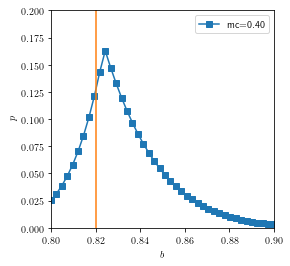

In [12]:
fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.set_yscale('log')
ax.set_xlim(0.8,.9)
ax.set_ylim(0,0.2)
ax.set_xlabel('$b$')
ax.set_ylabel('$p$')

bb_range=np.linspace(0.94-0.14,0.94+0.14,29*2*2)
#ax.set_xticks(bb_range)

for mc_new in [0.4]: #np.linspace(0.4-0.1,0.4+0.1,5*2):
    mlist = swarm_copy[ swarm_copy['magnitude']-mc_new>=0.0]['magnitude'] 
    pvall={}
    for bb in bb_range :
        (dmax,pval2nd) = scipy.stats.kstest( mlist, 
                                            lambda x: 1.0-10**(-bb*(x-mc_new)))
        pvall[bb] = pval2nd
    
    pvals=pd.Series(pvall)
    ax.plot(pvals.index,pvals,'-s',label='mc=%3.2f'%mc_new)
    ax.legend(bbox_to_anchor=(1,1))

ax.plot([0.82,0.82],[0,0.2])

In [13]:
##--- estimate b and mc
#
#
#with path.Path('/Users/Home/Desktop/Tmp/txt/myPYlibs'):
#    import plfit
#    import plvar
#    import plpva
#
##--- set min/max time to avoid temporal incompletenesss issue
#swarm_copy = swarm.copy()#DataFrameSubSet( swarm, 
#                          #   'date', 
#                           #  ( myTlohi.lo, 
#                            #   myTlohi.hi ) )
#
##--- power law fit clauset
#n_samp = 1000
#n_chunk = len( swarm_copy ) / n_samp
#
#i = 0
#fig = plt.figure(figsize=(8,4))
#ax = fig.add_subplot(111)
#ax.set_ylabel('m')
#ax2=ax.twinx()
#ax.scatter(swarm_copy['date'],swarm_copy['magnitude'],
#          alpha=0.1)
#
#fig2 = plt.figure(figsize=(8,4))
#ax21 = fig2.add_subplot(111)
#ax21.set_ylabel('m')
#ax21.scatter(swarm_copy['date'],swarm_copy['magnitude'],
#          alpha=0.1)
#
#MC = []
#B = []
#for j in xrange(n_chunk):
#    Mlist = 10**(swarm_copy.iloc[i:i+n_samp]['magnitude'])
#    fit = plfit.plfit( np.array(Mlist) ) #--- clauset
#    mc = log(fit[1],10) #--- completeness mag.
#    bval = fit[0]-1
#    MC.append(mc)
#    B.append(bval)
##    print mc, bval
#    ax2.plot([swarm_copy.iloc[i:i+n_samp]['date'].min(),swarm_copy.iloc[i:i+n_samp]['date'].max()],
#            [bval,bval],'-',color='red')
#
#    ax21.plot([swarm_copy.iloc[i:i+n_samp]['date'].min(),swarm_copy.iloc[i:i+n_samp]['date'].max()],
#            [mc,mc],'-',color='red')
#
#    i += n_samp
#Mlist = 10**(swarm_copy.iloc[i:i+len(swarm_copy)%n_samp]['magnitude'])
#fit = plfit.plfit( np.array(Mlist) ) #--- clauset
#mc = log(fit[1],10) #--- completeness mag.
#bval = fit[0]-1
#MC.append(mc)
#B.append(bval)
#
##---- plot bval
#ax2.plot([swarm_copy.iloc[i:i+n_samp]['date'].min(),swarm_copy.iloc[i:i+n_samp]['date'].max()],
#            [bval,bval],'-',color='red')
#ax2.tick_params(colors='red')
#ax2.set_ylabel('b',color='red')
#ax.set_xlabel('Date')
##print mc, bval
##fig.savefig('%s/b.png'%DIR_OUTPT_figs,dpi=75)
##--- plot mc
#ax21.plot([swarm_copy.iloc[i:i+n_samp]['date'].min(),swarm_copy.iloc[i:i+n_samp]['date'].max()],
#            [mc,mc],'-',color='red',label='mc')
#plt.legend()
#ax21.set_xlabel('Date')
#
##n, bins, patches = plt.hist(B, 50)
#
##--- error estimate
##[ error_b, error_mc, ntail ] = [ 0.0, 0.0, 0.0 ]
##[error_b, error_mc, ntail] = plvar.plvar(np.array(Mlist), 'silent')
##error_mc = log(1.0+error_mc/fit[1],10) #--- log(1+dM/M)
##plt.savefig('%s/mc.png'%DIR_OUTPT_figs,dpi=75)

In [14]:
# #--- goodness of the fit

# n_samp = 1000
# n_chunk = len( swarm_copy ) / n_samp
# ncols=4
# nrows = n_chunk / ncols + int(np.ceil(1.0*( len(swarm_copy) % n_samp) / n_samp))
# i = 0
# plt.figure(figsize=(ncols*4,nrows*4))
# for j in xrange(n_chunk):
#     Mlist = 10**(swarm_copy.iloc[i:i+n_samp]['magnitude'])
#     fit = plfit.plfit( np.array(Mlist) ) #--- clauset
#     mc = log(fit[1],10) #--- completeness mag.
#     bval = fit[0]-1
# #    [error_b, error_mc, ntail] = plvar.plvar(Mlist, 'silent') #--- error
#     plt.subplot(nrows,ncols,j+1)
#     Mlist=np.log10(Mlist)
#     nc = len(Mlist[Mlist>=mc])
#     error_b = (bval / nc / log(10.0) )**0.5
#     hist,bins = np.histogram(Mlist,bins=1024)
#     plt.plot(bins[:-1],-hist.cumsum()+len(Mlist))#,marker='o',markersize=6,linestyle='None')
#     xc=0.5*(bins[:-1]+bins[1:])
#     plt.plot(xc, len(Mlist[Mlist>=mc])*10**(-bval*(xc-mc)),'r',label='$b=%2.1f\pm%3.2f$'%(bval,error_b))
#     plt.plot([mc,mc],[1,len(Mlist[Mlist>=mc])],label='$mc=%2.1f$'%(mc)) # len(Mlist[Mlist>=mc])*10**(-bval*(xc-mc)),'r')
#     plt.yscale('log')
#     plt.xlim(swarm_copy['magnitude'].min(),swarm_copy['magnitude'].max())
#     plt.ylim(1,n_samp*10)
#     if j == 0:
#         plt.ylabel('N(size>m)')
#         plt.xlabel('m')
#     plt.legend()
#     i += n_samp

# Mlist = 10**(swarm_copy.iloc[i:i+len(swarm_copy)%n_samp]['magnitude'])
# fit = plfit.plfit( np.array(Mlist) ) #--- clauset
# mc = log(fit[1],10) #--- completeness mag.
# bval = fit[0]-1
# Mlist=np.log10(Mlist)
# nc = len(Mlist[Mlist>=mc])
# error_b = (bval / nc / log(10.0) )**0.5
# hist,bins = np.histogram(Mlist,bins=1024)

# plt.subplot(nrows,ncols,j+2)
# plt.plot(bins[:-1],-hist.cumsum()+len(Mlist))#,marker='o',markersize=6,linestyle='None')
# xc=0.5*(bins[:-1]+bins[1:])
# plt.plot(xc, len(Mlist[Mlist>=mc])*10**(-bval*(xc-mc)),'r',label='$b=%2.1f\pm%3.2f$'%(bval,error_b))
# plt.plot([mc,mc],[1,len(Mlist[Mlist>=mc])],label='$m_c=%2.1f$'%(mc)) # len(Mlist[Mlist>=mc])*10**(-bval*(xc-mc)),'r')
# plt.yscale('log')
# plt.xlim(swarm_copy['magnitude'].min(),swarm_copy['magnitude'].max())
# plt.ylim(1,n_samp)
# plt.legend()

# #plt.savefig('%s/b_mult.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
    

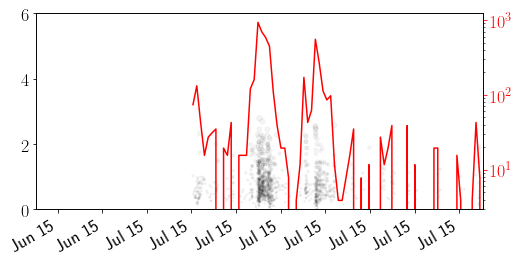

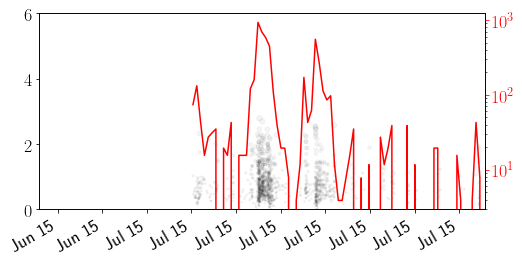

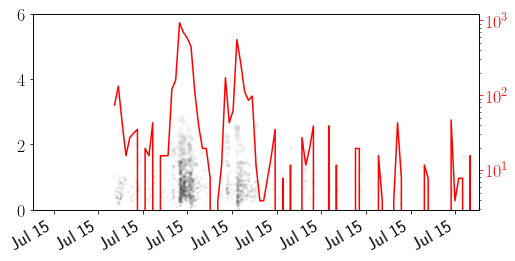

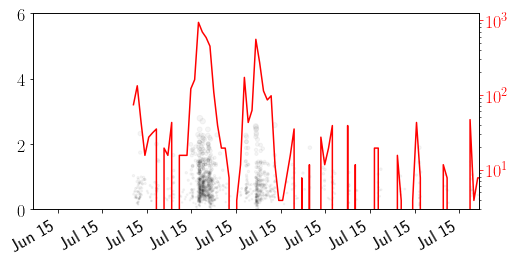

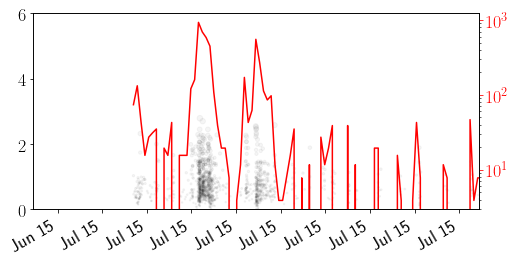

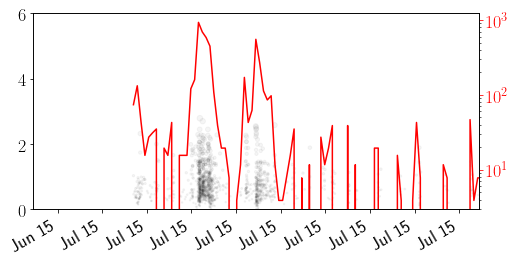

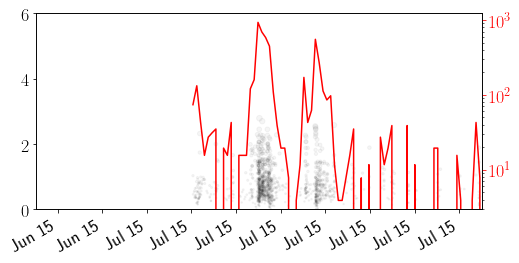

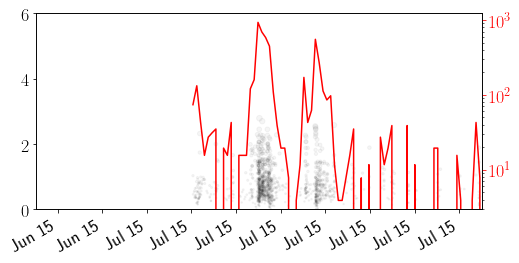

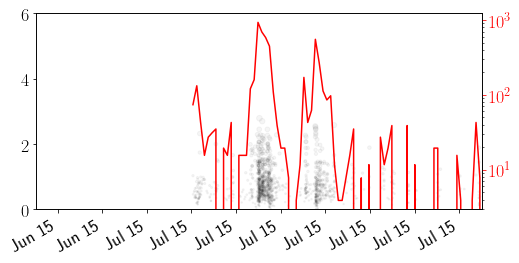

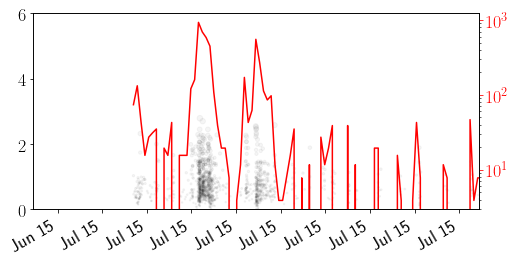

In [15]:
#--- plot complete catalog

def ConvertDailyRate(hist, bin_edges ):
#---convert data to daily rate     
    t0 = pd.to_datetime( bin_edges[ 0 ] )
    t1 = pd.to_datetime( bin_edges[ 1 ] )
    delta_t = ( t1 - t0 ).total_seconds() / ( 60 * 60*24)
    hist *= ( bin_edges[ 1 ] - bin_edges[ 0 ] ) / delta_t

def ActivityRate( swarm ):
    nbins = int( (swarm['date'].max()-swarm['date'].min()).days*4 ) #--- number of bins
    
    tmax = swarm['date'].max().value #--- min/max
    tmin = swarm['date'].min().value
    
    hist, bin_edges = np.histogram(swarm['date'].apply(lambda x:x.value),                                   
                    bins=np.linspace(tmin,tmax,nbins+1,endpoint=True),density=True) #--- probability dist.
    hist *= len( swarm['date'] ) #--- int(hist).dt=n
    cumm_number = np.cumsum(hist)*(bin_edges[1]-bin_edges[0]) #--- accumulated number
    ConvertDailyRate( hist, bin_edges ) #--- daily activity
    return bin_edges, hist, cumm_number
    
    
#---------------------------------------------------------------------------------
#-----------------
#-----------------
#-----------------
#---------------------------------------------------------------------------------
   
#--- completeness
mc = 0.4



#--- t0<t<t1
#--- set min/max time to avoid temporal incompletenesss issue
swarm_tmp = swarm.copy()#DataFrameSubSet( swarm, 
                         #    'date', 
                          #   ( swarm['date'].min(), 
                           #    pd.to_datetime('2010-07-31') ) )
#--- m > mc
swarm_lohi = swarm_tmp.copy() #DataFrameSubSet( swarm_tmp, 
                            # 'magnitude', 
                             #( mc, sys.maxint ) ) 

#--- spatial map
#swarm_lohi.plot.scatter('longitude','latitude',
#                        s=3**(swarm_lohi['magnitude']),
#                        c='date',cmap='jet',
#                        alpha = 0.4) #--- plot
    
#--- temporal map
#ax1.set_xlim(swarm_tmp['date'].min(),swarm_tmp['date'].max())
for ii in xrange(10):
    fig = plt.figure(figsize=(8,4))
    ax1=fig.add_subplot(111)

    #plt.xlabel('Time')
    #plt.ylabel('M')

    ax1.set_ylim(0,6)
    tt=swarm[swarm['magnitude']==swarm['magnitude'].sort_values(ascending=False).iloc[ii]]['date'].iloc[0]
    ax1.set_xlim(tt-datetime.timedelta(days=15),tt+datetime.timedelta(days=15))# pd.to_datetime('2014-12-04'),pd.to_datetime('2015-06-1'))
    
    ax1.tick_params(axis='both',labelsize=18)
    #ax1.tick_params(axis='x',rotation=18)
    
    ax1.scatter(swarm_lohi['date'],swarm_lohi['magnitude'],
                s=2*np.exp(swarm_lohi['magnitude']),
                alpha=0.04,color='black')
        
    #--- activity rate
    bin_edges, hist, cumm_number = ActivityRate( swarm_lohi )
    
    #--- plot
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(pd.to_datetime(bin_edges[:-1]),hist,'r-')
    
    ax2.tick_params(axis='y',labelsize=18,colors='red')
    
    ax2.set_yscale('log')
    
    #ax2.set_ylim(1e1,1e3)
    
    ax2.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))
    
    fig.autofmt_xdate()

#fig.savefig('%s/timeSeries_ok.png'%DIR_OUTPT_figs,bbox_inches='tight')
plt.show()


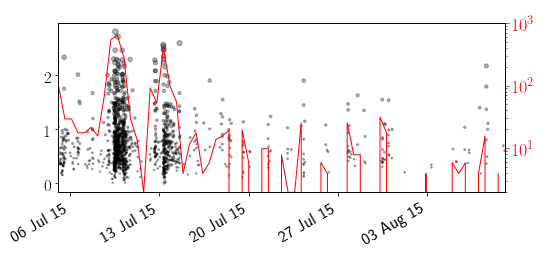

In [16]:
#--- plot complete catalog

def ConvertDailyRate(hist, bin_edges ):
#---convert data to daily rate     
    t0 = pd.to_datetime( bin_edges[ 0 ] )
    t1 = pd.to_datetime( bin_edges[ 1 ] )
    delta_t = ( t1 - t0 ).total_seconds() / ( 24*60 * 60 )
    hist *= ( bin_edges[ 1 ] - bin_edges[ 0 ] ) / delta_t

def ActivityRate( swarm ):
    nbins = int( (swarm['date'].max()-swarm['date'].min()).days * 2 ) #--- number of bins
    
    tmax = swarm['date'].max().value #--- min/max
    tmin = swarm['date'].min().value
    
    hist, bin_edges = np.histogram(swarm['date'].apply(lambda x:x.value),                                   
                    bins=np.linspace(tmin,tmax,nbins+1,endpoint=True),density=True) #--- probability dist.
    hist *= len( swarm['date'] ) #--- int(hist).dt=n
    cumm_number = np.cumsum(hist)*(bin_edges[1]-bin_edges[0]) #--- accumulated number
    ConvertDailyRate( hist, bin_edges ) #--- daily activity
    return bin_edges, hist, cumm_number
    
    
#---------------------------------------------------------------------------------
#-----------------
#-----------------
#-----------------
#---------------------------------------------------------------------------------
   
#--- completeness
mc = 0.4



#--- t0<t<t1
#--- set min/max time to avoid temporal incompletenesss issue
swarm_tmp = swarm.copy()#DataFrameSubSet( swarm, 
                         #    'date', 
                          #   ( swarm['date'].min(), 
                           #    pd.to_datetime('2010-07-31') ) )
#--- m > mc
swarm_lohi = swarm_tmp.copy() #DataFrameSubSet( swarm_tmp, 
                            # 'magnitude', 
                             #( mc, sys.maxint ) ) 

#--- spatial map
#swarm_lohi.plot.scatter('longitude','latitude',
#                        s=3**(swarm_lohi['magnitude']),
#                        c='date',cmap='jet',
#                        alpha = 0.4) #--- plot
    
#--- temporal map
fig = plt.figure(figsize=(8,3))#,dpi=75)
ax1=fig.add_subplot(111)

#plt.xlabel('Time')
#plt.ylabel('M')

#ax1.set_ylim(0,5)
ax1.set_xlim(swarm_tmp['date'].min(),swarm_tmp['date'].max())

ax1.tick_params(axis='both',labelsize=17)
ax1.tick_params(axis='x',rotation=30)

ax1.scatter(swarm_lohi['date'],swarm_lohi['magnitude'],
            s=2*np.exp(swarm_lohi['magnitude']),
            alpha=0.3,color='black')

DrawFrame(ax1, (0.11,0.07),(0.32,0.1),0.01)

#--- activity rate
bin_edges, hist, cumm_number = ActivityRate( swarm_lohi )

#--- plot
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(pd.to_datetime(bin_edges[:-1]),hist,'r-',linewidth=1)

ax2.tick_params(axis='y',labelsize=18,colors='red')

ax2.set_yscale('log')

ax2.set_ylim(2e0,1e3)

ax1.xaxis.set_major_formatter(dates.DateFormatter('%d %b %y'))

fig.autofmt_xdate(bottom=.1)

#fig.savefig('%s/timeSeries.png'%DIR_OUTPT_figs,dpi=300,bbox_inches='tight')
plt.show()


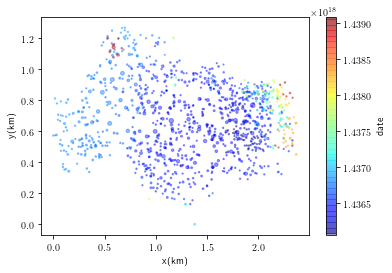

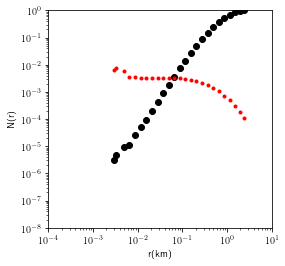

In [17]:
#--- evaluate fractal dimension

import geopy.distance
from math import *
import random as rnd

class bins:
    def __init__(self, nBin, xlo, xhi, ydim = 1, err = None):
        self.lo = xlo - 1.0e-10
        self.hi = xhi + 1.0e-10
        self.dx = (self.hi-self.lo)/nBin
        self.xlist = [0.0 for i in xrange(nBin)]
        self.kounter = [0 for i in xrange(nBin)]
        self.ylist = [[0.0 for j in xrange(ydim)] for i in xrange(nBin)]
        self.nBin = nBin
        self.err = err
        self.max_y = [[-sys.maxint for j in xrange(ydim)] for i in xrange(nBin) ]
        self.min_y = [[sys.maxint for j in xrange(ydim)] for i in xrange(nBin)]
        if err:
            self.ySQlist = [[0.0 for j in xrange(ydim)] for i in xrange(nBin)]
    def GetBin(self,x):
        return int(floor((x-self.lo)/self.dx))
    def whichBin(self,x,y, ibin=[] ):
        assert x >= self.lo, 'x=%s,self.lo=%s'%(10**x,10**self.lo)
        assert x < self.hi, 'x=%s,self.hi=%s'%(10**x,10**self.hi)
        nr = int(floor((x-self.lo)/self.dx))
        if ibin:
            ibin[ 0 ] = nr
        self.kounter[nr] += 1
        self.xlist[nr] += x
        for idim in xrange(len(y)):
            self.ylist[nr][idim] += y[idim]
            if y[idim] >= self.max_y[nr][idim]: #--- set max value
                self.max_y[nr][idim]=y[idim]
            if y[idim] <= self.min_y[nr][idim]:
                self.min_y[nr][idim]=y[idim]
            if self.err:
                self.ySQlist[nr][idim] += y[ idim ] * y[ idim ]

    def res(self, logScaleX = None, logScaleY = None, base = 10, SUM = None, MINMAX=None ):
         indices = xrange(10**6)
         someList = []
         for x,index in zip(self.xlist,indices):
             nb = self.kounter[index]
             if nb == 0: continue
             xbar = self.xlist[index]/nb
             ybar = [y/nb for y in self.ylist[index]]
             if self.err:
                 sigmaY = [ ( ysq / nb - YBAR * YBAR ) ** 0.5 / nb ** 0.5 for ysq, YBAR in zip( self.ySQlist[ index ], ybar )]
                 if SUM:
                     sigmaY = [ i * nb for i in sigmaY ]
             if SUM:
                 ybar = [y for y in self.ylist[index]]
             if MINMAX:
                 MAX_y = [y for y in self.max_y[index]]
             if logScaleX:
                 xbar = base ** xbar
             if logScaleY:
                 ybar = [ base ** item for item in ybar ]
             if self.err:
                 someList.append([ xbar, ybar, sigmaY ])
             elif MINMAX:
                 someList.append([ xbar, ybar, MAX_y ])
             else:
                 someList.append([ xbar, ybar ])
         return someList


class histogram( bins ):
    def res( self, Radial = None, logScale = None, normalize = True, base = 10.0, ACCUMLTD = None ):
        PDF = []
        self.nPoint = nPoint = sum( self.kounter )
        indices = xrange( sys.maxint )
        y_accm = nPoint
        for y, index in zip( self.kounter, indices ):
            if not ACCUMLTD and y == 0:
                continue
            if not y == 0:
                x = self.xlist[ index ] / y #self.lo + index * self.dx
            else:
                x = self.lo + index * self.dx
            Y = 1.0 * y
            dx = self.dx
            if logScale:
                x = base ** x
                dx = x * ( base ** self.dx - 1.0 )
#               print Y, dx
            if normalize:
                Y /= ( nPoint * dx )
                if Radial:
                    Y /= ( 2.0 * pi * x )
#           PDF.append( [ x, Y ] )
#           PDF.append( [ x + dx, Y ] )
#           PDF.append( [ x + 0.5 * dx, Y, 0.0, ( 1.0 * y_accm / nPoint if normalize else 1.0 * y_accm )  ] )
            error_std = 0.0
            if self.err:
                error_std = sqrt( nPoint * Y * dx ) / ( nPoint * dx ) #--- poisson
                error_std = sqrt( nPoint * Y * dx * ( 1.0 - Y * dx ) ) / ( nPoint * dx ) #--- bi-nomial
            PDF.append( [ x, Y, 0.0, ( 1.0 * y_accm / nPoint if normalize else 1.0 * y_accm ), error_std ] )
            y_accm -= y
        return PDF

def GetCartesian( dff ):
    df = dff.copy()
    xlo = df['longitude'].min()
    xhi = df['longitude'].max()
    ylo = df['latitude'].min()
    yhi = df['latitude'].max()
    getDistX = lambda x: geopy.distance.vincenty( ( 0.0, xlo ), ( 0.0, x ) ).km
    getDistY = lambda y: geopy.distance.vincenty( ( ylo, 0.0 ), ( y, 0.0 ) ).km
    df[ 'x(km)' ] = df[ 'longitude' ].apply( getDistX ) 
    df[ 'y(km)' ] = df[ 'latitude' ].apply( getDistY ) 
    df[ 'z(km)' ] = df['depth']
    return df

def fractalDimension2nd( coord ):
    #--- sort
    if type( coord ) == type( [] ):
        coord = ListToDict( coord )
    points = coord.keys()
    points.sort()
    hsObject = histogram( 18 * 8, log( 1e-10,10), log( 1e8, 10 ) )
    for point_i in points:
        for point_j in points:
            if not point_i < point_j: #--- pairs ij with i<j
                continue
            rij = sum( [ ( i - j ) ** 2 for i, j in zip( coord[ point_i ], coord[ point_j ] ) ] ) # ** 0.5
            assert rij > 0, 'rij=%s,coord[ %s ]=%s, coord[ %s ]=%s' %(rij,point_i,coord[ point_i ], point_j, coord[ point_j ] )
            hsObject.whichBin( 0.5 * log( rij,10 ), [ 1.0 ] )
    for items in hsObject.res( logScale = True, normalize = True, ACCUMLTD = True ):
        if items[ 3 ] > 0.0: 
            yield items[ 0 ], items[ 3 ]

#---------------------------------------------------------------------------------
#-----------------
#-----------------
#-----------------
#---------------------------------------------------------------------------------


#--------------------
#----- subset
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
#swarm_lohi = swarm_lohi.sample( n = 2000 ) #--- sample

#--------------------
#--- cartesian coords
#--------------------
swarm_cartesian = GetCartesian( swarm_lohi )

#--------------------
#--- evaluate df
#--------------------
tmp_coord = swarm_cartesian['x(km)'].apply(lambda x: [x+rnd.random()*1e-6]) +\
            swarm_cartesian['y(km)'].apply(lambda x: [x+rnd.random()*1e-6]) +\
            swarm_cartesian['z(km)'].apply(lambda x: [x+rnd.random()*1e-6])
tmp_coord = tmp_coord.to_dict()
dict_NR = fractalDimension2nd( tmp_coord ) #, dmin = 1.0e-02 )

#--------------------
#--- scattered plot
#--------------------
swarm_cartesian.plot.scatter('x(km)','y(km)',
                        s=3**(swarm_lohi['magnitude']),
                        c='date',cmap='jet',
                        alpha = 0.4) 
#plt.savefig('%s/map2d.png'%DIR_OUTPT_figs,bbox_inches='tight')
#--------------------
#--- N(r) vs r
#--------------------
plt.figure( figsize = (4,4))
plt.xlabel('r(km)')
plt.ylabel('N(r)')
plt.xlim(1e-4,1e1)
plt.ylim(1e-8,1)
plt.yscale('log')
plt.xscale('log')
d_f = 2.5
for i in dict_NR:
    plt.plot([i[ 0 ]],
             [1-i[ 1 ]],
             'o',color='black') #--- accumulated
    plt.plot(i[ 0 ],
             (1-i[ 1 ])/i[0]**d_f/1000,
             '.',color='red') #--- accumulated
plt.show()

In [18]:
#--- evaluate fractal dimension (correltion dimension )

def getRmat2d( df_complete ):
    nmax = len( df_complete )
    rmat = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    for i in xrange( nmax ):
        #--- distance matrix
        df_dx = df_complete[ 'x(km)' ] - df_complete[ 'x(km)' ][ i ]
        df_dy = df_complete[ 'y(km)' ] - df_complete[ 'y(km)' ][ i ]
        df_sq = ( df_dx*df_dx+df_dy*df_dy ) ** 0.5
        df_sq[ : i ] = 0
        rmat[ i ] = np.array(df_sq)
    return np.array( rmat ) 

def getRmat3d( df_complete ):
    nmax = len( df_complete )
    rmat = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    for i in xrange( nmax ):
        #--- distance matrix
        df_dx = df_complete[ 'x(km)' ] - df_complete[ 'x(km)' ][ i ]
        df_dy = df_complete[ 'y(km)' ] - df_complete[ 'y(km)' ][ i ]
        df_dz = df_complete[ 'z(km)' ] - df_complete[ 'z(km)' ][ i ]
        df_sq = ( df_dx*df_dx+df_dy*df_dy+df_dz*df_dz ) ** 0.5
        df_sq[ : i ] = 0
        rmat[ i ] = np.array(df_sq)
    return np.array( rmat ) 

#def GetCartesian( dff ):
#    df = dff.copy()
#    xlo = df['longitude'].min()
#    xhi = df['longitude'].max()
#    ylo = df['latitude'].min()
#    yhi = df['latitude'].max()
#    getDistX = lambda x: geopy.distance.vincenty( ( 0.0, xlo ), ( 0.0, x ) ).km
#    getDistY = lambda y: geopy.distance.vincenty( ( ylo, 0.0 ), ( y, 0.0 ) ).km
#    df[ 'r(km)' ] = df[ 'longitude' ].apply( getDistX ) + df[ 'latitude' ].apply( getDistY ) * 1j
#    return df


# --------------------
# ----- subset
# --------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 

#--------------------
#--- cartesian coords
#--------------------
swarm_lohi = GetCartesian( swarm_lohi )

#swarm_lohi = DataFrameSubSet( swarm_lohi, 
 #                            'x(km)', 
  #                           ( 180,300)) 
#swarm_lohi = DataFrameSubSet( swarm_lohi, 
 #                            'y(km)', 
  #                           ( 100,250)) 

                              
#--- we need the distance matrix! 
#rmat2d = getRmat2d( swarm_lohi )
rmat3d = getRmat3d( swarm_lohi )
#r_list2d = rmat2d[rmat2d.nonzero()]
r_list3d = rmat3d[rmat3d.nonzero()]

# #--- histogram
r_min = log(np.min(r_list3d),10) #min(log(np.min(r_list2d),10),log(np.min(r_list3d),10))
r_max = log(np.max(r_list3d),10) #max(log(np.max(r_list2d),10),log(np.max(r_list3d),10))
nbins = int(ceil(r_max - r_min))*8
#2d
# hist2d, edges = np.histogram(r_list2d,
#                          bins=np.logspace(r_min, r_max, nbins) )
# r_bins, edges = np.histogram(r_list2d,
#                          bins=np.logspace(r_min, r_max, nbins), weights = r_list2d )

# r_bins2d = r_bins[hist2d != 0]
# hist2d = hist2d[hist2d != 0]
# r_bins2d /= hist2d

# # #--- normalize
# hist_acc_2d = np.cumsum(hist2d)*1.0
# hist_acc_2d /= hist_acc_2d[-1]

#3d
hist3d, edges = np.histogram(r_list3d,
                         bins=np.logspace(r_min, r_max, nbins) )
r_bins, edges = np.histogram(r_list3d,
                         bins=np.logspace(r_min, r_max, nbins), weights = r_list3d )

r_bins3d = r_bins[hist3d != 0]
hist3d = hist3d[hist3d != 0]
r_bins3d /= hist3d

#--- normalize
hist_acc_3d = np.cumsum(hist3d)*1.0
hist_acc_3d /= hist_acc_3d[-1]

##--------------------
##--- scattered plot
##--------------------
#plt.scatter(swarm_lohi['x(km)'],
#            swarm_lohi['y(km)'],
#                        s=3**(swarm_lohi['magnitude']),
#                        cmap='jet',
#                        alpha = 0.1) 
#                             
##--- plot
##d_f = 1.4
#fig = plt.figure(figsize=(4,4))
#ax = fig.add_subplot(111)
#ax.set_xlim(10**r_min,10**r_max)
#ax.set_xlabel('$r(km)$')
#ax.set_ylabel('$N(r)$')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.errorbar( r_bins, hist_acc, 
#            yerr = hist_acc/hist**.5,
#            color='black',marker='o')
#
#ax.errorbar( r_bins, 10000*hist_acc/r_bins**d_f,  #--- rescaled
#            yerr = hist_acc/hist**.5/r_bins**d_f,
#            color='red',marker='o',label='$N/r^{%s}$'%d_f)
#ax.legend()
#
##fig.savefig('%s/corrDim.png'%DIR_OUTPT_figs,bbox_inches='tight')


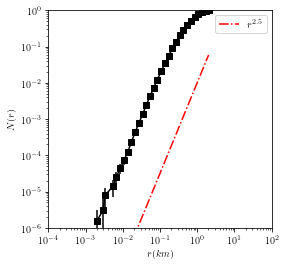

In [19]:
#--- plot
d_f = 2.5
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.axis([1e-4,1e2,1e-6,1e0])
ax.set_xlabel('$r(km)$')
ax.set_ylabel('$N(r)$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.errorbar( r_bins2d, hist_acc_2d, 
#             yerr = hist_acc_2d/hist2d**.5,
#             color='black',marker='o')
ax.errorbar( r_bins3d, hist_acc_3d,
            hist_acc_3d/hist3d**.5,
            color='black',marker='s',linestyle=None)

#ax.errorbar( r_bins, 10000*hist_acc/r_bins**d_f,  #--- rescaled
#            yerr = hist_acc/hist**.5/r_bins**d_f,
#            color='red',marker='o',label='$N/r^{%s}$'%d_f)
ax.plot(r_bins3d, r_bins3d**d_f/100,
        '-.r',label='$r^{%s}$'%d_f)

ax.legend()

    
#fig.savefig('%s/corrDim.png'%DIR_OUTPT_figs,bbox_inches='tight')
plt.show()

In [20]:
np.save('fillmore',np.c_[r_bins3d, hist_acc_3d,hist_acc_3d/hist3d**.5])

In [21]:
# #--- plot
# def func(x,b,a):   
#     return a*x**b


# r_min=0.5e-2
# for r_max,indexx in zip(np.logspace(np.log10(1e-1),np.log10(1),5),xrange(1000)):


#     fig = plt.figure(figsize=(9,4))
#     ax = fig.add_subplot(121)
#     #ax.axis([1e-4,1e2,1e-6,1e0])
#     ax.set_xlabel('$r(km)$')
#     ax.set_ylabel('$N(r)$')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.errorbar( r_bins3d, hist_acc_3d,
#                 hist_acc_3d/hist3d**.5,
#                 color='white',ecolor='black',marker='s',linestyle='None',markeredgecolor='black',zorder=1)
    
    
    
#     #--- fit
#     r_bins = r_bins3d[np.all([r_bins3d>r_min, r_bins3d<r_max],axis=0)]
#     hist_acc = hist_acc_3d[np.all([r_bins3d>r_min, r_bins3d<r_max],axis=0)]
#     p = np.polyfit(np.log10(r_bins), np.log10(hist_acc), 1, cov=True)
#     p[0][1]=10**p[0][1]
    
        
#     ax.plot(r_bins,func(r_bins,*p[0]),
#             color='red',label='d=%3.2f'%(p[0][0]),
#             linewidth=1.5,zorder=2)  
#     ax.set_title('r_max=%2.1e'%(r_max))
#     ax.legend()
    
    
    
#     ax = fig.add_subplot(122)
#     #ax.axis([1e-4,1e2,1e-6,1e0])
#     ax.set_xlabel('$r(km)$')
#     ax.set_ylabel('$N(r)* r^{%3.2f}$'%p[0][0])
#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     y=hist_acc/r_bins**p[0][0]
#     ax.set_ylim(10**(np.floor(np.log10(y.min()))-.5),
#                 10**(np.ceil(np.log10(y.max()))+.5))
#     #ax.tick_params(axis='y',left=False,right=True,labelleft=False,labelright=True)
#     ax.yaxis.set_label_position("right")
#     ax.yaxis.tick_right()
#     ax.plot(r_bins,y,
#             color='white',marker='s',linestyle='None',markeredgecolor='black')
    
#     #fig.savefig('%s/corrDim.%s.png'%(DIR_OUTPT_figs,indexx),dpi=50,bbox_inches='tight')

#     plt.show()


In [22]:
#--- evaluate fractal dimension (box counting )

import geopy.distance
from math import *
import random as rnd
#import warnings

#warnings.filterwarnings('ignore') #--- get rid of warnings

#def GetCartesian( dff ):
#    df = dff.copy()
#    xlo = df['longitude'].min()
#    xhi = df['longitude'].max()
#    ylo = df['latitude'].min()
#    yhi = df['latitude'].max()
#    getDistX = lambda x: geopy.distance.vincenty( ( 0.0, xlo ), ( 0.0, x ) ).km
#    getDistY = lambda y: geopy.distance.vincenty( ( ylo, 0.0 ), ( y, 0.0 ) ).km
#    df[ 'r(km)' ] = df[ 'longitude' ].apply( getDistX ) + df[ 'latitude' ].apply( getDistY ) * 1j
#    df[ 'x(km)' ] = df[ 'longitude' ].apply( getDistX )
#    df[ 'y(km)' ] = df[ 'latitude' ].apply( getDistY )
#    return df

#--------------------
#----- subset
#--------------------
# swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
#                              'magnitude', 
#                              ( mc, sys.maxint ) ) 
# #swarm_lohi = swarm_lohi.sample( n = 1000 ) #--- sample


# #--------------------
# #--- cartesian coords
# #--------------------
# swarm_lohi = GetCartesian( swarm_lohi )
# #swarm_lohi = DataFrameSubSet( swarm_lohi, #--- complete catalog
# #                             'x(km)', 
# #                             ( 200, 1000 ) ) 
# #swarm_lohi = DataFrameSubSet( swarm_lohi, #--- complete catalog
# #                             'y(km)', 
# #                             ( -1000, 220 ) ) 

# #--------------------
# #--- scattered plot
# #--------------------
# plt.figure(figsize=(4,4))
# #plt.xlim(0,np.max(r_list))
# #plt.ylim(-np.max(r_list)/2,np.max(r_list)/2)
# plt.xlabel('x(km)')
# plt.ylabel('z(km)')
# plt.scatter(swarm_lohi['x(km)'],
#             swarm_lohi['z(km)'],
#                         s=3**(swarm_lohi['magnitude']),
#                         cmap='jet',
#                         alpha = 0.01) 
# #--------------------
# #--- box counting
# #--------------------
# #tmp=pd.DataFrame({'x(m)':swarm_lohi['y(m)'],'y(m)':swarm_lohi['z(m)']}) #,'z(m)':swarm_lohi['z(m)']})
# #rmat = getRmat2d( tmp )
# #rmat = getRmat2d( swarm_lohi )

# #r_list = rmat[rmat.nonzero()]
# #r_min = np.min(r_list)
# #r_max = np.max(r_list)
# #
# #plt.savefig('%s/map2d.png'%DIR_OUTPT_figs,bbox_inches='tight')



In [23]:
# #--- evaluate fractal dimension (box counting )


# def fractalDimension3d( x, y, z, L, dmin = None ):
#     x = np.array(x)
#     y=np.array(y)
#     z=np.array(z)
# #    xlo = x.min()
# #    xhi = x.max()
# #    ylo = y.min()
# #    yhi = y.max()
# #    zlo = z.min()
# #    zhi = z.max()
# #    L = max( zhi - zlo, yhi - ylo, xhi - xlo )
#     #---
#     xc = x.mean() #--- center
#     yc = y.mean()
#     zc = z.mean()
    
#     xo = xc - L #--- origin
#     yo = yc - L
#     zo = zc - L
# #    L *= 2.0
#     #---
#     kounter = 0  #--- number of divisions
#     dx = dy = dz = L  #--- scale
#     dl = []
#     N = []
#     while dx - dmin > 0.0: #--- do until dx < dmin
#         d = {}
#         index_i = np.array( map(int,np.floor( ( y - yo ) / dy ) ) )
#         index_j = np.array( map( int, np.floor( ( x - xo ) / dx ) ) )
#         index_k = np.array( map( int, np.floor( ( z - zo ) / dz ) ) )
        
#         inside_cell_lo = np.all([index_i>=0,index_j>=0,index_k>=0.0],axis=0) #--- point is inside?
#         inside_cell_hi = np.all([index_i<2**kounter,index_j<2**kounter,index_k<2**kounter],axis=0) #
#         inside_cell = np.all([inside_cell_lo,inside_cell_hi],axis = 0)

        
#         cell_id = index_k * 4 ** kounter + index_i * ( 2**kounter ) + index_j
#         #---
#         dl+=[dx]
#         N+=[len( set( cell_id ) )]
#         #---
#         kounter += 1
#         dx = dy = dz = L / 2**kounter
#     assert dx - dmin <= 0.0
#     #---
#     return np.array(dl), np.array(N)


# def fractalDimension2d( x, y, L, dmin = None ):
#     x = np.array(x)
#     y=np.array(y)
# #    xlo = x.min()
# #    xhi = x.max()
# #    ylo = y.min()
# #    yhi = y.max()
# #    L = max( yhi - ylo, xhi - xlo )
#     #---
#     xc = x.mean() #--- center
#     yc = y.mean()

#     xo = xc - L #--- origin
#     yo = yc - L
# #    L *= 2.0
#     #---
#     kounter = 0  #--- number of divisions
#     dx = dy = L / 2**kounter  #--- scale
#     dl = []
#     N = []
# #    pdb.set_trace()
# #    fig = plt.figure(figsize=(4,4))
# #    ax=fig.add_subplot(111)
# #    plt.scatter(x,y)
# #    ax.add_patch( patches.Rectangle(xy=(xo,yo), width=L, 
# #                                    height=L, linewidth=1,
# #                                    clip_on=False,facecolor=None,edgecolor='black',fill=None) ) 
    
#     while dx - dmin > 0.0: #--- do until dx < dmin
#         d = {}
        
#         index_i = np.array( map(int,np.floor( ( y - yo ) / dy ) ) ) #--- assingn index
#         index_j = np.array( map( int, np.floor( ( x - xo ) / dx ) ) )

#         inside_cell_lo = np.all([index_i>=0,index_j>=0],axis=0) #--- point is inside?
#         inside_cell_hi = np.all([index_i<2**kounter,index_j<2**kounter],axis=0) #
#         inside_cell = np.all([inside_cell_lo,inside_cell_hi],axis = 0)
        
#         index_i = index_i[ inside_cell ] #--- subset of the index array
#         index_j = index_j[ inside_cell ]

#         cell_id = index_i * ( 2**kounter ) + index_j
#         #---
#         dl+=[dx]
#         N+=[len( set( cell_id ) )]
#         #---
#         kounter += 1
#         dx = dy = L / 2**kounter
#     assert dx - dmin <= 0.0
#     #---
#     return np.array(dl), np.array(N)


# fig = plt.figure(figsize=(10,4))
# ax = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# ax.set_xlabel('$r(km)$')
# ax.set_ylabel('$N(r)$')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax2.set_xlabel('$r(km)$')
# ax2.set_ylabel(r'$N(r)\times r^{%s}$'%d_f)
# ax2.set_xscale('log')
# ax2.set_yscale('log')
# dl={}
# N={}
# count = 0
# r_min = np.min(r_list)
# r_max = np.max(r_list)
# for L in np.logspace(log(r_min,2),log(r_max,2),num=6,base=2.0):
# #for L in [2*420.0]:
# #    dl[count], N[count] = fractalDimension2d( swarm_lohi['x(km)'],
# #                                              swarm_lohi['y(km)'], L, dmin=r_min ) # , swarm_lohi['z(m)'], dmin=r_min )
#     dl[count], N[count] = fractalDimension3d( swarm_lohi['x(km)'],
#                                              swarm_lohi['y(km)'], 
#                                              swarm_lohi['z(km)'], 
#                                              L, dmin=r_min ) 

# ##--- try random
# #x=np.array([rnd.random() for i in xrange(1000)])
# #y=0.2*x #[rnd.random() for i in xrange(10000)]
# ##z=x #[rnd.random() for i in xrange(10000)]
# #tmp=pd.DataFrame({'x(m)':x,'y(m)':y})#,'z(m)':z})
# #rmat = getRmat2d( tmp )
# #r_list = rmat[rmat.nonzero()]
# #r_min = min(r_list)
# #sdict = fractalDimension2d( x,y,
# #                           dmin=r_min )
# #plt.scatter(x,y)

# #--- plot
#     #ax.set_xlim(10**r_min,10**r_max)
#     #for key in sdict:
#     ax.plot(dl[count],N[count],'-o')
#     ax2.plot(dl[count],N[count]*dl[count]**d_f,marker='o',label='$L=%2.1e$'%L)#,linestyle='None')
#     count+=1
# ax2.legend(bbox_to_anchor=(1, 1))
# fig.tight_layout()

# #fig.savefig('%s/boxCount.png'%DIR_OUTPT_figs,bbox_inches='tight')
    

In [24]:
Df = 2.5
bval = 0.94
mc=0.4


In [25]:
#--- trig analysis (new) (it's a large data sets. run the simulation on a cluster and use the outputs)

from scipy.sparse import lil_matrix
import time
from IPython.display import display
import datetime
import pdb
import numpy.linalg
import numpy as np

def UpperTriang(a):
    il1 = np.tril_indices(a.shape[0])
    a[il1] = 0
    return a
    
def getTmat( df_complete ):
    nmax = len( df_complete )
    prefact = 1.0 / ( 24.0 * 60 * 60 ) #--- daily
    tmat = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    tmat_ut = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    for i in xrange( nmax ):
        df_dt = ( df_complete[ 'date' ] - df_complete[ 'date' ][ i ] ).dt.total_seconds() * prefact #--- time diff between i-th event and all subsequent events	
        tmat[ i ] = np.array(df_dt)
        df_dt[ : i ] = df_dt[ i ] #--- must have an upper triangular matrix 
        tmat_ut[ i ] = np.array(df_dt)

        #---
    return np.array( tmat ), np.array( tmat_ut )


def AddPositionList(df_complete):
    df_complete['r(m)'] = df_complete['x(m)'].apply(lambda x: [x])+ \
                          df_complete['y(m)'].apply(lambda x: [x])+ \
                          df_complete['z(m)'].apply(lambda x: [x])

def getRmat( df_complete ):
    nmax = len( df_complete )
    rmat = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    rmat_ut = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    for i in xrange( nmax ):
        #--- distance matrix
        df_dx = ( df_complete[ 'x(km)' ] - df_complete[ 'x(km)' ][ i ] )
        df_dy = ( df_complete[ 'y(km)' ] - df_complete[ 'y(km)' ][ i ] )
        df_dz = ( df_complete[ 'z(km)' ] - df_complete[ 'z(km)' ][ i ] ) #comment if 2-d
        df_sq = ( df_dx * df_dx + df_dy * df_dy + df_dz * df_dz ) ** 0.5
        rmat[ i ] = np.array(df_sq)
        df_sq[ : i ] = 0
        rmat_ut[ i ] = np.array(df_sq)
    return np.array( rmat ), np.array( rmat_ut )

def getMmat( df_complete ):
    nmax = len( df_complete )
    m_mat = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    m_mat_ut = np.matrix(np.zeros(nmax*nmax).reshape(nmax,nmax))
    for i in xrange( nmax ):
        #--- magnitude
        df_m = pd.Series( [ df_complete[ 'magnitude' ][ i ] ] * nmax )
        m_mat[ i ] = np.array(df_m)
        df_m[ : i ] = 0
        m_mat_ut[ i ] = np.array(df_m)
    return np.array( m_mat ), np.array( m_mat_ut ) 

def vectorizedAnalysis( df_complete ):
    #--- setup t, r, m
    t0 = time.time()
    tmat0, tmat = getTmat( df_complete )
    print 'setting up tmat:%s s'%(time.time() - t0)
    t0 = time.time()
    r_mat0, r_mat = getRmat( df_complete )
    print 'setting up rmat:%s s'%(time.time() - t0)
    t0 = time.time()
    m_mat0, m_mat = getMmat( df_complete )
    print 'setting up m_mat:%s s'%(time.time() - t0)
      
        
#    #--- make upper-triangular matrices    
#    t0 = time.time()
#    tmat = UpperTriang(np.copy(tmat0))
#    r_mat = UpperTriang(np.copy(r_mat0))
#    m_mat = UpperTriang(np.copy(m_mat0))
#    print 'setting up ut matrix:%s s'%(time.time() - t0)
    
    #--- nij
    t0 = time.time()
    NIJ = tmat * r_mat ** ( Df ) * 10 ** ( - bval * ( m_mat - mc ) )
    TIJ = tmat * 10 ** ( - 0.5 * bval * ( m_mat - mc ) ) #--- scaled time
    RIJ = r_mat ** ( Df ) * 10 ** ( - 0.5 * bval * ( m_mat - mc ) ) #--- scaled time
    print 'setting up NIJ:%s s'%(time.time() - t0)
    nmax = len( df_complete )
    N_sparse = lil_matrix( ( nmax, nmax ) ) #--- sparse matrix
    T_sparse = lil_matrix( ( nmax, nmax ) )
    R_sparse = lil_matrix( ( nmax, nmax ) )
    for junk, j in zip( NIJ, xrange( sys.maxint ) ): 
        if j == 0:
            continue
        x = min( NIJ[ : j, j ][ NIJ[ : j, j ] != 0 ] ) #--- min nij
        assert x != 0.0
        rowi = np.where( NIJ[ : j, j ] == x )[ 0 ][ 0 ] #--- find row
        assert rowi <= j
        N_sparse[ rowi, j ] = x #--- insert
        T_sparse[ rowi, j ] = TIJ[ rowi, j ]
        R_sparse[ rowi, j ] = RIJ[ rowi, j ]    
    return N_sparse, (T_sparse, tmat0 ), ( R_sparse, r_mat0 ), m_mat0


#--------------------
#----- subset
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)

#--------------------
#--- cartesian coords
#--------------------
swarm_lohi = GetCartesian( swarm_lohi )

#AddPositionList( swarm_lohi )
swarm_lohi.reset_index(inplace=True,drop=True)

#--- vectorized
t0 = time.time()
N_sparse, (T_sparse,tmat), (R_sparse,rmat), m_mat = vectorizedAnalysis( swarm_lohi )
print 'duration=%s s'%(time.time() - t0)

setting up tmat:1.74311304092 s
setting up rmat:2.36144399643 s
setting up m_mat:1.03308415413 s
setting up NIJ:0.217535018921 s
duration=5.48917913437 s


In [26]:
#--- random analysis

def shuffle(amat):
    ind_list = range(amat.shape[0])
    np.random.shuffle(ind_list)
    amat_row = amat[ind_list]
    return amat_row[:,ind_list]

def GetNij(rmat,tmat,m_mat,df_complete):
    
    tmat = shuffle(np.abs(tmat))
    r_mat = shuffle(rmat)
    m_mat = shuffle(m_mat)
    
    #--- nij
    NIJ = tmat * r_mat ** ( Df ) * 10 ** ( - bval * ( m_mat - mc ) )
    TIJ = tmat * 10 ** ( - 0.5 * bval * ( m_mat - mc ) ) #--- scaled time
    RIJ = r_mat ** ( Df ) * 10 ** ( - 0.5 * bval * ( m_mat - mc ) ) #--- scaled time
    nmax = len( df_complete )
    N_sparse = lil_matrix( ( nmax, nmax ) ) #--- sparse matrix
    T_sparse = lil_matrix( ( nmax, nmax ) )
    R_sparse = lil_matrix( ( nmax, nmax ) )
    for junk, j in zip( NIJ, xrange( sys.maxint ) ): 
        if j == 0:
            continue
            
        x = min( NIJ[ : j, j ][ NIJ[ : j, j ] != 0 ] ) #--- min nij
        assert x != 0.0
        rowi = np.where( NIJ[ : j, j ] == x )[ 0 ][ 0 ] #--- find row
        N_sparse[ rowi, j ] = x #--- insert
        T_sparse[ rowi, j ] = TIJ[ rowi, j ]
        R_sparse[ rowi, j ] = RIJ[ rowi, j ]    
    return N_sparse, (T_sparse, tmat ), ( R_sparse, r_mat), m_mat

N_sparse_rnd = {}
T_sparse_rnd = {}
R_sparse_rnd = {}
tmat_rnd = {}
rmat_rnd = {}
nsamp = 1
tmat = np.abs(tmat)
for i in xrange(nsamp):
    print i
    N_sparse_rnd[i], (T_sparse_rnd[i],tmat_rnd[i]), (R_sparse_rnd[i],rmat_rnd[i]), junk = GetNij(rmat,tmat,m_mat,swarm_lohi)


0


In [27]:
# #--- save sparse matrices

# import scipy.sparse

# for mat, title in zip([N_sparse,T_sparse,R_sparse],
#                      ['N_sparse_matrix.npz','T_sparse_matrix.npz','R_sparse_matrix']):
#    scipy.sparse.save_npz('%s/%s'%(DIR_OUTPT,title), mat.tocsr()) #--- output

# for mat, title in zip([N_sparse_rnd[0],T_sparse_rnd[0],R_sparse_rnd[0]],
#                      ['N_sparse_rnd_matrix.npz','T_sparse_rnd_matrix.npz','R_sparse_rnd_matrix']):
#    scipy.sparse.save_npz('%s/%s'%(DIR_OUTPT,title), mat.tocsr()) #--- output

# #swarm_shuffled.to_csv('%s/swarm_shuffled.csv'%DIR_OUTPT)

In [28]:
# #--- load sparse matrices
# #--- 1- run on the cluster: 
# #--- 2- sbatch --mem=8gb --partition=single  --time=02:59:59 -n 1 ./oarScript.sh
# #--- 3- oarScript.sh: source activate conda-env; python ./swarmEMC.py
# #--- 4- copy: scp arc:/home/kamran.karimi1/Project/seismic/dataset/El_Mayor_Cucpah/* ./swarm/dataset/El_Mayor_Cucpah/

# import scipy.sparse

# N_sparse = scipy.sparse.load_npz('%s/N_sparse_matrix.npz'%DIR_OUTPT )
# T_sparse = scipy.sparse.load_npz('%s/T_sparse_matrix.npz'%DIR_OUTPT )
# R_sparse = scipy.sparse.load_npz('%s/R_sparse_matrix.npz'%DIR_OUTPT )
# #rmat = np.load('%s/rmat.npy'%DIR_OUTPT)
# #tmat = np.load('%s/tmat.npy'%DIR_OUTPT)

# N_sparse_rnd = {}
# T_sparse_rnd = {}
# R_sparse_rnd = {}

# nsamp = 1
# N_sparse_rnd[0] = scipy.sparse.load_npz('%s/N_sparse_rnd_matrix.npz'%DIR_OUTPT )
# T_sparse_rnd[0] = scipy.sparse.load_npz('%s/T_sparse_rnd_matrix.npz'%DIR_OUTPT )
# R_sparse_rnd[0] = scipy.sparse.load_npz('%s/R_sparse_rnd_matrix.npz'%DIR_OUTPT )
# #rmat_rnd = np.load('%s/rmat_rnd.npy'%DIR_OUTPT)
# #tmat_rnd = np.load('%s/tmat_rnd.npy'%DIR_OUTPT)

# #swarm_shuffled = pd.read_csv('%s/swarm_shuffled.csv'%DIR_OUTPT)
# #swarm_shuffled_incomplete = pd.read_csv('%s/swarm_shuffled_incomplete.csv'%DIR_OUTPT)

In [29]:
##--- matrix map of nij & nij_rand
#
#plt.subplot(2,1,1)
#plt.pcolormesh(np.log(N_sparse.toarray()),cmap='jet')
#plt.subplot(2,1,2)
#plt.pcolormesh(np.log(N_sparse_rnd.toarray()),cmap='jet')


n_th=5.4e-07+0.0e+00


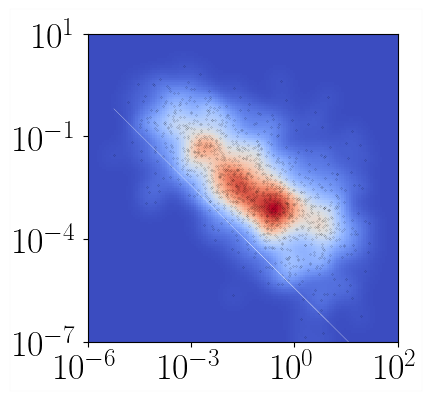

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)
warnings.filterwarnings('ignore') #--- get rid of warnings

rc('text', usetex=True)
font = {'size'   : 26}
matplotlib.rc('font', **font)

#---------------------------
#--- compute threshold n_th
#---------------------------

def PLOT(edges, hist, cdf, title ):
    #--- plot
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
#    plt.xlim(1e-13,1)
#    plt.ylim(1e-1,1e13)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('nij')
    plt.ylabel('P(nij)')
    plt.title( title )
    plt.plot(edges[:-1],hist,'.-')
    
    plt.subplot(1,2,2)
#    plt.xlim(1e-13,1)
#    plt.ylim(1e-3,1)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('nij')
    plt.ylabel('cdf')
    plt.plot(edges[:-1],cdf,'.-')
    plt.plot([n_thresh for i in edges[:-1]], cdf)
#---    
def HIST( nij, nbins ):
    #--- histograms
    nij_TxR = nij['T*']*nij['R*']
    hist, edges = np.histogram( nij_TxR,
                            bins=np.logspace(np.log(nij_TxR.min()),np.log(nij_TxR.max()),nbins),
                            density=True)
    #--- accumulated
    cdf, edges = np.histogram( nij_TxR,
                           bins=np.logspace(np.log(nij_TxR.min()),np.log(nij_TxR.max()),nbins,endpoint=True))
    cdf=np.cumsum(cdf)
    #assert cdf[-1] == len(nij_TxR), '%s,%s'%(cdf[-1], len(nij_TxR))
    N = 1.0 * len(nij_TxR)
    cdf = cdf / N
    return edges, hist, cdf

def reset_xticks(nn,ax,(TMIN,TMAX)):
    ax.set_xticks( np.linspace(ax.axis()[0],ax.axis()[1],nn) ) 
    labels=np.linspace(TMIN,TMAX,nn)
    labels = [r'$10^{%i}$'%i for i in labels]
    ax.set_xticklabels(labels)

def reset_yticks(nn,ax,(RMIN,RMAX)):
    ax.set_yticks( np.linspace(ax.axis()[2],ax.axis()[3],nn) ) 
    labels=np.linspace(RMIN,RMAX,nn)
    labels = [r'$10^{%i}$'%i for i in labels]
    ax.set_yticklabels(labels)
                 

def GetTrigListLoHi( nij_trig, col, (tlo,thi), swarm_lohi ):
    list_of_mothers = nij_trig.groupby(by='Parent_id').groups.keys() 
    list_of_mothers.sort()
    tmp_df = swarm_lohi.loc[ list_of_mothers ]
    tmp_df = tmp_df[ (tmp_df[ col ] >= tlo) & 
                 (tmp_df[ col ] < thi) ]
    return nij_trig[ pd.DataFrame([nij_trig['Parent_id'] == i for i in tmp_df.index]).any() ]

def GetInterpolatedData( df0, (TMIN,TMAX),(RMIN,RMAX) ):
    nbins_per_decade = 16
    nbins_x=nbins_y=int(TMAX-TMIN)*nbins_per_decade
    df=df0.copy()

    df['T*']=df[ 'T*' ].apply(lambda x: log(x,10))
    df['R*']=df[ 'R*' ].apply(lambda x: log(x,10))
    heatmap, xedges, yedges = np.histogram2d( df[ 'T*' ], df[ 'R*'], bins=[np.linspace(TMIN,TMAX,nbins_x+1), np.linspace(RMIN,RMAX,nbins_y+1)], normed=True)
    heatmap *= len( df )
    heatmap = gaussian_filter( heatmap, sigma = nbins_per_decade/4 )
    return heatmap

def GetDistance( df1, df2 ):
    df_sq = (np.array( df1['x(km)'] ) - np.array( df2['x(km)'] ) ) ** 2 + \
            (np.array( df1['y(km)'] ) - np.array( df2['y(km)'] ) ) ** 2 + \
            (np.array( df1['z(km)'] ) - np.array( df2['z(km)'] ) ) ** 2 
    return pd.Series( df_sq ** 0.5 )

def RemovePair( dff, cs, catalog ):
    pref = 1.0 / 3600.0 / 24 #--- daily
    df = dff.copy()
    
    series_r = GetDistance(catalog.loc[df['Parent_id']],catalog.loc[df['Event_id']])
     
#    series_r = pd.Series(np.array( catalog.loc[df['Parent_id']]['r(km)'] ) -\
#                         np.array( catalog.loc[df['Event_id']]['r(km)'] ) )
    assert len(series_r[series_r==np.nan]) == 0
    df['R'] = series_r.copy() #abs()

    series_t = pd.Series(np.array( catalog.loc[df['Event_id']]['date'] ) -\
                         np.array( catalog.loc[df['Parent_id']]['date'] ) )
    df['T'] = series_t.apply(lambda x:x.total_seconds()*pref)
    assert len ( df[ df['R'] == 0.0 ] ) == 0, '%s'%display( df[ df['R'] == 0.0 ] )
    assert len ( df[ df['T'] == 0.0 ] ) == 0, '%s'%display( df[ df['T'] == 0.0 ] )
    return df [ df[ 'R' ] <= df[ 'T' ] * cs ], df [ df[ 'R' ] > df[ 'T' ] * cs ]


#--------------------
#----- set parameters
#--------------------
#--- set quantile
quantile = 0.05 #--- comment if passed by arg.
#--- wave speed
cs = 3 * (24*3600) #--- km per day
#--- cut-off time
dt_cut = 0.0 #--- day
#--- plot scattered
TMIN=-6
TMAX=2
RMIN=-7
RMAX=1


#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi = GetCartesian( swarm_lohi )
swarm_lohi.reset_index(inplace=True,drop=True)


#--------------------
#--- store actual data in a dataframe
#--------------------
rows, cols = N_sparse.nonzero()
tlist = T_sparse[rows, cols].toarray()[0]
rlist = R_sparse[rows, cols].toarray()[0]
nij = pd.DataFrame({'Event_id':cols, 'Parent_id':rows,'T*':tlist,'R*':rlist})

#--------------------
#--- store random data in a dataframe
#--------------------
nij_rnd = {}
for i in xrange(nsamp):
    rows, cols = N_sparse_rnd[i].nonzero()
    tlist = T_sparse_rnd[i][rows, cols].toarray()[0]
    rlist = R_sparse_rnd[i][rows, cols].toarray()[0]
    nnn = len(cols)
    nij_rnd[i] = pd.DataFrame({'Event_id':cols, 'Parent_id':rows,'T*':tlist,'R*':rlist},index=range(i*nnn,(i+1)*nnn))


#--------------------------------------------
#----- only include mother events with 
#----- t_mother between (t_lo, t_hi) 
#--------------------------------------------
#--- actual data
#--- remove pairs with r > cs.t
nij, nij_removed = RemovePair( nij, cs, swarm_lohi )
myTlohi = Tlohi(swarm_lohi['date'].min()+datetime.timedelta(days=dt_cut), #--- set cut-off time
               swarm_lohi['date'].max()+datetime.timedelta(days=-dt_cut)
               )
nij = GetTrigListLoHi( nij, 'date',  #--- t_mother > t_lo
                       ( myTlohi.lo, myTlohi.hi ), 
                           swarm_lohi)
nij.reset_index(inplace=True, drop=True)

#--- random data
#for i in xrange(nsamp):
#    nij_rnd = RemovePair( nij_rnd, cs, swarm_shuffled )
#    nij_rnd = GetTrigListLoHi( nij_rnd, 'date', 
#                       ( myTlohi.lo, myTlohi.hi ), 
#                           swarm_shuffled)
#    nij_rnd.reset_index(inplace=True, drop=True)

#--- compute threshold
N_thresh = []
frames = []
for i in xrange(nsamp):
    frames.append(nij_rnd[i])
    #--- plot histograms for random data
    edges, hist, cdf = HIST( nij_rnd[i], 1024 )
#    edges = 0.5*(edges[:-1]+edges[1:])
    N_thresh.append(edges[:-1][cdf>quantile][0])
n_thresh = np.mean(N_thresh)
print 'n_th=%2.1e+%2.1e' %(n_thresh,np.std(N_thresh) / nsamp ** 0.5)
Nij_rnd = pd.concat([nij_rnd[i]]) #frames)


#--- distribution of nij (actual data)
edges_actual, hist_actual, cdf_actual = HIST( nij, 1024 )
#edges_actual = 0.5*(edges_actual[:-1]+edges_actual[1:])
#PLOT(edges, hist, cdf, 'random')


#--------------------
#--- plot scattered
#--------------------
fig = plt.figure(figsize=(4,4))


#--------------------
#--- interpolated data
#--------------------
for nn, index, title in zip([ Nij_rnd, Nij_rnd ],xrange(1),['actual','randomized']):
#for nn, index, title in zip([ nij ],xrange(2),['actual']):
    ax = fig.add_subplot(111)#1,2,index+1)
    #--- interpolate
    heatmap=GetInterpolatedData(nn,(TMIN,TMAX),(RMIN,RMAX))
    ax.pcolormesh(heatmap.T,cmap='coolwarm')
    #---
#    ax.set_xlabel('T*')
#    ax.set_ylabel('R*')
#    ax.set_title(title)
    ##--- reset x-ticks
    
    reset_xticks(4,ax,(TMIN,TMAX))
    #--- reset y-ticks
    reset_yticks(4,ax,(RMIN,RMAX))
    #--- nij must be within limits
    nij_copy = nn.copy()
    nij_copy=nij_copy[(nij_copy['T*'] >= 10**TMIN ) &
    (nij_copy['T*'] < 10**TMAX ) &
    (nij_copy['R*'] >= 10**RMIN ) &
    (nij_copy['R*'] < 10**RMAX )]
    #--- mapping
    xx=ax.axis()[0]+(ax.axis()[1]-ax.axis()[0])*(np.log10(nij_copy['T*'])-TMIN)/(TMAX-TMIN)
    yy=ax.axis()[2]+(ax.axis()[3]-ax.axis()[2])*(np.log10(nij_copy['R*'])-RMIN)/(RMAX-RMIN)
    ax.set_xlim(ax.axis()[0],ax.axis()[1])
    ax.set_ylim(ax.axis()[2],ax.axis()[3])
    #--- plot                 
    DrawFrame(ax, (0.25,0.08),(0.16,0.08),0.01)
    ax.scatter(xx,
              yy,
               alpha=1,color='black',s=0.01)
    #--- draw the separation line
    xx=ax.axis()[0]+(ax.axis()[1]-ax.axis()[0])*(np.log10(nij_copy['T*'])-TMIN)/(TMAX-TMIN)
    yy=ax.axis()[2]+(ax.axis()[3]-ax.axis()[2])*(np.log10(n_thresh/nij_copy['T*'])-RMIN)/(RMAX-RMIN)
#    print len(xx)
#    xx=xx[0:-1:300]
#    yy=yy[0:-1:300]
#    print len(xx)
    ax.plot( xx, yy,color='white',linewidth=0.1)
    
#fig.savefig('%s/densityMaps.png'%DIR_OUTPT_figs,bbox_inches='tight',dpi=150)
#---
mpl.rcParams.update(mpl.rcParamsDefault)
warnings.filterwarnings('ignore') #--- get rid of warnings
rc('text', usetex=True)
font = {'size'   : 20}
matplotlib.rc('font', **font)

plt.show()

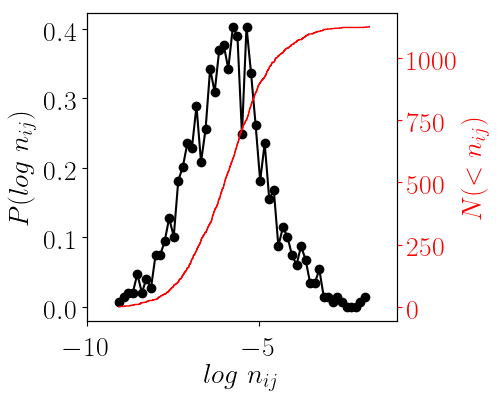

In [31]:
#--- histogram
nn=np.log10(nij['R*']*nij['T*'])
nmin=nn.min()
nmax=nn.max()
bins=np.linspace(nmin,nmax,int(nmax-nmin)*8)
hist, edge = np.histogram(nn,bins=bins,normed=True)

#--- accumulated histogram
slist=np.array(nn)
slist.sort()
N = len(slist)
d = histogramACCUMLTD( slist.tolist() )
keys=d.keys()
keys.sort()

xx=[];yy=[]
for ikey in keys:
    xx.append(d[ikey][0])
    yy.append(d[ikey][2])

#------------
#--- plot
#------------    
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlabel('$log~n_{ij}$')
ax.set_ylabel('$P(log~n_{ij})$')
(nmin,nmax) = (min(slist),max(slist))
ax.set_xlim(floor(nmin),ceil(nmax))
#ax.set_xlim(-10,0)
#ax.set_ylim(0,0.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(edge[:-1],hist,'-o',color='black')

ax2 = ax.twinx()
ax2.plot(xx,yy,
        linestyle='-', drawstyle='steps-post',color='red',
        linewidth=1.0) #--- accumulated
ax2.set_xlim(floor(nmin),ceil(nmax))
#ax2.set_ylim(0,600)

ax2.tick_params(axis='y',colors='red')
ax2.set_ylabel('$N(<n_{ij})$',color='red')

np.save('actual',np.c_[edge[:-1],hist])
np.save('acc_actual',np.c_[xx,yy])


#fig.savefig('%s/pn_actual.png'%DIR_OUTPT_figs,bbox_inches='tight')
plt.show()

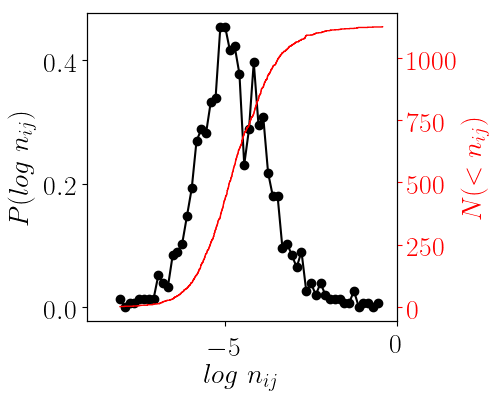

In [32]:
#--- histogram
nn=np.log10(Nij_rnd['R*']*Nij_rnd['T*'])
nmin=nn.min()
nmax=nn.max()
bins=np.linspace(nmin,nmax,int(nmax-nmin)*8)
hist, edge = np.histogram(nn,bins=bins,normed=True)

#--- accumulated histogram
slist=np.array(nn)
slist.sort()
N = len(slist)
d = histogramACCUMLTD( slist.tolist() )
keys=d.keys()
keys.sort()

xx=[];yy=[]
for ikey in keys:
    xx.append(d[ikey][0])
    yy.append(d[ikey][2])

#------------
#--- plot
#------------    
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlabel('$log~n_{ij}$')
ax.set_ylabel('$P(log~n_{ij})$')
(nmin,nmax) = (min(slist),max(slist))
ax.set_xlim(floor(nmin),ceil(nmax))
#ax.set_xlim(-7,1)
#ax.set_ylim(0,0.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(edge[:-1],hist,'-o',color='black')

ax2 = ax.twinx()
ax2.plot(xx,yy,
        linestyle='-', drawstyle='steps-post',color='red',
        linewidth=1.0) #--- accumulated
#ax2.set_xlim(-7,1)
#ax2.set_ylim(0,600)
ax2.set_xlim(floor(nmin),ceil(nmax))

ax2.tick_params(axis='y',colors='red')
ax2.set_ylabel('$N(<n_{ij})$',color='red')

np.save('random',np.c_[edge[:-1],hist])
np.save('acc_random',np.c_[xx,yy])


#fig.savefig('%s/pn_shuffled.png'%DIR_OUTPT_figs,bbox_inches='tight')
plt.show()

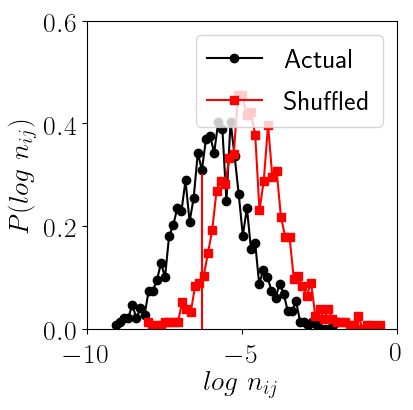

In [33]:
act = np.load('actual.npy')
rnd = np.load('random.npy')
acc_act = np.load('acc_actual.npy')
acc_rnd = np.load('acc_random.npy')

#------------
#--- plot
#------------    
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlabel('$log~n_{ij}$')
ax.set_ylabel('$P(log~n_{ij})$')
(nmin,nmax) = (min(slist),max(slist))
#ax.set_xlim(floor(nmin),ceil(nmax))
#ax.set_title('HypoDD')
ax.set_xlim(-10,0)
ax.set_ylim(0,0.6)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(act[:,0],act[:,1],'-o',color='black',label='Actual')
ax.plot(rnd[:,0],rnd[:,1],'-s',color='red',label='Shuffled')
ax.legend()

# ax2 = ax.twinx()
# ax2.plot(acc_act[:,0],acc_act[:,1],
#         linestyle='-', drawstyle='steps-post',color='black',
#         linewidth=1.0) #--- accumulated
# ax2.plot(acc_rnd[:,0],acc_rnd[:,1],
#         linestyle='-', drawstyle='steps-post',color='red',
#         linewidth=1.0) #--- accumulated
# ax2.set_xlim(-7,1)
# ax2.set_ylim(0,1200)

# ax2.tick_params(axis='y',colors='red')
# ax2.set_ylabel('$N(<n_{ij})$',color='red')
ax.plot([np.log10(n_thresh),np.log10(n_thresh)],[0,0.3],color='red')

#fig.savefig('%s/pn_actual_shuffled.png'%DIR_OUTPT_figs,bbox_inches='tight')

plt.show()


In [34]:
#--- triggering part of nij
nij_trig=nij[nij['T*']*nij['R*']<=n_thresh]
df_triggered = swarm_lohi.iloc[nij_trig['Event_id']]

#--- background part of nij
nij_background=nij[nij['T*']*nij['R*']>n_thresh]
nn = len(nij_background)
nij_background = nij_background.append(nij_removed,verify_integrity=False) #--- append removed part
assert len(nij_background) == nn + len(nij_removed)

#--- background events
background_child = list(set(nij_background['Event_id'])) #--- children
#
nij_copy = nij.copy()
Nij = nij_copy.append(nij_removed)
background_root  = list(set(Nij['Parent_id'])-set(Nij['Event_id'])) #--- root
#
background = background_root+background_child #--- total
assert len(background) == len(set(background)) #--- assert no overlap
#
df_background = swarm_lohi.iloc[background]

assert len(df_triggered) + len(df_background) == len(swarm_lohi), '%s != %s' %(len(df_triggered) + len(df_background),len(swarm_lohi))


#display(nij_trig.info())
trig_ratio = 1.0*len(df_triggered) / len(swarm_lohi) #cdf_actual[edges_actual[:-1]<=n_thresh][-1]
print 'trig_ratio=%s'%trig_ratio

trig_ratio=0.350177304965


### Declustered Catalog

In [35]:
df_triggered.head()

,date,latitude,longitude,depth,x(m),y(m),z(m),magnitude,x(km),y(km),z(km)
6,2015-07-05 05:49:15.370,34.401786,-118.979435,-13.880,447.8,-123.8,-201.1,0.43,1.898888,0.583601,-13.880
10,2015-07-05 08:14:07.910,34.401550,-118.978817,-13.868,504.8,-149.7,-212.6,0.55,1.967683,0.557421,-13.868
16,2015-07-05 10:46:20.600,34.402039,-118.979557,-13.832,436.9,-95.9,-249.3,0.77,1.885307,0.611666,-13.832
27,2015-07-05 13:16:34.160,34.402527,-118.979761,-13.802,418.5,-41.5,-279.0,1.74,1.862598,0.665800,-13.802
28,2015-07-05 13:21:32.480,34.402051,-118.980672,-13.762,334.5,-94.4,-319.2,0.46,1.761186,0.612997,-13.762


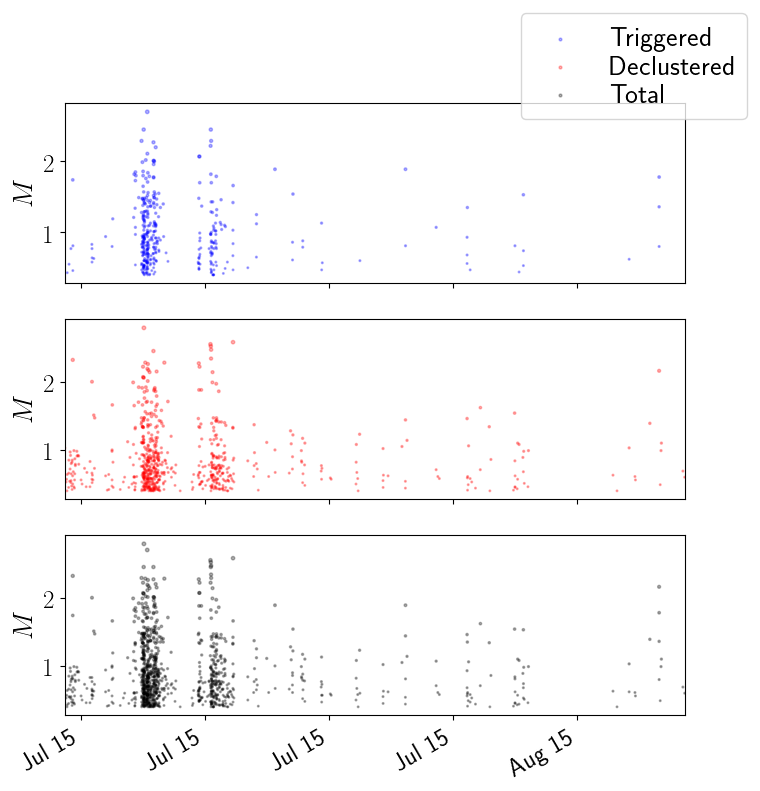

In [36]:
#--- plot complete catalog

def ConvertDailyRate(hist, bin_edges ):
#---convert data to daily rate     
    t0 = pd.to_datetime( bin_edges[ 0 ] )
    t1 = pd.to_datetime( bin_edges[ 1 ] )
    delta_t = ( t1 - t0 ).total_seconds() / ( 60 * 60 * 24)
    hist *= ( bin_edges[ 1 ] - bin_edges[ 0 ] ) / delta_t

def ActivityRate( df ):
    nbins = int( (df['date'].max()-df['date'].min()).days / 2 ) #--- number of bins
    
    tmax = df['date'].max().value #--- min/max
    tmin = df['date'].min().value
    
    hist, bin_edges = np.histogram(df['date'].apply(lambda x:x.value),                                   
                    bins=np.linspace(tmin,tmax,nbins+1,endpoint=True),density=True) #--- probability dist.
    hist *= len( df['date'] ) #--- int(hist).dt=n
    cumm_number = np.cumsum(hist)*(bin_edges[1]-bin_edges[0]) #--- accumulated number
    ConvertDailyRate( hist, bin_edges ) #--- daily activity
    return bin_edges, hist, cumm_number
    
class Tlohi:
    def __init__(self,lo,hi):
        self.lo = lo
        self.hi = hi
        
#---------------------------------------------------------------------------------
#-----------------
#-----------------
#-----------------
#---------------------------------------------------------------------------------
#--- set min/max time to avoid temporal incompletenesss issue
df_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
df_lohi = GetCartesian( df_lohi )
df_lohi.reset_index(inplace=True,drop=True)

#--- activity rate
bin_edges, hist, cumm_number = ActivityRate( df_lohi )

#--- temporal map
fig = plt.figure(figsize=(8,9))#,dpi=75)
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
ax1.set_ylabel('$M$')
ax1.set_xlim(df_lohi['date'].min(),df_lohi['date'].max())
ax1.tick_params(axis='both',labelsize=18)
ax2.set_ylabel('$M$')
ax2.set_xlim(df_lohi['date'].min(),df_lohi['date'].max())
ax2.tick_params(axis='both',labelsize=18)
ax3.set_ylabel('$M$')
ax3.set_xlim(df_lohi['date'].min(),df_lohi['date'].max())
ax3.tick_params(axis='both',labelsize=18)
#ax1.set_ylim(mc,2.5)
#ax1.set_xlim(pd.to_datetime('2019-03-01'),pd.to_datetime('2019-03-30'))
#
# ax1R = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax1R.set_ylabel('daily activity rate',color='red')
# ax1R.set_yscale('log')
# ax1R.tick_params(axis='y',labelsize=18,colors='red')
#
#ax2 = fig.add_subplot(212)
#ax2.set_ylim(mc,2.5)
#ax2.set_ylabel('Max Rate (m3/min)')
#ax2.set_ylim(11.9,12.1)
#ax2.set_xlim(pd.to_datetime('2019-03-01'),pd.to_datetime('2019-03-30'))
#

#--- plot
ax1.scatter(df_triggered['date'],df_triggered['magnitude'],
            s=2**(df_triggered['magnitude']),
            alpha=0.3,color='blue', label = 'Triggered')
#
ax2.scatter(df_background['date'],df_background['magnitude'],
            s=2**(df_background['magnitude']),
            alpha=0.3,color='red', label = 'Declustered')
#
ax3.scatter(df_lohi['date'],df_lohi['magnitude'],
            s=2**(df_lohi['magnitude']),
            alpha=0.3,color='black', label = 'Total')
fig.legend(loc='best',frameon=True,labelspacing=0)
#ax1R.plot(pd.to_datetime(bin_edges[:-1]),hist,'r-',linewidth=1)

#DrawFrame(ax1, (0.11,0.07),(0.32,0.1),0.01)
ax3.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))
fig.autofmt_xdate()

#fig.savefig('%s/timeSeries_ok.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')

plt.show()

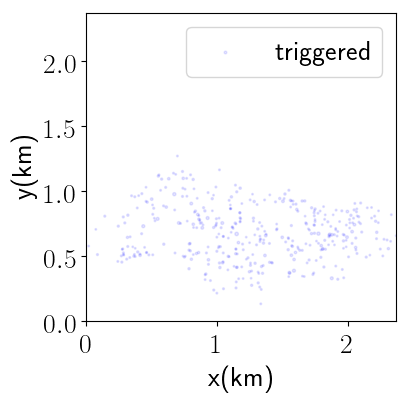

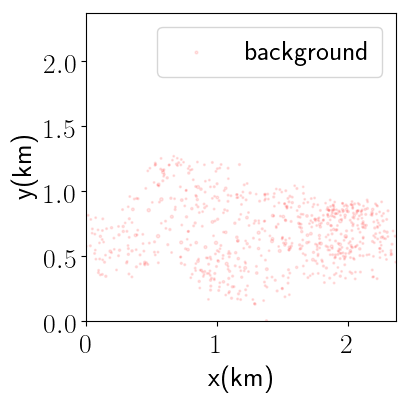

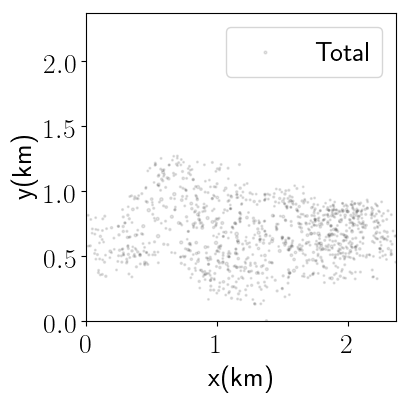

In [37]:
#--- plot spatial map 
#--- fault map california: temporal evolution of events


#--- set min/max time to avoid temporal incompletenesss issue
df_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
df_lohi = GetCartesian( df_lohi )
df_lohi.reset_index(inplace=True,drop=True)
# df_triggered = GetCartesian( df_triggered )
# df_background = GetCartesian( df_background )


xlo = df_lohi['x(km)'].min()
xhi = df_lohi['x(km)'].max()
ylo = df_lohi['y(km)'].min()
yhi = df_lohi['y(km)'].max()
L = max(xhi-xlo,yhi-ylo)
exp = 2

df_triggered.plot.scatter('x(km)','y(km)',
                        s=exp**(df_triggered['magnitude']),
                        color = 'blue', label = 'triggered',xlim=(0,L),ylim=(0,L),
#                        c='date',cmap='jet',
                        alpha=0.1,
                        figsize=(4,4)) #--- plot

df_background.plot.scatter('x(km)','y(km)',
                        s=exp**(df_background['magnitude']),
                        color = 'red', label = 'background',xlim=(0,L),ylim=(0,L),
#                        c='date',cmap='jet',
                        alpha=0.1,
                        figsize=(4,4)) #--- plot

df_lohi.plot.scatter('x(km)','y(km)',
                        s=exp**(df_lohi['magnitude']),
                        color = 'black', label = 'Total',xlim=(0,L),ylim=(0,L),
#                        c='date',cmap='jet',
                        alpha=0.1,
                        figsize=(4,4)) #--- plot







plt.show()
#plt.savefig('%s/map.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')



In [38]:
#trig_ratio *= 0.75
#n_thresh_new = edges_actual[:-1][cdf_actual <= trig_ratio][-1]
#new_quantile = cdf[edges[:-1]<=n_thresh_new][-1]
#print 'new_quantile=%s'%new_quantile
#n_thresh = n_thresh_new

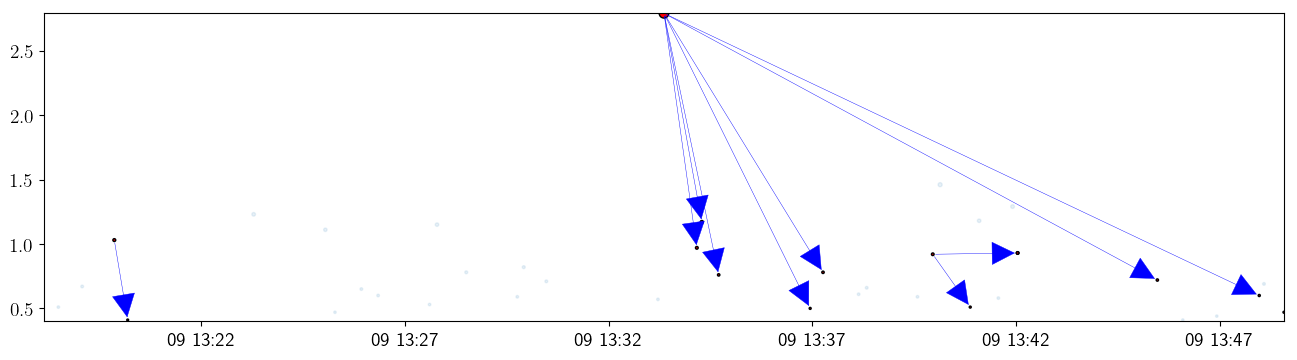

In [39]:
#--- plot clusters


def Inside(t,(tmin,tmax)):
    if tmin<= t<tmax:
        return True
    return False    

def GetTrigList( nij_trig ):
    d_trig = {}
    for items in nij_trig.itertuples():
        triggerID = items.Parent_id
        d_trig.setdefault( triggerID, [] ).append( items.Event_id )
    return d_trig

def PlotArrowsTime(df_complete,d_trig, (tmin,tmax), (xmin,xmax), (ymin,ymax) ):
    tlist=[]
    mlist=[]
    for triggerID in d_trig: #--- mother events
        
        t0 = df_complete['date'].iloc[ triggerID ] #--- time of mother event
        m0 = df_complete['magnitude'].iloc[triggerID] #--- magnitude
        
        if not ( Inside(t0,(tmin,tmax) ) and #--- within the given interval
                 Inside(swarm_lohi['x(km)'].iloc[triggerID],(xmin,xmax)) and 
                 Inside(swarm_lohi['y(km)'].iloc[triggerID],(ymin,ymax)) ):
            continue

#        x0 = md.date2num( t0 ) #--- convert to time object
#        y0 = m0 #--- magnitude
        
        tlist.append( t0 )
        mlist.append( m0 )

        for daughter_id in d_trig[triggerID]: #--- children
            
            t1 = df_complete['date'].iloc[ daughter_id ] #--- time
            m1 = df_complete['magnitude'].iloc[ daughter_id ] #--- magnitude
            
            tlist.append( t1 )
            mlist.append( m1 )
            
            if not ( Inside(t1,(tmin,tmax) ) and #--- within the given interval
                     Inside(swarm_lohi['x(km)'].iloc[daughter_id],(xmin,xmax)) and 
                     Inside(swarm_lohi['y(km)'].iloc[daughter_id],(ymin,ymax)) ):
                continue
                
#            x1 = md.date2num( t1 ) #--- convert to time object
#            y1 = m1 #--- magnitude

#            xw = x1 - x0 #--- t_child-t_parent
#            yw = y1 - y0 #--- m_child - m_parent
            plt.annotate("", (t1,m1), xytext=(t0, m0),
                         textcoords='data',
                        arrowprops=dict(arrowstyle="-|>,head_width=.4,head_length=.8",color="b",linewidth="0.3")) 
    
    #--- plot circles
    df=pd.DataFrame({'date':tlist,'mag':mlist})
    plt.scatter(df['date'], df['mag'],
                s=4**(df['mag']),
                alpha=1,
                facecolors='red',color='black')
    ##plt.savefig('timeSeries.png')
    
#--------------------------------------
#----- key: event value: aftershock id
#--------------------------------------
d_trig = GetTrigList( nij_trig )

#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)

#--------------------
#--- cartesian coords
#--------------------
swarm_lohi = GetCartesian( swarm_lohi )



#--- plot arrows
#dt=30
for ii in xrange(1):
    #--- setup
    fig = plt.figure(figsize=(16,4),frameon=False) #, dpi=75)
    #--- xlimit
    xmin = swarm_lohi['longitude'].min()
    xmax = swarm_lohi['longitude'].max()
    ymin = swarm_lohi['latitude'].min()
    ymax = swarm_lohi['latitude'].max()
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    
    #--- plot all events
    plt.ylim(mc,swarm_lohi['magnitude'].max())
    plt.scatter(swarm_lohi['date'],swarm_lohi['magnitude'],
                s=2*np.exp(swarm_lohi['magnitude']),
            alpha=0.1)

    key_max = swarm_lohi.loc[nij_trig.groupby(by='Parent_id').groups.keys()]['magnitude'].sort_values(ascending=False).index[ii]
#    print 'key=',key_max
#    print 't=',swarm_lohi.loc[key_max]['date']
#    print 'x=',swarm_lohi.loc[key_max]['x(km)'],
#    print 'y=',swarm_lohi.loc[key_max]['y(km)'],
#    print 'z=',swarm_lohi.loc[key_max]['z(km)']
    dt = nij_trig[nij_trig['Parent_id']==key_max]['T'].max()
    dx = nij_trig[nij_trig['Parent_id']==key_max]['R'].max()
    tt=swarm_lohi['date'].loc[key_max]
    xx = swarm_lohi.loc[key_max][['x(km)','y(km)','z(km)']]
    PlotArrowsTime( swarm_lohi, d_trig,
                       ( tt+datetime.timedelta(days=-dt),tt+datetime.timedelta(days=+dt)), 
           (xx['x(km)']-dx,xx['x(km)']+dx),
           (xx['y(km)']-dx,xx['y(km)']+dx) )
    plt.xlim(tt+datetime.timedelta(days=-dt),tt+datetime.timedelta(days=+dt))
plt.show()

In [40]:
# #--- plot clusters


# def Inside(t,(tmin,tmax)):
#     if tmin<= t<tmax:
#         return True
#     return False    

# def GetTrigList( nij_trig ):
#     d_trig = {}
#     for items in nij_trig.itertuples():
#         triggerID = items.Parent_id
#         d_trig.setdefault( triggerID, [] ).append( items.Event_id )
#     return d_trig

    
# def PlotArrowsSpace(df_complete,d_trig, (tmin,tmax), (xmin,xmax), (ymin,ymax) ):
#     xlist=[]
#     ylist=[]
#     mlist=[]
#     for triggerID in d_trig: #--- mother events
        
#         t0 = df_complete['date'].iloc[ triggerID ] #--- time of mother event
#         ( x0, y0 ) = ( swarm_lohi['longitude'].iloc[triggerID], 
#                        swarm_lohi['latitude'].iloc[triggerID] )
#         m0 = df_complete['magnitude'].iloc[triggerID] #--- magnitude
        
# #        if not ( Inside(t0,(tmin,tmax) ) and #--- within the given interval
#  #                Inside(x0,(xmin,xmax)) and 
#   #               Inside(y0,(ymin,ymax)) ):
#    #         continue

#         for daughter_id in d_trig[triggerID]: #--- children
#             t1 = df_complete['date'].iloc[ daughter_id ] #--- time
#             ( x1, y1 ) = ( swarm_lohi['longitude'].iloc[ daughter_id ], 
#                            swarm_lohi['latitude'].iloc[ daughter_id ] )
#             m1 = df_complete['magnitude'].iloc[ daughter_id ] #--- magnitude
            
#             xlist.append( x1 )
#             ylist.append( y1 )
#             mlist.append( m1 )
            
# #            if not ( Inside(t1,(tmin,tmax) ) and #--- within the given interval
# #                     Inside(x1,(xmin,xmax)) and 
# #                     Inside(y1,(ymin,ymax)) ):
# #                continue

#             ax.annotate("", (x1,y1), xytext=(x0, y0),
#                          textcoords='data',
#                         arrowprops=dict(arrowstyle="-|>,head_width=.2,head_length=.8",color="b",linewidth="0.3")) 
 
#         #--- plot mother
#         plt.scatter(x0,y0,
#                     s=exponent**m0,
#                     marker='*',
#                     facecolors='yellow',color='black',
#                     alpha=1.0)

#     #--- plot circles
#     df=pd.DataFrame({'x(km)':xlist,'y(km)':ylist,'m':mlist})
#     ax.scatter(df['x(km)'], df['y(km)'],
#                 s=exponent**(df['m']),
#                 alpha=1,
#                 facecolors='red',color='black')
    
# #--------------------------------------
# #----- key: event value: aftershock id
# #--------------------------------------
# d_trig = GetTrigList( nij_trig )

# #--------------------
# #----- subset (the same as trig. analysis)
# #--------------------
# swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
#                              'magnitude', 
#                              ( mc, sys.maxint ) ) 
# swarm_lohi.reset_index(inplace=True,drop=True)

# #--------------------
# #--- cartesian coords
# #--------------------
# swarm_lohi = GetCartesian( swarm_lohi )



# #--- plot arrows
# exponent = 4
# for ii in xrange(1):
#     #--- setup
#     fig = plt.figure(figsize=(8,8)) #,frameon=False) #, dpi=75)
#     ax = fig.add_subplot(111)
#     #--- xlimit
#     xmin = swarm_lohi['longitude'].min()
#     xmax = swarm_lohi['longitude'].max()
#     ymin = swarm_lohi['latitude'].min()
#     ymax = swarm_lohi['latitude'].max()
#     ax.tick_params(axis='x', labelsize=14)
#     ax.tick_params(axis='y', labelsize=14)
    
#     #--- plot all events
#     ax.scatter(swarm_lohi['longitude'], swarm_lohi['latitude'], # 'x(km)'],swarm_lohi['y(km)'],
#                 s=exponent**swarm_lohi['magnitude'],
#                 alpha=0.1)

# #    key_max = swarm_lohi.loc[nij_trig.groupby(by='Parent_id').groups.keys()]['magnitude'].sort_values(ascending=False).index[ii]
#     key_max = nij_trig.groupby(by='Parent_id').count()['R'].sort_values(ascending=False).index[ii]
#     dt = nij_trig[nij_trig['Parent_id']==key_max]['T'].max()
#     dx = 0.1 #nij_trig[nij_trig['Parent_id']==key_max]['R'].max()
#     tt = swarm_lohi['date'].loc[key_max]
#     xx = swarm_lohi.loc[ key_max ][['longitude','latitude']] #[['x(km)','y(km)','z(km)']]
    
#     PlotArrowsSpace( swarm_lohi, d_trig,
#                        ( tt+datetime.timedelta(days=-dt),tt+datetime.timedelta(days=+dt)), 
#            (xx['longitude']-dx,xx['longitude']+dx),
#            (xx['latitude']-dx,xx['latitude']+dx) )
#     ax.set_xlim(xx[0]-dx,xx[0]+dx)
#     ax.set_ylim(xx[1]-dx,xx[1]+dx)
# plt.show()

In [41]:
nij_trig.groupby(by='Parent_id').count()['R'].sort_values(ascending=False).index[0]

219

In [42]:
# #--- spatial clusters



# #def GetCartesian2nd( dff ):
# #    df = dff.copy()
# #    xlo = df['longitude'].min()
# #    xhi = df['longitude'].max()
# #    ylo = df['latitude'].min()
# #    yhi = df['latitude'].max()
# #    getDistX = lambda x: geopy.distance.vincenty( ( 0.0, xlo ), ( 0.0, x ) ).km
# #    getDistY = lambda y: geopy.distance.vincenty( ( ylo, 0.0 ), ( y, 0.0 ) ).km
# #    df[ 'x' ] = df[ 'longitude' ].apply( getDistX )
# #    df[ 'y' ] = df[ 'latitude' ].apply( getDistY )
# #    return df


# def PlotMap(df_complete,TRIG_ID, (tmin,tmax), (xmin,xmax), (ymin,ymax) ):
#     #--- plot 
#     counter = 0
#     exponent=4
#     for triggerID,colin in zip(TRIG_ID,colors):
#         t0 = df_complete['date'].iloc[ triggerID ]
# #        if not ( Inside(t0,(tmin,tmax) ) and 
# #                 Inside(df_complete['y(m)'].iloc[triggerID],(xmin,xmax)) and 
# #                 Inside(df_complete['z(m)'].iloc[triggerID],(ymin,ymax)) ):  
# #              continue
#         counter += 1
#         if counter > 1:
#             break
#         #--- plot    
#         fig = plt.figure(figsize=(5,5))#,dpi=75)
#         ax = fig.add_subplot(111)
# #        plt.xlim(xmin,xmax)
# #        plt.ylim(ymin,ymax)
#         plt.tick_params(axis='x', labelsize=14)
#         plt.tick_params(axis='y', labelsize=14)
#         plt.scatter(df_complete.loc[triggerID]['x(km)'],
#                     df_complete.loc[triggerID]['y(km)'],
#                     s=exponent**df_complete.loc[triggerID]['magnitude'],
#                     facecolors='white',color='white')
#         d={'x':[],'y':[],'m':[],'t':[]}
#         #--- plot daughters
#         for daughter_id in d_trig[triggerID]:
#             t1 = df_complete['date'].iloc[ daughter_id ]
# #            if not ( Inside(t1,(tmin,tmax) ) and 
# #                     Inside(df_complete['y(m)'].iloc[daughter_id],(xmin,xmax)) and 
# #                     Inside(df_complete['z(m)'].iloc[daughter_id],(ymin,ymax)) ):
# #                continue
#     #--- remove pairs with r > cs.t
# #            if rmat[ triggerID, daughter_id ] > cs * tmat[ triggerID, daughter_id ]:
# #                print 'hello!'
# #                continue

#             d['t'].append( t1 )
#             d['x'].append(df_complete['x(km)'].iloc[daughter_id])
#             d['y'].append(df_complete['y(km)'].iloc[daughter_id])
#             d['m'].append(df_complete['magnitude'].iloc[daughter_id])
#         df=pd.DataFrame(d)
#         plt.scatter(df['x'],df['y'],
#                     s=exponent**df['m'],
#                     c=df['t'], cmap='jet') #,alpha=0.1)
#         plt.colorbar()
#         #--- plot mother
#         plt.scatter(df_complete['x(km)'].iloc[triggerID],df_complete['y(km)'].iloc[triggerID],
#                     s=exponent**df_complete['magnitude'].iloc[triggerID],
#                     marker='*',
#                     facecolors='yellow',color='black',
#                     alpha=1.0)
#         #--- 


    
# colors = itertools.cycle(["r", "b", "g","b"])
# #cs = 3 * (24*3600) #--- km per day

# #--- sort
# new_list = [[len(d_trig[triggerID]),triggerID] for triggerID in d_trig]
# new_list.sort(reverse=True)
# TRIG_ID = [i[1] for i in new_list]

# #--- xlimit
# swarm_lohi=GetCartesian(swarm_lohi)
# #swarm_lohi['y(m)']=swarm_lohi['x']
# #swarm_lohi['z(m)']=swarm_lohi['y']
# xmin = swarm_lohi['x(km)'].min()
# xmax = swarm_lohi['x(km)'].max()
# ymin = swarm_lohi['y(km)'].min()
# ymax = swarm_lohi['y(km)'].max()
# #plt.tick_params(axis='x', labelsize=14)
# #plt.tick_params(axis='y', labelsize=14)

# #--- plot arrows
# PlotMap( swarm_lohi, TRIG_ID,
# #          (pd.to_datetime('2010-04-04'),pd.to_datetime('2010-06-26')),
# #          (pd.to_datetime('2010-04-08'),pd.to_datetime('2010-04-14')),
#                        ( swarm['date'].min(), swarm['date'].max()), 
#            (xmin,xmax),
#            (ymin,ymax) )
# plt.show()

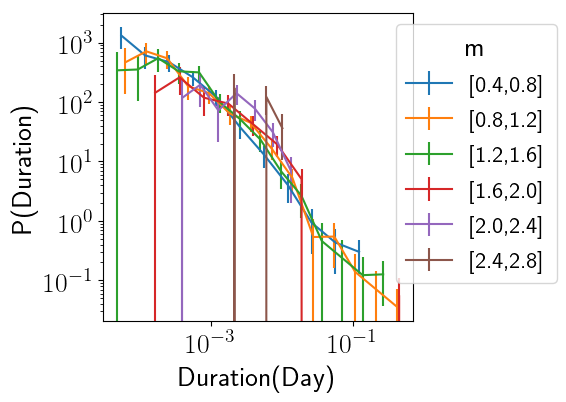

In [43]:
#--- cluster life time


def GetPairsWithSpecifiedParentMag((m0,m1),catalog,df):
    df_parents = df.groupby(by='Parent_id').groups #--- parent events
    ds = catalog['magnitude'].loc[df_parents.keys()] #--- mag. of parent events
    ds_m=ds[(m0 <= ds) & (ds < m1)] #--- parent events with m0<m<m1
    df_m=df[pd.DataFrame([df['Parent_id'] ==k for k in ds_m.index]).any()] #--- data frame
    return df_m

#def AddDist( df_trig, df_complete ):
#    x=df_complete.loc[ df_trig['Event_id'] ]['r(m)'] 
#    y=df_complete.loc[ df_trig['Parent_id'] ]['r(m)']
#    df_trig['R'] = pd.Series(numpy.linalg.norm(x-y)))
#    assert len ( df_trig[ df_trig['R'] == 0.0 ] ) == 0, '%s'%display( df_trig[ df_trig['R'] == 0.0 ] )

def AddTime( df_trig, df_complete ):
    prefact = 1.0 / ( 24.0 * 60 * 60 ) #--- daily
    x=df_complete.loc[ df_trig['Event_id'] ]
    y=df_complete.loc[ df_trig['Parent_id'] ]
    x.reset_index(inplace=True)
    y.reset_index(inplace=True)
    df_trig['T'] = x['date']-y['date']
    df_trig['T'] = df_trig['T'].apply(lambda x: x.total_seconds() * prefact)

def RemovePair( df, cs ):
    return df [ df[ 'R' ] <= df[ 'T' ] * cs ]

#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)


#--- choose m0<m<m1
n = 7
#m = list(np.linspace(mc,swarm['magnitude'].max(),n))
m_parents = swarm_lohi.loc[nij_trig.groupby(by='Parent_id').groups.keys()]['magnitude']
m = list(np.linspace(m_parents.min()-1e-6,m_parents.max()+1e-6,n))
#m+=[swarm['magnitude'].max()]

X={}
rho_dict={}
m_range={}
Err={}
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i in xrange( len(m) - 1 ):
    m0 = m[ i ]
    m1 = m[ i + 1 ]
        
#    print m0, m1
#    nij_trig.groupby(by='Parent_id')
    
    df_trig = GetPairsWithSpecifiedParentMag((m0,m1),swarm_lohi,nij_trig) #--- get parent with m0<m<m1
    df_trig.reset_index( inplace = True, drop = True )
    #--- add distance & time column
#    df_trig['R'] = rmat[df_trig['Parent_id'],df_trig['Event_id']]
#    df_trig['T'] = tmat[df_trig['Parent_id'],df_trig['Event_id']]
#    assert len ( df_trig[ df_trig['R'] == 0.0 ] ) == 0, '%s'%display( df_trig[ df_trig['R'] == 0.0 ] )
#    assert len ( df_trig[ df_trig['T'] == 0.0 ] ) == 0, '%s'%display( df_trig[ df_trig['T'] == 0.0 ] )
    
    #--- remove pairs with r > cs.t
#    cs = 3 * (24*3600) #--- km per day
#    df_trig = RemovePair( df_trig, cs )

    #--- life time
    df_duration = df_trig.groupby(by='Parent_id')['T'].max()

    #--- rho plots
    n_decades = int( math.ceil( log(df_duration.max()/df_duration.min(),10) ) )
    nbin_per_decade = 3
    nbins =  nbin_per_decade * n_decades
    rho, xedges=np.histogram(df_duration, 
                             density=True,
                             bins=np.logspace(log(df_duration.min(),10),
                                              log(df_duration.max(),10),nbins))
    hist, xedges=np.histogram(df_duration,
                              bins=np.logspace(log(df_duration.min(),10),
                                               log(df_duration.max(),10),nbins))
    err = rho/np.sqrt(hist)
        
    
    #--- rho
#    plt.xlim(1e-3,1e2)
#    plt.ylim(1e-3,1e2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Duration(Day)')
    plt.ylabel('P(Duration)')
    plt.errorbar(xedges[:-1],rho, yerr=err,label='[%2.1f,%2.1f]'%(m0,m1))
    fontP = FontProperties()
    fontP.set_size('small')
    plt.legend(title='m',prop=fontP,loc='upper right',bbox_to_anchor=(1.5, 1))
    x=xedges[:-1]
    
    X[i] = x[:]
    rho_dict[i]=rho[:]
    m_range[i]=np.array([m0,m1])
    Err[i]=err[:]
#plt.savefig('%s/duration.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')


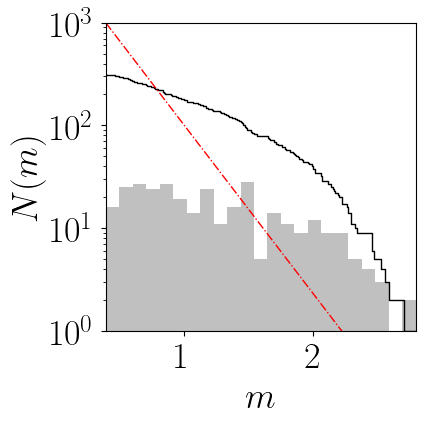

In [50]:
#--- histograms: magnitude of mother events

#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)


mlist = swarm_lohi.loc[ nij_trig.groupby(by='Parent_id').groups.keys() ]['magnitude']
#plt.hist(mlist)

list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
mlist0= swarm_lohi['magnitude'].loc[df_zeros.index]


#--- accumulated histogram
N = len(mlist)+len(mlist0)
slist=mlist.tolist()+mlist0.tolist() #np.array(swarm_copy['magnitude'])
slist.sort()
d = histogramACCUMLTD( slist )
keys=d.keys()
keys.sort()

#--- plot
fig, ax = plt.subplots(figsize=(4,4))
ax.set_yscale('log')
ax.set_xlabel('$m$')
ax.set_ylabel('$N(m)$')
xmin=min(slist)
xmax=max(slist)
ax.axis([xmin,xmax,1,1000])
#ax.set_xticks(np.linspace(1,6,6))

dx=0.1
junk = ax.hist( slist,
                bins=int((xmax-xmin)/dx),
               label='histogram',color='silver') #--- histogram
xx=[];yy=[]
for ikey in keys:
    xx.append(d[ikey][0])
    yy.append(N-d[ikey][2])
ax.plot(xx,yy,
            linestyle='-', drawstyle='steps-post',color='black',
             linewidth=1.0) #--- accumulated
    
b=1.65
ax.plot([xmin,xmax],
        [1e3, 1e3* 10**(-b*(xmax-xmin))],'r-.',linewidth=1)

#DrawFrame(ax, (0.2,0.06),(0.14,0.06),0.1,LOG_Y=True)

#plt.savefig('%s/gr.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)


covariance [[ 0.00137638 -0.00070108]
 [-0.00070108  0.00042214]]


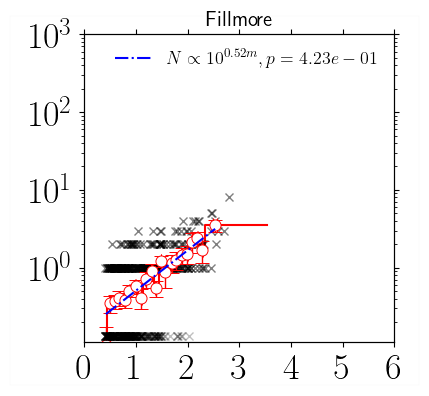

In [54]:
#--- productivity relation

mpl.rcParams.update(mpl.rcParamsDefault)
warnings.filterwarnings('ignore') #--- get rid of warnings

rc('text', usetex=True)
font = {'size'   : 26}
matplotlib.rc('font', **font)

import numpy as np
import math
from astropy import stats
from scipy.stats import chi2

def GetPairsWithSpecifiedParentMag((m0,m1),catalog,df):
    df_parents = df.groupby(by='Parent_id').groups #--- parent events
    ds = catalog['magnitude'].loc[df_parents.keys()] #--- mag. of parent events
    ds_m=ds[(m0 <= ds) & (ds < m1)] #--- parent events with m0<m<m1
    df_m=df[pd.DataFrame([df['Parent_id'] ==k for k in ds_m.index]).any()] #--- data frame
    return df_m, np.mean( ds_m ), np.std( ds_m )/(len(ds_m))**0.5 #--- exponential: std=mean

def GetParentsMagnitudes( swarm_lohi, df_trig ):
    mlist = swarm_lohi.loc[ df_trig.groupby(by='Parent_id').groups.keys() ]['magnitude']

    list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
    df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
    mlist0= swarm_lohi['magnitude'].loc[df_zeros.index]

    return mlist.tolist()+mlist0.tolist()


def AdjustBins(data,bins):
    hist, xedges=np.histogram(data, #--- histogram
                              bins=bins)
    tmp = [xedges[0]]
    for i,j in zip(xedges[1:],hist): #--- expand bins 
        if j < 2:
            continue
        tmp.append(i)
    tmp.append(xedges[-1])
#    if hist[-1] < 2:
#        tmp.pop(-2)
    return tmp 

def GetEvenQuantiles(mlist, nn):
    N=len(mlist)
    hist, edges = np.histogram(mlist,bins=1024*10,density=None)
    assert np.sum(hist) == N
#     plt.plot(edges[:-1],np.cumsum(hist))
#     plt.show()

    Quantiles = np.concatenate([(1.0*np.arange(nn)/nn)[1:],np.array([1])])
#    print Quantiles
    m_q=[np.min(mlist)-1e-6]
    for q in Quantiles:
        m_q+=[edges[:-1][np.cumsum(hist)<=q*N][-1]]
#    print len(mlist[mlist<m_q[1]]),N/2

    return m_q
    
def GetPval( m_mean, N_as, err_N, func, popt ):
    x = m_mean
    y = N_as
    ye = err_N
    #--- goodness of fit
    n=len(x)
    m=2 #--- number of coefficients
    xsq = np.sum(((y-func(x,*popt))/ye)**2)
    pval=1-chi2.cdf(xsq,n-m)
    return pval


def PointWiseVariance( m_mean, N_as):

    n = len( m_mean )
    p = 1
    y = np.log10(N_as)
    x = m_mean

    #--- estimate beta
    X = np.c_[x,np.ones( n )]
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
    
    #--- estimate sigma
    def func( x, beta0, beta1 ):
        return beta0 * x + beta1
    
    y_hat = func( x, *beta ) #--- estimated output
    sigma_sq = np.sum( ( y - y_hat ) ** 2 ) / ( n - p - 1 ) #--- variance
    
    var_beta = np.linalg.inv(np.matmul(X.T,X)) * sigma_sq #--- uncertainties in beta
    
    var_y = np.matmul( np.matmul( X, var_beta ), X.T ) #--- pointwise
        
    y_up = y_hat + 2 * np.diag(var_y) ** 0.5 #--- std-error bands
    y_lo = y_hat - 2 * np.diag(var_y) ** 0.5

    return y_lo, y_up



def ProdRelation( nij_trig, swarm_lohi, **kwargs ):
#    print kwargs
    #--- remove pairs with r > cs.t
    df_trig = nij_trig.copy()
    
    #--- parents' magnitudes
    m_list = GetParentsMagnitudes( swarm_lohi, df_trig )
    
    #--- number of daughters for each mother
    df_nn = df_trig.groupby(by='Parent_id').count()['Event_id']
    
    
    #--- include daughters with zero children
    list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
    df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
#    print swarm_lohi['magnitude'].loc[df_zeros.index]
#    print df_zeros

    #--- parents' magnitudes including those with zero child
    mm = swarm_lohi['magnitude'].loc[df_zeros.index].tolist() + \
    swarm_lohi['magnitude'].loc[df_nn.index].tolist() #swarm_lohi[swarm_lohi['magnitude']>=mc]['magnitude']
    mm = np.array(mm)
#    mm=list(set(mm))
    mm.sort()
    mlist_with_zero=np.array(mm)
    
    #--- choose m0<m<m1
    dm = 0.1
    m_min = min(mlist_with_zero)-1.0e-6 #0.5*dm
    m_max = max(mlist_with_zero)+1.0e-6 #0.5*dm
    m_lo = kwargs['mlo'] if 'mlo' in kwargs  else m_min
    m_hi = kwargs['mhi'] if 'mhi' in kwargs  else m_max
    n = int( ( m_max - m_min ) / dm )
    m = list(np.linspace(m_min,m_max,n))
    #
    Mlist = m=np.histogram_bin_edges(mlist_with_zero, bins='auto')
    if 'NON_UNIFRM' in kwargs and kwargs['NON_UNIFRM']:
        Mlist = m = stats.bayesian_blocks(mlist_with_zero)
#    dxx, m = stats.knuth_bin_width(mlist_with_zero, return_bins=True)
                #
    if 'QUANT' in kwargs and kwargs['QUANT']:
        Mlist = m = GetEvenQuantiles(mlist_with_zero, n)
    #
    if 'ADJ_BIN' in kwargs and kwargs[ 'ADJ_BIN' ]:
        m=AdjustBins(mlist_with_zero,m)#[:-1] 
    if 'MBINS' in kwargs and kwargs[ 'MBINS' ]:
        m = kwargs[ 'MBINS' ]
    Mlist=m
#    print len(m)
    #--- choose mag. range based on evenly dist. q
#    print m, np.max(mlist_with_zero)
    
    m_mean=np.array(np.zeros(len(m) - 1))
    m_err=np.array(np.zeros(len(m) - 1))
    N_as = np.array(np.zeros(len(m) - 1))
    err_N = np.array(np.zeros(len(m) - 1))
    for i in xrange( len(m) - 1 ):
        try:
            m0 = m[ i ] - 1.0e-6
            m1 = m[ i + 1 ] + 1.0e-6

            df, m_mean[ i ], m_err[i] = GetPairsWithSpecifiedParentMag((m0,m1),
                                                             swarm_lohi,df_trig) #--- get parent with m0<m<m1
            df.reset_index( inplace = True, drop = True )
            
            #--- number of daughters for each mother
            df_n = df.groupby(by='Parent_id').count()['Event_id']
        
            #--- include daughters with zero children
            list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
            subset = swarm_lohi.loc[list_of_zero_afs]
            list_of_zero_afs = subset[(subset['magnitude'] >= m0) & (subset['magnitude'] <= m1)].index    
            df_zeross = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
            
            N_as[ i ] = 1.0*(df_n.sum()+ df_zeross.sum())/(len(df_n)+len(df_zeross))
            err_N[ i ] = (N_as[ i ]/(len(df_n)+len(df_zeross)))**0.5 #--- poisson
    #        err_N[ i ]=np.std(df_n.tolist()+df_zeros.tolist())/(len(df_n)+len(df_zeros))**0.5
#            print len(df_n)+len(df_zeross)
#            display(df_n.head())
        except:
#            print traceback.print_exc()
            continue
        
    #--- scattered plot
    fig = plt.figure(figsize=(4,4),frameon=True)
    ax = fig.add_subplot(111)
    title = kwargs['title'] if 'title' in kwargs else ''
    ax.set_title(title,fontsize='xx-small')
    ax.set_xlim(np.floor(m_min),np.ceil(swarm_lohi['magnitude'].max()))
    ax.set_ylim(0.11,10**np.ceil(np.log10(df_nn.max())))
    ax.plot( swarm_lohi['magnitude'].loc[df_nn.index],
               df_nn,
              'x',color='black',alpha=0.5,zorder=2,label='')
    ax.plot(m, np.append(N_as,N_as[-1]), linestyle='-', drawstyle='steps-post',color='red',zorder=1)
    ax.legend(fontsize=0)
#    
    ax2=ax.twinx()
    ax2.set_yscale('linear')
    ax2.set_xlim(np.floor(m_min),np.ceil(swarm_lohi['magnitude'].max()))
    ax2.set_ylim(-.02,1)
    ax2.plot( swarm_lohi['magnitude'].loc[df_zeros.index],
             df_zeros,
              'x',color='black',alpha=0.25)
    ax2.tick_params(labelright=False,labelleft=False,left=False, right=False)
#           
    ax.set_yscale('log')
    #plt.xlabel('$m$')
    #plt.ylabel(r'$N_{as}$')
    ax.tick_params(axis='y',left=True, right=True,which='both')
    ax.tick_params(axis='x',bottom=True, top=True,which='both')
    
    #--- plot binned data
    ax.errorbar(m_mean,N_as,
                yerr=err_N,xerr=m_err,
                markerfacecolor='white',
                fmt='o', markersize=8,color='red',markeredgewidth=0.7,
                linewidth=.5,
                barsabove=None,capsize=5,capthick=1,elinewidth=1,
               zorder=3)

    
    ax.set_xlim(0,6)
    ax.set_ylim(.11,1e3)
    #--- add major xticks
    xmin=np.ceil(ax.axis()[0])
    xmax=np.floor(ax.axis()[1])
    nbin = xmax - xmin
    ax.set_xticks(np.linspace(xmin,xmax,int(nbin)+1))
    
    DrawFrame(ax, (0.24,0.08),(0.14,0.06),0.01,LOG_Y=True)
    
    
    #--- least-squares fits
    def func(x,alpha,c):
        return c*10**(alpha*x)
    #
    #--- filter
    m_mean =  m_mean[N_as != 0.0]
    err_N  = err_N[N_as != 0.0]
    N_as = N_as[N_as != 0.0]
    #
    indices = np.all([m_mean >= m_lo,m_mean < m_hi],axis=0)
    m_mean =  m_mean[indices]
    err_N  = err_N[indices]
    N_as = N_as[indices]
    #
    err_log = err_N / N_as / np.log(10.0)
    popt, cov = np.polyfit(m_mean,np.log10(N_as), 1, cov=True, w=1.0 / err_log) #'unscaled')
    popt[1] = 10**(popt[1])
    alpha_p = popt[0]
    
    #--- pvalue
    pval_lin = GetPval( m_mean, N_as, err_N, func, popt )
    
    #--- plot the fit
#    ax.plot(m_mean,func(m_mean,*popt),'-.g',zorder=3,label='linear$N\propto 10^{%3.2f m},p=%3.2e$'%(popt[0],pval_lin))
    #print 'alpha=%s'%popt[0]
    #print pconv**0.5
    
    #     #--- point-wise variance
#     # y_lo, y_up = PointWiseVariance( m_mean, N_as)
#     # #--- plot
#     # ax.fill_between(m_mean,
#     #                     10**y_up,
#     #                     10**y_lo,
#     #                     color='yellow',zorder=2)
    
    #--- non-linear fits
    from scipy import optimize
    def func( x, alpha, K ):
        return K*10**(alpha*x)
    xdata = m_mean
    ydata = N_as
    popt, pcov = optimize.curve_fit(func, xdata, ydata, sigma=err_N)
    print 'covariance',pcov
    #--- pvalue
    pval_nonlin = GetPval( m_mean, N_as, err_N, func, popt )
    
    
    #--- plot the fit
    ax.plot(m_mean,func(m_mean,*popt),'-.b',zorder=4,label='$N\propto 10^{%3.2f m}, p=%3.2e$'%(popt[0],pval_nonlin))
    ax.legend(fontsize=13,frameon=False)
    
    #--- save
    dpi = kwargs['dpi'] if 'dpi' in kwargs else 150
    plt.savefig('%s/prod_%s.png'%(DIR_OUTPT_figs,title),dpi=dpi,bbox_inches='tight')
    
    mpl.rcParams.update(mpl.rcParamsDefault)
    warnings.filterwarnings('ignore') #--- get rid of warnings
    
    rc('text', usetex=True)
    font = {'size'   : 20}
    matplotlib.rc('font', **font)

    plt.show()
    return pval_lin, pval_nonlin, m


#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)


pval_lin, pval_nonlin, mbins  = ProdRelation( nij_trig, swarm_lohi, 
#                                      mlo=mc-0.05, mhi=3.5+0.05,
                                      MBINS = [0.3396577148437485, 0.4396577148437486, 0.5396577148437487, 0.6396577148437488, 0.7396577148437489, 0.839657714843749, 0.939657714843749, 1.0396577148437491, 1.1396577148437492, 1.2396577148437493, 1.3396577148437494, 1.4396577148437495, 1.5396577148437496, 1.6396577148437497, 1.7396577148437498, 1.8396577148437498, 1.93965771484375, 2.03965771484375, 2.13965771484375, 2.23965771484375, 2.3396577148437503, 3.54],
                                      NON_UNIFRM = False, QUANT = False, ADJ_BIN = False,
                                        title='Fillmore', dpi = 67)
#print mlist
#np.save('%s/alpha'%DIR_OUTPT_figs,alpha_p)


covariance [[ 0.0004348  -0.00024423]
 [-0.00024423  0.00015701]]


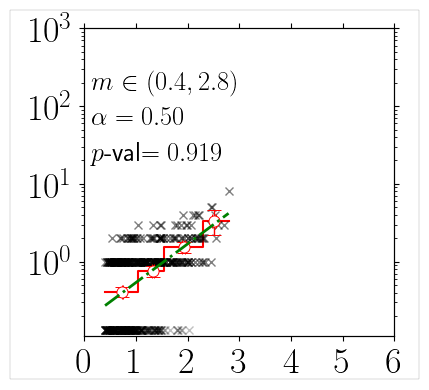

In [60]:
#--- productivity relation

mpl.rcParams.update(mpl.rcParamsDefault)
warnings.filterwarnings('ignore') #--- get rid of warnings

rc('text', usetex=True)
font = {'size'   : 26}
matplotlib.rc('font', **font)

import numpy as np
import math
from astropy import stats
from scipy.stats import chi2

def AdjustBins(data,bins):
    hist, xedges=np.histogram(data, #--- histogram
                              bins=bins)
    tmp = [xedges[0]]
    for i,j in zip(xedges[1:],hist): #--- expand bins 
        if j < 2:
            continue
        tmp.append(i)
    tmp.append(xedges[-1])
#    if hist[-1] < 2:
#        tmp.pop(-2)
    return tmp 

def GetEvenQuantiles(mlist, nn):
    N=len(mlist)
    hist, edges = np.histogram(mlist,bins=1024*10,density=None)
    assert np.sum(hist) == N
#     plt.plot(edges[:-1],np.cumsum(hist))
#     plt.show()

    Quantiles = np.concatenate([(1.0*np.arange(nn)/nn)[1:],np.array([1])])
#    print Quantiles
    m_q=[np.min(mlist)-1e-6]
    for q in Quantiles:
        m_q+=[edges[:-1][np.cumsum(hist)<=q*N][-1]]
#    print len(mlist[mlist<m_q[1]]),N/2

    return m_q
    
def GetPval( m_mean, N_as, err_N, func, popt ):
    x = m_mean
    y = N_as
    ye = err_N
    #--- goodness of fit
    n=len(x)
    m=2 #--- number of coefficients
    xsq = np.sum(((y-func(x,*popt))/ye)**2)
    pval=1-chi2.cdf(xsq,n-m)
    return pval


def PointWiseVariance( m_mean, N_as):

    n = len( m_mean )
    p = 1
    y = np.log10(N_as)
    x = m_mean

    #--- estimate beta
    X = np.c_[x,np.ones( n )]
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
    
    #--- estimate sigma
    def func( x, beta0, beta1 ):
        return beta0 * x + beta1
    
    y_hat = func( x, *beta ) #--- estimated output
    sigma_sq = np.sum( ( y - y_hat ) ** 2 ) / ( n - p - 1 ) #--- variance
    
    var_beta = np.linalg.inv(np.matmul(X.T,X)) * sigma_sq #--- uncertainties in beta
    
    var_y = np.matmul( np.matmul( X, var_beta ), X.T ) #--- pointwise
        
    y_up = y_hat + 2 * np.diag(var_y) ** 0.5 #--- std-error bands
    y_lo = y_hat - 2 * np.diag(var_y) ** 0.5

    return y_lo, y_up



def ProdRelation( nij_trig, swarm_lohi, **kwargs ):
#    print kwargs
    #--- remove pairs with r > cs.t
    df_trig = nij_trig.copy()
    
    #--- parents' magnitudes
    m_list = GetParentsMagnitudes( swarm_lohi, df_trig )
    
    #--- number of daughters for each mother
    df_nn = df_trig.groupby(by='Parent_id').count()['Event_id']
    
    
    #--- include daughters with zero children
    list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
    df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
#    print swarm_lohi['magnitude'].loc[df_zeros.index]
#    print df_zeros

    #--- parents' magnitudes including those with zero child
    mm = swarm_lohi['magnitude'].loc[df_zeros.index].tolist() + \
    swarm_lohi['magnitude'].loc[df_nn.index].tolist() #swarm_lohi[swarm_lohi['magnitude']>=mc]['magnitude']
    mm = np.array(mm)
#    mm=list(set(mm))
    mm.sort()
    mlist_with_zero=np.array(mm)
    
    #--- choose m0<m<m1
    dm = 0.1
    m_min = min(mlist_with_zero)-1.0e-6 #0.5*dm
    m_max = max(mlist_with_zero)+1.0e-6 #0.5*dm
    m_lo = kwargs['mlo'] if 'mlo' in kwargs  else m_min
    m_hi = kwargs['mhi'] if 'mhi' in kwargs  else m_max
    n = int( ( m_max - m_min ) / dm )
    m = list(np.linspace(m_min,m_max,n))
    #
    Mlist = m=np.histogram_bin_edges(mlist_with_zero, bins='auto')
    if 'NON_UNIFRM' in kwargs and kwargs['NON_UNIFRM']:
        Mlist = m = stats.bayesian_blocks(mlist_with_zero)
#    dxx, m = stats.knuth_bin_width(mlist_with_zero, return_bins=True)
                #
    if 'QUANT' in kwargs and kwargs['QUANT']:
        Mlist = m = GetEvenQuantiles(mlist_with_zero, n)
    #
    if 'ADJ_BIN' in kwargs and kwargs[ 'ADJ_BIN' ]:
        m=AdjustBins(mlist_with_zero,m)#[:-1] 
    if 'MBINS' in kwargs and kwargs[ 'MBINS' ]:
        m = kwargs[ 'MBINS' ]
    Mlist=m
#    print len(m)
    #--- choose mag. range based on evenly dist. q
#    print m, np.max(mlist_with_zero)
    
    m_mean=np.array(np.zeros(len(m) - 1))
    m_err=np.array(np.zeros(len(m) - 1))
    N_as = np.array(np.zeros(len(m) - 1))
    err_N = np.array(np.zeros(len(m) - 1))
    for i in xrange( len(m) - 1 ):
        try:
            m0 = m[ i ] - 1.0e-6
            m1 = m[ i + 1 ] + 1.0e-6

            df, m_mean[ i ], m_err[i] = GetPairsWithSpecifiedParentMag((m0,m1),
                                                             swarm_lohi,df_trig) #--- get parent with m0<m<m1
            df.reset_index( inplace = True, drop = True )
            
            #--- number of daughters for each mother
            df_n = df.groupby(by='Parent_id').count()['Event_id']
        
            #--- include daughters with zero children
            list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
            subset = swarm_lohi.loc[list_of_zero_afs]
            list_of_zero_afs = subset[(subset['magnitude'] >= m0) & (subset['magnitude'] <= m1)].index    
            df_zeross = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
            
            N_as[ i ] = 1.0*(df_n.sum()+ df_zeross.sum())/(len(df_n)+len(df_zeross))
            sigmaa = np.std(np.array(df_n.to_list()+df_zeross.to_list()))
            err_N[ i ] = 2*sigmaa / (len(df_n)+len(df_zeross))**0.5 #(N_as[ i ]/(len(df_n)+len(df_zeross)))**0.5 #--- poisson
#            err_N[ i ] = (N_as[ i ]/(len(df_n)+len(df_zeross)))**0.5 #--- poisson
    #        err_N[ i ]=np.std(df_n.tolist()+df_zeros.tolist())/(len(df_n)+len(df_zeros))**0.5
#            print len(df_n)+len(df_zeross)
#            display(df_n.head())
        except:
            print traceback.print_exc()
            continue
    LABELS = kwargs['LABELS'] if 'LABELS' in kwargs else ''

    #--- scattered plot
    fig = plt.figure(figsize=(4,4),frameon=True)
    ax = fig.add_subplot(111)
    title = kwargs['title'] if 'title' in kwargs else ''
    if LABELS:
        ax.set_title(title,fontsize='xx-small')
    ax.set_xlim(np.floor(m_min),np.ceil(swarm_lohi['magnitude'].max()))
    ax.set_ylim(0.11,10**np.ceil(np.log10(df_nn.max())))
    ax.plot( swarm_lohi['magnitude'].loc[df_nn.index],
               df_nn,
              'x',color='black',alpha=0.5,zorder=2,label='')
    ax.plot(m, np.append(N_as,N_as[-1]), linestyle='-', drawstyle='steps-post',color='red',zorder=1)
    ax.legend(fontsize=0)
#    
    ax2=ax.twinx()
    ax2.set_yscale('linear')
    ax2.set_xlim(np.floor(m_min),np.ceil(swarm_lohi['magnitude'].max()))
    ax2.set_ylim(-.02,1)
    ax2.plot( swarm_lohi['magnitude'].loc[df_zeros.index],
             df_zeros,
              'x',color='black',alpha=0.25)
    ax2.tick_params(labelright=False,labelleft=False,left=False, right=False)
#           
    ax.set_yscale('log')
    #plt.xlabel('$m$')
    #plt.ylabel(r'$N_{as}$')
    ax.tick_params(axis='y',left=True, right=True,which='both')
    ax.tick_params(axis='x',bottom=True, top=True,which='both')
    
    #--- plot binned data
    ax.errorbar(m_mean,N_as,
                yerr=err_N,xerr=m_err,
                markerfacecolor='white',
                fmt='o', markersize=8,color='red',markeredgewidth=0.7,
                linewidth=.5,
                barsabove=None,capsize=5,capthick=1,elinewidth=1,
               zorder=3)

    ax.set_xlim(0,6)
    ax.set_ylim(.11,1e3)
 
    #--- add major xticks
    xmin=np.ceil(ax.axis()[0])
    xmax=np.floor(ax.axis()[1])
    nbin = xmax - xmin
    ax.set_xticks(np.linspace(xmin,xmax,int(nbin)+1))
    
    DrawFrame(ax, (0.24,0.08),(0.14,0.06),0.1,LOG_Y=True)
    
    
    #--- least-squares fits
    def func(x,alpha,c):
        return c*10**(alpha*x)
    #
    #--- filter
    m_mean =  m_mean[N_as != 0.0]
    err_N  = err_N[N_as != 0.0]
    N_as = N_as[N_as != 0.0]
    #
    indices = np.all([m_mean >= m_lo,m_mean < m_hi],axis=0)
    m_mean =  m_mean[indices]
    err_N  = err_N[indices]
    N_as = N_as[indices]
    #
    err_log = err_N / N_as / np.log(10.0)
    popt, cov = np.polyfit(m_mean,np.log10(N_as), 1, cov=True, w=1.0 / err_log) #'unscaled')
    popt[1] = 10**(popt[1])
    alpha_p = popt[0]
    
    #--- pvalue
    pval_lin = GetPval( m_mean, N_as, err_N, func, popt )
    
    #--- plot the fit
#    ax.plot(m_mean,func(m_mean,*popt),'-.g',zorder=3,label='linear$N\propto 10^{%3.2f m},p=%3.2e$'%(popt[0],pval_lin))
    #print 'alpha=%s'%popt[0]
    #print pconv**0.5
    
    #     #--- point-wise variance
#     # y_lo, y_up = PointWiseVariance( m_mean, N_as)
#     # #--- plot
#     # ax.fill_between(m_mean,
#     #                     10**y_up,
#     #                     10**y_lo,
#     #                     color='yellow',zorder=2)
    
    #--- non-linear fits
    from scipy import optimize
    def func( x, alpha, K ):
        return K*10**(alpha*x)
    xdata = m_mean
    ydata = N_as
    popt, pcov = optimize.curve_fit(func, xdata, ydata, sigma=err_N)
    print 'covariance',pcov
    #--- pvalue
    pval_nonlin = GetPval( m_mean, N_as, err_N, func, popt )
    
    
    #--- plot the fit
    EXTEND = kwargs['EXTEND'] if 'EXTEND' in kwargs else ''
    mrr = np.array( [np.min(mlist_with_zero), np.max(mlist_with_zero)] )
    lw = 2.0
    if EXTEND:
        string = r'$\newline m\in(%2.1f,%2.1f)$'%(m_lo,m_hi)\
                +r'$\newline\newline \alpha=%3.2f$'%popt[0]+' '\
                +r'$\newline\newline p$'+r'-val'+'$=%4.3f$'%(pval_nonlin)

                
        ax.plot(mrr,func(mrr,*popt),
                '-.g',zorder=4, linewidth=lw,
                label=string)
    else:
        ax.plot(m_mean,func(m_mean,*popt),
                '-.g',zorder=4, linewidth=lw,
                label=string)
    if LABELS:
        ax.legend(fontsize=19,frameon=False,bbox_to_anchor=(0.57, 0.94),handlelength=0)

    
    #--- save
    dpi = kwargs['dpi'] if 'dpi' in kwargs else 150
    if 'save' in kwargs:
        plt.savefig('%s.png'%kwargs['save'],dpi=dpi,bbox_inches='tight')
    
    mpl.rcParams.update(mpl.rcParamsDefault)
    warnings.filterwarnings('ignore') #--- get rid of warnings
    
    rc('text', usetex=True)
    font = {'size'   : 20}
    matplotlib.rc('font', **font)

    plt.show()
    return pval_lin, pval_nonlin, m


#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)

path_save = '/Users/Home/Dropbox/Documents/papers/microSeismicityOklahoma/source/figs/'
pval_lin, pval_nonlin, mbins  = ProdRelation( nij_trig, swarm_lohi, 
#                                      mlo=mc-0.05, mhi=3.5+0.05,
#                                      MBINS = [0.3396577148437485, 0.4396577148437486, 0.5396577148437487, 0.6396577148437488, 0.7396577148437489, 0.839657714843749, 0.939657714843749, 1.0396577148437491, 1.1396577148437492, 1.2396577148437493, 1.3396577148437494, 1.4396577148437495, 1.5396577148437496, 1.6396577148437497, 1.7396577148437498, 1.8396577148437498, 1.93965771484375, 2.03965771484375, 2.13965771484375, 2.23965771484375, 2.3396577148437503, 2.9],
                                      NON_UNIFRM = True, QUANT = False, ADJ_BIN = False,
                                      LABELS = True, EXTEND = True,
                                      title='', #'Fillmore',
                                      save = '%s/Fillmore_prod'%path_save, dpi = 150) #67)

#print mlist
#np.save('%s/alpha'%DIR_OUTPT_figs,alpha_p)


In [ ]:

def GetMlist( nij_trig, swarm_lohi ):
    #--- remove pairs with r > cs.t
    df_trig = nij_trig.copy()
    
    #--- parents' magnitudes
    m_list = GetParentsMagnitudes( swarm_lohi, df_trig )
    
    #--- number of daughters for each mother
    df_nn = df_trig.groupby(by='Parent_id').count()['Event_id']
    
    
    #--- include daughters with zero children
    list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
    df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
#    print swarm_lohi['magnitude'].loc[df_zeros.index]
#    print df_zeros

    #--- parents' magnitudes including those with zero child
    mm = swarm_lohi['magnitude'].loc[df_zeros.index].tolist() + \
    swarm_lohi['magnitude'].loc[df_nn.index].tolist() #swarm_lohi[swarm_lohi['magnitude']>=mc]['magnitude']
    mm = np.array(mm)
#    mm=list(set(mm))
    mm.sort()
    mlist_with_zero=np.array(mm)
    return mlist_with_zero
   

def GetMhi10( mlist ):
    nmax = 10
    N=len(mlist)
    hist, edges = np.histogram(mlist,bins=1024*10,density=None)
    assert np.sum(hist) == N
#     plt.plot(edges,N-np.append(np.cumsum(hist),[np.cumsum(hist)[-1]]),drawstyle='steps-post')
#     plt.plot([2.939517578125,2.939517578125],[0,10],'-')
#     plt.plot([2.93984375,2.93984375],[0,10],'-')

#     plt.ylim(0,11)
#     plt.xlim(2.75,4)
#     plt.show()

#    Quantiles = np.concatenate([(1.0*np.arange(nn)/nn)[1:],np.array([1])])
    q = 1.0 - 1.0 * nmax / N

#    print Quantiles
#    m_q=[np.min(mlist)-1e-6]
#    for q in Quantiles:
#    print N - np.cumsum(hist)
    return edges[:-1][np.cumsum(hist)<=q*N][-1], edges[1:][np.cumsum(hist)<=q*N][-1]

mlist_with_zero = GetMlist( nij_trig, swarm_lohi )
mhi = np.mean( GetMhi10( mlist_with_zero ) )
#print len(mlist_with_zero[mlist_with_zero>mhi])
m_max = mbins[-1]
a = np.append(np.array([m_max]),np.arange(mhi,mc-0.1,-0.1))
a.sort()
print list(a)

### multiple realizations

In [ ]:
from IPython.display import Image

alpha_arr=[]
for irun in xrange(16):
    path = 'runFillmore/Run%s'%irun
    a=np.load('%s/alpha.npy'%path)
    alpha_arr.append(a.item())
    #--- load image
    display(Image(filename='%s/prod.png'%path))
df=pd.DataFrame({'mean':[np.mean(alpha_arr)],'std_dev':np.std(alpha_arr),
                        'std_err':[np.std(alpha_arr)/len(alpha_arr)**.5]},
                          index=[r'$\alpha$'])
display(df)
df['mean']+2*df['std_dev'],df['mean']-2*df['std_dev']                       
                       

In [ ]:
#--- number distributions


#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)



#--- remove pairs with r > cs.t
#cs = 3 * (24*3600) #--- km per day
df_trig = nij_trig.copy()

#--- parents' magnitudes
m_list = GetParentsMagnitudes( swarm_lohi, df_trig )

#--- number of daughters for each mother
df_nn = df_trig.groupby(by='Parent_id').count()['Event_id']


#--- include daughters with zero children
list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)

#--- scattered plot
fig = plt.figure(figsize=(4,4),frameon=True)
ax = fig.add_subplot(111)
ax.plot( swarm_lohi['magnitude'].loc[df_nn.index],
           df_nn,
          'x',color='gray',alpha=1.0)
ax.plot( swarm_lohi['magnitude'].loc[df_zeros.index],
         df_zeros,
          'x',color='gray')
ax.set_yscale('log')


#--- parents' magnitudes
m_list = GetParentsMagnitudes( swarm_lohi, df_trig )

#--- number of daughters for each mother
df_nn = df_trig.groupby(by='Parent_id').count()['Event_id']


#--- include daughters with zero children
list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)


#--- scattered plot
m_min = min(m_list)-1e-6 #0.05 #-1.0e-6
m_max = max(m_list)+1.0e-6 #3.299999333333333 #max(m_list)+0.05 #+1.0e-6 #--- exclude the largest event

#--- choose m0<m<m1
dm = 0.4
n = int( ( m_max - m_min ) / dm )
m = [m_min,m_max] #list(np.linspace(m_min,m_max,n+1))
Mlist=m

m_mean=np.array(np.zeros(len(m) - 1))
m_err=np.array(np.zeros(len(m) - 1))
N_as = np.array(np.zeros(len(m) - 1))
err_N = np.array(np.zeros(len(m) - 1))
for i in xrange(len(m) - 1 ):
    try:
        m0 = m[ i ]
        m1 = m[ i + 1 ]
        df, m_mean[ i ], m_err[i] = GetPairsWithSpecifiedParentMag((m0,m1),
                                                         swarm_lohi,df_trig) #--- get parent with m0<m<m1
        df.reset_index( inplace = True, drop = True )
        
        #--- number of daughters for each mother
        df_n = df.groupby(by='Parent_id').count()['Event_id']
    
        #--- include daughters with zero children
        list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
        subset = swarm_lohi.loc[list_of_zero_afs]
        list_of_zero_afs = subset[(subset['magnitude'] >= m0) & (subset['magnitude'] <= m1)].index    
        df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
        
#        fig.hist(df_n)
#        if m1 > 3.3:
#            continue
        fig = plt.figure(figsize=(4,4),frameon=True)
        ax = fig.add_subplot(111)
        junk = ax.hist( df_n.tolist()+df_zeros.tolist(),
                bins=1024,#int((xmax-xmin)/dx),
               label='%3.2f-%3.2f'%(m0,m1),color='silver') #--- histogram
        print '#=',junk[0][junk[0]!=0]
        print 'N=',junk[1][:-1][junk[0]!=0]
        ax.set_xlabel('$N_{as}$')
        ax.set_ylabel('number')
#        ax.set_ylim(-100,ax.axis[3])
        fig.legend()
        #--- mean
#        print [m0,m1],list_of_zero_afs
#        pdb.set_trace()
        print 'n_ms=',len(df_n)#+len(df_zeros)
        print 'n_ms(0)=',len(df_zeros)
        N_as[ i ] = 1.0*(df_n.sum()+ df_zeros.sum())/(len(df_n)+len(df_zeros))
        err_N[ i ] = (N_as[ i ]/(len(df_n)+len(df_zeros)))**0.5 #--- poisson
#        err_N[ i ]=np.std(df_n.tolist()+df_zeros.tolist())/(len(df_n)+len(df_zeros))**0.5
    except:
        continue
plt.show()
    

In [ ]:
#--- choose bins for rho and lambda

import traceback

#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)



#--- remove pairs with r > cs.t
#cs = 3 * (24*3600) #--- km per day
df_trig = nij_trig.copy()

#--- parents' magnitudes
m_list = GetParentsMagnitudes( swarm_lohi, df_trig )

#--- number of daughters for each mother
df_nn = df_trig.groupby(by='Parent_id').count()['Event_id']


#--- include daughters with zero children
list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)


#--- scattered plot
fig = plt.figure(figsize=(4,4),frameon=True)
ax = fig.add_subplot(111)
#ax.set_xlim(mc,swarm_lohi['magnitude'].max()+0.5)
m_min = min(m_list)-1.0e-6
m_max = max(m_list)+1.0e-6 #--- exclude the largest event
#ax.set_xlim(m_min,np.ceil(m_max))
ax.set_ylim(0.11,100)
ax.plot( swarm_lohi['magnitude'].loc[df_nn.index],
           df_nn,
          'o',color='black',alpha=.1)
ax.plot( swarm_lohi['magnitude'].loc[df_zeros.index],
         df_zeros,
          'x',color='gray')

plt.yscale('log')
#plt.xlabel('$m$')
#plt.ylabel(r'$N_{as}$')

#--- choose m0<m<m1
dm = 0.4#0.35 #0.5
n = int( (m_max - m_min ) / dm )
m = list(np.linspace(m_min,m_max,n))
#m=AdjustBins(m_list,m)
# m=[2.7999989999999997,
#  3.133332555555555,
#  3.466666111111111,
#  3.7999996666666664,
#  4.133333222222222,
#  4.466666777777778,
#  4.800000333333333,
#  5.800001]
#m+=[6.41,7.1-0.01,7.1+0.01]
Mlist=m

m_mean=np.array(np.zeros(len(m) - 1))
m_err=np.array(np.zeros(len(m) - 1))
N_as = np.array(np.zeros(len(m) - 1))
err_N = np.array(np.zeros(len(m) - 1))
for i in xrange( len(m) - 1 ):
    try:
        m0 = m[ i ]
        m1 = m[ i + 1 ]
        df, m_mean[ i ], m_err[i] = GetPairsWithSpecifiedParentMag((m0,m1),
                                                         swarm_lohi,df_trig) #--- get parent with m0<m<m1
        df.reset_index( inplace = True, drop = True )
#        pdb.set_trace()
        #--- number of daughters for each mother
        df_n = df.groupby(by='Parent_id').count()['Event_id']
    
        #--- include daughters with zero children
        list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
        subset = swarm_lohi.loc[list_of_zero_afs]
        list_of_zero_afs = subset[(subset['magnitude'] >= m0) & (subset['magnitude'] <= m1)].index    
        df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
        #--- mean
#        print [m0,m1],list_of_zero_afs
#        pdb.set_trace()
        
        N_as[ i ] = 1.0*(df_n.sum()+ df_zeros.sum())/(len(df_n)+len(df_zeros))
        err_N[ i ] = (N_as[ i ]/(len(df_n)+len(df_zeros)))**0.5 #--- poisson
#        err_N[ i ]=np.std(df_n.tolist()+df_zeros.tolist())/(len(df_n)+len(df_zeros))**0.5
    except:
#        traceback.print_exc()
        continue
    
#ax.plot(m, np.append(N_as,N_as[-1]), linestyle='-', drawstyle='steps-post',color='red')
ax.errorbar(m_mean,N_as,
            yerr=err_N,xerr=m_err,
            markerfacecolor='white',
            fmt='o', markersize=8,color='red',markeredgewidth=0.7,
            linewidth=.5,
            barsabove=None,capsize=5,capthick=1,elinewidth=1)


#--- add major xticks
xmin=np.ceil(ax.axis()[0])
xmax=np.floor(ax.axis()[1])
nbin = xmax - xmin
ax.set_xticks(np.linspace(xmin,xmax,int(nbin)+1))

DrawFrame(ax, (0.15,0.08),(0.14,0.06),0.1,LOG_Y=True)

try:
    from scipy.optimize import curve_fit
    def func(x,c,alpha):
        return c*10**(alpha*x)
    popt, pconv = curve_fit(func,m_mean[m_mean>=mc],N_as[m_mean>=mc])
    
    mm = swarm_lohi['magnitude'].loc[df_zeros.index].tolist() + \
         swarm_lohi['magnitude'].loc[df_nn.index].tolist() #swarm_lohi[swarm_lohi['magnitude']>=mc]['magnitude']
    mm = np.array(mm)
    mm=list(set(mm))
    mm.sort()
    mm=np.array(mm)
    ax.plot(mm,func(mm,*popt),'-.g')
    print popt
    print pconv**0.5
except:
    pass

##plt.savefig('%s/prod.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')


fig = plt.figure(figsize=(4,4),frameon=True)
ax = fig.add_subplot(111)
ax.plot(m, np.append(N_as,N_as[-1]), linestyle='-', drawstyle='steps-post',color='red')
ax.errorbar(m_mean,N_as,
            yerr=err_N,xerr=m_err,
            markerfacecolor='white',
            fmt='o', markersize=8,color='red',markeredgewidth=0.7,
            linewidth=.5,
            barsabove=None,capsize=5,capthick=1,elinewidth=1)
#ax.set_xlim(m_min,np.ceil(m_max))
ax.set_ylim(0.11,100)
ax.set_yscale('log')
ax.set_xticks(np.linspace(xmin,xmax,int(nbin)+1))

plt.show()

In [ ]:
#--- density plots: rho(r)
#--- split based on the mainshock's magnitude

import numpy as np
import math

#def AdjustBins(data,bins):
#    hist, xedges=np.histogram(data, #--- histogram
#                              bins=bins)
#    tmp = [xedges[0]]
#    for i,j in zip(xedges[1:],hist): #--- expand bins 
#        if j < 2:
#            continue
#        tmp.append(i)
#    tmp.append(xedges[-1])
#    if hist[-1] < 2:
#        tmp.pop(-2)
#    return tmp 

#def GetPairsWithSpecifiedParentMag((m0,m1),catalog,df):
#    df_parents = df.groupby(by='Parent_id').groups #--- parent events
#    ds = catalog['magnitude'].loc[df_parents.keys()] #--- mag. of parent events
#    ds_m=ds[(m0 <= ds) & (ds < m1)] #--- parent events with m0<m<m1
#    df_m=df[pd.DataFrame([df['Parent_id'] ==k for k in ds_m.index]).any()] #--- data frame
#    return df_m, np.mean( ds_m )

#def AddDist( df_trig, df_complete ):
#    x=df_complete.loc[ df_trig['Event_id'] ]['r(m)'] 
#    y=df_complete.loc[ df_trig['Parent_id'] ]['r(m)']
#    df_trig['R'] = pd.Series(numpy.linalg.norm(x-y)))
#    assert len ( df_trig[ df_trig['R'] == 0.0 ] ) == 0, '%s'%display( df_trig[ df_trig['R'] == 0.0 ] )

def AddTime( df_trig, df_complete ):
    prefact = 1.0 / ( 24.0 * 60 * 60 ) #--- daily
    x=df_complete.loc[ df_trig['Event_id'] ]
    y=df_complete.loc[ df_trig['Parent_id'] ]
    x.reset_index(inplace=True)
    y.reset_index(inplace=True)
    df_trig['T'] = x['date']-y['date']
    df_trig['T'] = df_trig['T'].apply(lambda x: x.total_seconds() * prefact)

def RemovePair( df, cs ):
    return df [ df[ 'R' ] <= df[ 'T' ] * cs ]

#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)

##--- parents' magnitudes
#df_trig = nij_trig.copy()
#m_list = GetParentsMagnitudes( swarm_lohi, df_trig )
#m_min = min(m_list)-1.0e-6
#m_max = max(m_list)+1.0e-6 #--- exclude the largest event
#
##--- choose m0<m<m1
#dm = 0.3
#n = int( ( m_max - m_min ) / dm )
#m = list(np.linspace(m_min,m_max,n))
#m=AdjustBins(m_list,m)
Mlist=m

#--- choose m0<m<m1
X={}
rho_dict={}
m_range={}
Err={}
m_mean={}
for i in xrange( len(m) - 1 ):
    try:
        m0 = m[ i ]
        m1 = m[ i + 1 ]
        
        df_trig, m_mean[ i ],junk = GetPairsWithSpecifiedParentMag((m0,m1),swarm_lohi,nij_trig) #--- get parent with m0<m<m1
        df_trig.reset_index( inplace = True, drop = True )
        
        #--- add distance & time column
    #    AddDist( df_trig, df_complete )
    #    df_trig['R'] = rmat[df_trig['Parent_id'],df_trig['Event_id']]
    #    df_trig['T'] = tmat[df_trig['Parent_id'],df_trig['Event_id']]
    #    assert len ( df_trig[ df_trig['R'] == 0.0 ] ) == 0, '%s'%display( df_trig[ df_trig['R'] == 0.0 ] )
    #    AddTime( df_trig, df_complete )
        
        #--- remove pairs with r > cs.t
    #    cs = 3 * (24*3600) #--- km per day
    #    df_trig = RemovePair( df_trig, cs )
    
        #--- rho plots
        n_decades = int( math.ceil( log(df_trig['R'].max()/df_trig['R'].min(),10) ) )
        nbin_per_decade = 6#kam4
        nbins =  nbin_per_decade * n_decades
        
        bins = np.logspace(log(df_trig['R'].min(),10)-1.e-10,
                                                  log(df_trig['R'].max(),10)+1.e-10,nbins)
        bins = AdjustBins(df_trig['R'],bins)
    
        rho, xedges=np.histogram(df_trig['R'], 
                                 density=True,
                                 bins=bins)
        hist, xedges=np.histogram(df_trig['R'],
                                  bins=bins)
        x_bins, junk=np.histogram(df_trig['R'], #--- histogram
                                  bins=bins,
                                 weights = df_trig['R'])
    
        #--- rm empty bins
        x_bins = x_bins[ hist != 0 ]
        rho = rho[ hist != 0 ]
        hist = hist[ hist != 0 ]
        
        #--- poisson err 
        err = rho/np.sqrt(hist)
        x_bins /= hist
                
        #--- scattered plot
        fig=plt.figure(figsize=(8,4))
        ax=fig.add_subplot(1,2,1)
        ax.set_title('$%2.1f<m<%2.1f$'%(m0,m1))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('$t$')
        ax.set_ylabel('$r$')
        ax.set_xlim(1e-5,10)
        ax.set_ylim(1e-4,1e2)
        ax.scatter(df_trig['T'],df_trig['R'],alpha=0.1)
        
        #--- discretization effects
#         dt_min=df_trig['T'].min()
#         dt_max=df_trig['T'].max()
#         dr_min=df_trig['R'].min()
#         dr_max=df_trig['R'].max()
        
#         ax.plot([dt_min,dt_min],[dr_min,dr_max],
#                  '-',color='blue')
#         ax.plot([dt_max,dt_max],[dr_min,dr_max],
#                  '-',color='blue')
#         ax.plot([dt_min,dt_max],[dr_min,dr_min],
#                  '-',color='blue')
#         ax.plot([dt_min,dt_max],[dr_max,dr_max],
#                  '-',color='blue')
        
#         ax.set_ylim(dr_min/2,dr_max*2)
#         ax.plot([dt_min,dt_max],[dt_min*cs,dt_max*cs],
#                  '-',color='red')
        
        #--- rho
        ax=fig.add_subplot(1,2,2)
        ax.set_xlim(1e-4,1e2)
        ax.set_ylim(1e-5,1e1)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('$r$')
        ax.set_ylabel('$P(r)$')
        ax.errorbar(x_bins,rho, yerr=err)
            
        X[i] = x_bins[:]
        rho_dict[i]=rho[:]
        m_range[i]=np.array([m0,m1])
        Err[i]=err[:]
        #plt.savefig('%s/rho_r.%s.png'%(DIR_OUTPT_figs,i),dpi=50,bbox_inches='tight')
    except:
        continue

plt.show()

### rupture length

In [ ]:
#--- density plots: rho(r)
#--- split based on the mainshock's magnitude

import numpy as np
import math


#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)


XX={}
rho_dictt={}
Errr={}
m_meann={}
r_rupp = {}

groups_dic=nij_trig.groupby(by='Parent_id').groups
for parent_id in groups_dic: 
#    print parent_id
    df_trig = nij_trig.loc[groups_dic[parent_id]]
    df_trig.reset_index( inplace = True, drop = True )
#    display(df_trig )
    if len(df_trig) < 2:
        continue
    #--- rho plots
    n_decades = int( math.ceil( log(df_trig['R'].max()/df_trig['R'].min(),10) ) )
    nbin_per_decade = 4
    nbins =  nbin_per_decade * n_decades
    
    bins = np.logspace(log(df_trig['R'].min(),10)-1.e-10,
                                              log(df_trig['R'].max(),10)+1.e-10,nbins)
#    bins = AdjustBins(df_trig['R'],bins)

    rho, xedges=np.histogram(df_trig['R'], 
                             density=True,
                             bins=bins)
    hist, xedges=np.histogram(df_trig['R'],
                              bins=bins)
    x_bins, junk=np.histogram(df_trig['R'], #--- histogram
                              bins=bins,
                             weights = df_trig['R'])

    #--- rm empty bins
    x_bins = x_bins[ hist != 0 ]
    rho = rho[ hist != 0 ]
    hist = hist[ hist != 0 ]
    
    #--- poisson err 
    err = rho/np.sqrt(hist)
    x_bins /= hist
            

    i = parent_id    
    XX[i] = x_bins[:]
    rho_dictt[i]=rho[:]
    m_meann[i]=swarm_lohi['magnitude'].loc[i]
    Errr[i]=err[:]
    r_rupp[i]=np.std(df_trig['R'])

m_meann=pd.Series(m_meann)
r_rupp=pd.Series(r_rupp)

#--- fit
def func(x,alpha,c):
    return c*10**(alpha*x)

popt = np.polyfit(m_meann,np.log10(r_rupp), 1)
popt[1] = 10**(popt[1])



#--- plot
fig = plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$m$')
ax.set_ylabel('$r_{rup}$[km]')
#ax.set_xlim(2,6)
#ax.set_ylim(1e-4,1e2)
ax.scatter(m_meann,r_rupp,alpha=0.2)


ax.plot(m_meann,func(m_meann,*popt),'-.r',zorder=3,
                     label='$r_{rup}\propto 10^{%3.2f m},r_c=%3.2e$'%(popt[0],popt[1]))
ax.legend(fontsize='xx-small',frameon=False)
#ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')
#print 'alpha=%s'%popt[0]
sigma=popt[0]
rc=popt[1] #10**np.ceil(np.log10(popt[1]))*2
####plt.savefig('%s/rupture_mag.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)
plt.show()


### $r_{rup}$ by fitting

In [ ]:
from scipy.optimize import curve_fit

#def func(x,pref, xmean,sigma):
#    return pref * np.exp(-((x-xmean)/sigma)**2)

def func(x,a,b1,b2,rc):
    return a*x**b1/(1.0+(x/rc)**b2)

#def func2(x,c,alpha):
#    return c*10**(alpha*x)

#--- fit
def func2(x,alpha,c):
    return c*10**(alpha*x)

colors = ['black','red','green','blue','cyan','brown','violet','magenta','orange','yellow']


fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(121)
#ax.axis([2e-3,2e-3*1e1/1e-3,1e-3,1e1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$P(r)$')


r_peak=[]
mm_mean=[]
p0 = (1.0,Df-1,2.0,rc)
for key, col in zip(X,colors):
    try:
        if key > 6:
            continue
#        print np.mean(X[key])
        ax.errorbar(X[key],rho_dict[key], 
                     yerr=Err[key],
                    linestyle='None', color=col,
                     fmt='-o', markersize=8
                    )            
        popt, pcov = curve_fit(func, X[key], rho_dict[key],
                               sigma=Err[key], 
#                               bounds=((0.0,0.0,0.0), (np.inf,np.inf,np.inf)),
                               p0=p0
                              )
        mm_mean+=[m_mean[key]]
        p0 = popt[:]
        (a,b1,b2,rc)=popt
        r_peak += [rc]
        ax.plot(X[key], func(X[key], *popt),'-',color=col)#,label='fit: r=%3.2f' % (popt[1]))
        ax.legend()
    except:
        traceback.print_exc()
#        print key
        continue
try:
    ax=fig.add_subplot(122)
    ax.set_yscale('log')
    ax.set_xlabel('$m$')
    ax.set_ylabel('$r_{rup}$')
    ax.plot(mm_mean,r_peak,'o')
    ylo=10**np.floor(np.log10(np.min(r_peak)))
    yhi=10**np.ceil(np.log10(np.max(r_peak)))
    ax.set_ylim(ylo,yhi)
    #
    popt = np.polyfit( mm_mean,np.log10(r_peak),1 )
    sigma=popt[0]
    rc=10**popt[1] #10**np.ceil(np.log10(popt[1]))
    rc0=rc
    #
    ax.plot(mm_mean,func2( np.array(mm_mean),sigma,rc),'--r',
            label='$r_{rup}\propto 10^{%3.2f m},r_c=%2.1e$'%(sigma,rc))
    ax.legend(fontsize='xx-small',frameon=False)
    
    fig.tight_layout()
except:
    traceback.print_exc()
    pass
plt.show()
fig.savefig('%s/r_rupt.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
np.save('%s/sigma'%DIR_OUTPT_figs,sigma)

### different realizations

In [ ]:
alpha_arr=[]
for irun in xrange(16):
    path = 'runFillmore/Run%s'%irun
    a=np.load('%s/sigma.npy'%path)
    alpha_arr.append(a.item())
    #--- load image
    display(Image(filename='%s/r_rupt.png'%path))
df=pd.DataFrame({'mean':[np.mean(alpha_arr)], 'std_dev':np.std(alpha_arr),
                        'std_err':[np.std(alpha_arr)/len(alpha_arr)**.5]},
             index=[r'$\sigma$'])
display(df)
df['mean']+2*df['std_dev'],df['mean']-2*df['std_dev']
                    
                       

In [ ]:
#--- density plots: rho(r) 2nd


plt.figure(figsize=(15,5))

#--- plot rho
plt.subplot(1,3,1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$')
plt.ylabel(r'$P(r)$')
plt.xlim(1e-3,1e2)
plt.ylim(1e-4,1e1)
for key in X:
#    if key < 3:
#        continue
    plt.errorbar(X[key],rho_dict[key],
                 yerr=Err[key],
                 fmt='-o', markersize=8
                )

#--- rescaled in x and y
plt.subplot(1,3,2)
#sigma=sigma #0.5
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R=r/10^{%3.2f m}$'%sigma)
plt.ylabel(r'$P(R)=P(r)\times 10^{%3.2f m}$'%sigma)
plt.xlim(1e-5,1e0)
plt.ylim(1e-2,1e3)

xdata = []
ydata = []
y_err = []
for key in X:
#    if key < 3:
#        continue
    xdata += list(X[key]/10**(sigma*np.mean(m_range[key])))
    ydata += list(rho_dict[key]*10**(sigma*np.mean(m_range[key])))
    y_err += list(Err[key]*10**(sigma*m_mean[key]))
    plt.errorbar(X[key]/10**(sigma*m_mean[key]),
                 rho_dict[key]*10**(sigma*m_mean[key]),
                 yerr=Err[key]*10**(sigma*m_mean[key]),
                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 fmt='-o', markersize=8
                )
plt.legend(title='m',loc='upper right',bbox_to_anchor=(0.4, .6))

#--- rescaled by r^-\nu
nu = -2.9
plt.subplot(133)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R$')
plt.ylabel(r'$P(R)\times R^{%3.2f}$'%nu)
#plt.ylabel(r'$\lambda(t) \times t^p$')
plt.xlim(1e-4,1e0)
#plt.ylim(1e-6,1e-4)
KEYS=X.keys()
KEYS.sort()
for key, index in zip(KEYS,xrange(100)):
#    if key < 3:
#        continue
    x_new = X[key]/10**(sigma*m_mean[key])
    y_new = rho_dict[key]*10**(sigma*m_mean[key])
    y2_new = Err[key]*10**(sigma*m_mean[key])
    plt.errorbar(x_new,
                 y_new/x_new**nu,
                 yerr=y2_new/x_new**nu, 
                 fmt='-o', markersize=8
                )
    
    
plt.tight_layout()
###plt.savefig('%s/rho_r.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
plt.show()


### power-law fit

#### $\rho(r)\propto \frac{r^{\nu_1}}{1+(r/r_c)^{\nu_2}}$

In [ ]:
from scipy.stats import chi2

#--- fitting

from scipy.optimize import curve_fit

def func(x,a,b1,b2,rc):
    return a*x**b1/(1.0+(x/rc)**b2)

pval_max = 0.0
for sigmaa in np.linspace(0.2,0.5,16):
    #--- rescale
    x = []
    y = []
    ye = []
    for key in X:
        x += list(X[key]/10**(sigmaa*np.mean(m_range[key])))
        y += list(rho_dict[key]*10**(sigmaa*np.mean(m_range[key])))
        ye += list(Err[key]*10**(sigmaa*m_mean[key]))

    #--- initialize 
    x = np.array(x)
    y = np.array(y)
    ye=np.array(ye)
    #
    ss=zip(x,y,ye)
    ss.sort()
    x=[i[0]for i in ss]
    y=[i[1]for i in ss]
    ye = [i[2] for i in ss]

    #--- fit
    popt0, pcov = curve_fit(func, x, y, 
                       p0=(1.0,Df-1,2.0,rc0),sigma=ye) #, bounds=((0.0,0.0), (np.inf,10.0)))

    #--- goodness of fit
    n=len(x)
    m=4 #--- number of coefficients
    xsq = np.sum(((y-func(x,*popt0))/ye)**2)
    pval=1-chi2.cdf(xsq,n-m)

#    print pval
    if pval > pval_max:
        pval_max = pval
        xxdata = x[:]
        yydata = y[:]
        popt = popt0[:]
        sigma = sigmaa
        (a,b1,b2,rc)=popt0
        nu = -b2
        rho_pref = func(rc,a,b1,b2,rc)
    
#--- plot
fig = plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$r[km]$')
ax.set_ylabel(r'$\rho(r)$')
#ax.set_xlim(2,6)
#ax.set_ylim(1e-4,1e2)
ax.scatter(xxdata,yydata)


# #--- fit
ax.plot(xxdata,func(xxdata,*popt),
        '-.r',zorder=3,
        label=r'$\rho(r)\propto \frac{r^{%3.2f}}{1+(r/r_c)^{%3.2f}},r_c={%2.1e}$'%(b1,b2,rc))
ax.legend(fontsize='xx-small',frameon=False)
ax.set_title(r'$q=%d,df=%s,\sigma=%3.2f,p=%3.2e$'%(quantile*100,Df,sigma,pval_max),fontsize='xx-small')
#plt.savefig('%s/fit.png'%DIR_OUTPT_figs,dpi=150,bbox_inches='tight',transparent=True)
plt.show()
np.save('%s/nu'%DIR_OUTPT_figs,nu+b1)
np.save('%s/sigma_max'%DIR_OUTPT_figs,sigma)
np.save('%s/pval'%DIR_OUTPT_figs,pval_max)

In [ ]:
from scipy.stats import chi2

#--- fitting

from scipy.optimize import curve_fit

def func(x,a,b1,b2,rc):
    return a*x**b1/(1.0+(x/rc)**b2)

fig = plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p$')




pval_max = 0.0
for sigmaa in np.linspace(0.2,0.5,32):
    #--- rescale
    x = []
    y = []
    ye = []
    for key in X:
        x += list(X[key]/10**(sigmaa*np.mean(m_range[key])))
        y += list(rho_dict[key]*10**(sigmaa*np.mean(m_range[key])))
        ye += list(Err[key]*10**(sigmaa*m_mean[key]))

    #--- initialize 
    x = np.array(x)
    y = np.array(y)
    ye=np.array(ye)
    #
    ss=zip(x,y,ye)
    ss.sort()
    x=[i[0]for i in ss]
    y=[i[1]for i in ss]
    ye = [i[2] for i in ss]

    #--- fit
    popt0, pcov = curve_fit(func, x, y, 
                       p0=(1.0,Df-1,2.0,rc),sigma=ye) #, bounds=((0.0,0.0), (np.inf,10.0)))

    #--- goodness of fit
    n=len(x)
    m=4 #--- number of coefficients
    xsq = np.sum(((y-func(x,*popt0))/ye)**2)
    pval=1-chi2.cdf(xsq,n-m)

    ax.scatter(sigmaa, pval,color='black')
    if pval > pval_max:
        pval_max = pval
        xxdata = x[:]
        yydata = y[:]
        popt = popt0[:]
        sigma = sigmaa
        (a,b1,b2,rc)=popt0
        nu = -b2
        rho_pref = func(rc,a,b1,b2,rc)
    
plt.show()

fig.savefig('%s/p.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')


# #--- plot
# fig = plt.figure(figsize=(4,4))
# ax=fig.add_subplot(111)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel('$r[km]$')
# ax.set_ylabel(r'$\rho(r)$')
# #ax.set_xlim(2,6)
# #ax.set_ylim(1e-4,1e2)
# ax.scatter(xxdata,yydata)


# # #--- fit
# ax.plot(xxdata,func(xxdata,*popt),
#         '-.r',zorder=3,
#         label=r'$\rho(r)\propto \frac{r^{%3.2f}}{1+(r/r_c)^{%3.2f}},r_c={%2.1e}$'%(b1,b2,rc))
# ax.legend(fontsize='xx-small',frameon=False)
# ax.set_title(r'$q=%d,df=%s,\sigma=%3.2f,p=%3.2e$'%(quantile*100,Df,sigma,pval_max),fontsize='xx-small')
# #plt.savefig('%s/fit.png'%DIR_OUTPT_figs,dpi=150,bbox_inches='tight',transparent=True)
# plt.show()
# np.save('%s/nu'%DIR_OUTPT_figs,nu+b1)
# np.save('%s/sigma_max'%DIR_OUTPT_figs,sigma)
# np.save('%s/pval'%DIR_OUTPT_figs,pval_max)

### different realizations

In [ ]:
alpha_arr=[]
PVAL = []
SIGMA = []
for irun in xrange(16):
    a=np.load('runFillmore/Run%s/nu.npy'%(irun))
    b=np.load('runFillmore/Run%s/pval.npy'%(irun))
    c=np.load('runFillmore/Run%s/sigma_max.npy'%(irun))
#    print b.item()
    if b.item() < 0.001: #--- remove p < 0.001
        continue
    alpha_arr.append(a.item())
    if irun == 13: print a.item()
    PVAL.append([b.item(),irun])
    SIGMA.append(c.item())
df=pd.DataFrame({'mean':[np.mean(alpha_arr),np.mean(SIGMA)], 
                 'std_dev':[np.std(alpha_arr),np.std(SIGMA)],
                 'std_err':[np.std(alpha_arr)/len(alpha_arr)**.5,np.std(SIGMA)/len(SIGMA)**.5]},
                 index=[r'$\nu$',r'$\sigma$'])  
display(df)
print r'%2.1f<\nu<%2.1f'%((df['mean']+2*df['std_dev']).iloc[0],(df['mean']-2*df['std_dev']).iloc[0])

In [ ]:
PVAL.sort(reverse=True)
PVAL

In [ ]:
#--- density plots: rho(r) (paper version)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.ticker
from matplotlib import rc as rcc

rcc('text', usetex=True)
font = {'size'   : 20}
matplotlib.rc('font', **font)

def returnCMtoInch(x,y):
    return (x/2.54,y/2.54)

fig, ax = plt.subplots(figsize=(4,4))
sigma=0.4 #alpha





xdata = []
ydata = []
colors = ['black','red','green','blue','cyan','brown','violet','magenta','orange','yellow']
fillstyles=['white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None]
markers=['o','s','D','^','<','>','v']
assert len(colors) >= len(X)
for key,col,mk,fl in zip(X,colors,markers,fillstyles):
    xdata += list(X[key]/10**(sigma*np.mean(m_range[key])))
    ydata += list(rho_dict[key]*10**(sigma*np.mean(m_range[key])))
    
    ax.errorbar(X[key]/10**(sigma*m_mean[key]),
                 rho_dict[key]*10**(sigma*m_mean[key]),
                 yerr=Err[key]*10**(sigma*m_mean[key]),
#                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 fmt='-o', markersize=8,color=col,marker=mk,markerfacecolor=fl,markeredgewidth=0.7,
                linewidth=.5,
                 barsabove=None,capsize=5,capthick=1,elinewidth=1
                )

#(ylo,yhi)=(10**np.floor(np.log10(np.min(ydata))),\
#           10**np.ceil(np.log10(np.max(ydata))))
(ylo,yhi)=(np.min(ydata),\
           np.max(ydata))
xhi=10**np.ceil(np.log10(np.max(xdata)))
ax.axis([xhi/(yhi/ylo),xhi,ylo,yhi])
ax.loglog()

#--- add major xticks
xmin=np.ceil(np.log10(ax.axis()[0]))
xmax=np.floor(np.log10(ax.axis()[1]))
nbin = xmax - xmin
ax.set_xticks(np.logspace(xmin,xmax,int(nbin)+1))

#--- put minor bins
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#plt.xlabel(r'$R=r/10^{%s m}$'%alpha)
#plt.ylabel(r'$P(R)=P(r)\times 10^{%s m}$'%alpha)

#fig.legend(title='m',prop=fontP,loc='upper right',frameon=False)#, bbox_to_anchor=(0.4, .6))
ax.tick_params(axis='y',left=True, right=True,which='both')
ax.tick_params(axis='x',bottom=True, top=True,which='both')

#--- plot power-law
(xlo,xhi)=(rc,100*rc) 
yhi=rho_pref/10**.5
ax.plot([xlo,xhi],[yhi, yhi* (xhi/xlo)**(nu+b1)],'r-.',
        label=r'$\rho(r)\propto r^{%3.2f},r_{rup}\propto 10^{%3.2f m}$'%(nu+b1,sigma),
        linewidth=1)

#--- rescaled
#ax.scatter(xdata,1e4*np.array(ydata)/np.array(xdata)**(nu+b1))

ax.legend(fontsize='x-small',frameon=False)
ax.set_xlabel(r'$r/r_{rup}$')
#ax.set_ylabel(r'$\rho(r)\times r_{rup}$')

#ax.set_title(r'$q=%d,df=%s,p=%3.2e$'%(quantile*100,Df,pval_max),fontsize='xx-small')

    
#DrawFrame(ax, (0.22,0.06),(0.14,0.06),0.1,LOG_X=True,LOG_Y=True)


#plt.tight_layout()
plt.savefig('%s/rho_rescaled.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
plt.show()


### different realizations

In [ ]:
from IPython.display import Image

for irun in xrange(16):
    path = 'runFillmore/Run%s'%irun
    #--- load image
    display(Image(filename='%s/rho_rescaled.png'%path))                       

In [ ]:
#--- density plots: rho(r) (paper version)
from matplotlib import rc as rcc
import matplotlib as mpl
import matplotlib.ticker

mpl.rcParams.update(mpl.rcParamsDefault)
rcc('text', usetex=True)
font = {'size'   : 20}
matplotlib.rc('font', **font)

def returnCMtoInch(x,y):
    return (x/2.54,y/2.54)

fig, ax = plt.subplots(figsize=(4,4))
#sigma=alpha


xdata = []
ydata = []
y_err = []
colors = ['black','red','green','blue','cyan','brown','grey','magenta','orange','yellow']
fillstyles=['white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None]
markers=['o','s','D','^','<','>','v']
assert len(colors) >= len(X)
for key,col,mk,fl in zip(X,colors,markers,fillstyles):
    xdata += list(X[key]/10**(sigma*np.mean(m_range[key])))
    ydata += list(rho_dict[key]*10**(sigma*np.mean(m_range[key])))
    y_err += list(Err[key]*10**(sigma*m_mean[key]))
    
    ax.errorbar(X[key]/10**(sigma*m_mean[key]),
                 rho_dict[key]*10**(sigma*m_mean[key]),
                 yerr=Err[key]*10**(sigma*m_mean[key]),
#                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 fmt='-o', markersize=8,color=col,marker=mk,markerfacecolor=fl,markeredgewidth=0.7,
                linewidth=.5,
                 barsabove=None,capsize=5,capthick=1,elinewidth=1
                )
xdata=np.array(xdata)
ydata=np.array(ydata)
y_err=np.array(y_err)
(ylo,yhi)=(10**np.floor(np.log10(np.min(ydata-y_err))),\
#           10**np.ceil(np.log10(np.max(ydata))))
           np.max(ydata))
#(xlo,xhi)=(10**np.floor(np.log10(np.min(xdata))),\
#           10**np.ceil(np.log10(np.max(xdata))))
xc=(np.min(xdata)*np.max(xdata))**.5
xlo = xc/(yhi/ylo)**.5
xhi = xc*(yhi/ylo)**.5

ax.axis([xlo,xhi,ylo,yhi])
ax.loglog()

#--- add major xticks
xmin=np.ceil(np.log10(ax.axis()[0]))
xmax=np.floor(np.log10(ax.axis()[1])) #-1
nbin = xmax - xmin
ax.set_xticks(np.logspace(xmin,xmax,int(nbin)+1))

#--- put minor bins
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#plt.xlabel(r'$R=r/10^{%s m}$'%alpha)
#plt.ylabel(r'$P(R)=P(r)\times 10^{%s m}$'%alpha)

#fig.legend(title='m',prop=fontP,loc='upper right',frameon=False)#, bbox_to_anchor=(0.4, .6))
ax.tick_params(axis='y',left=True, right=True,which='both')
ax.tick_params(axis='x',bottom=True, top=True,which='both')

#--- plot power-law
(xlo,xhi)=(rc,100*rc) 
yhi=rho_pref/10**.5
ax.plot([xlo,xhi],[yhi, yhi* (xhi/xlo)**(nu+b1)],'r-.',
#        label=r'$\rho(r)\propto r^{%3.2f},r_{rup}\propto 10^{%3.2f m}$'%(nu+b1,sigma),
        linewidth=1)

#ax.legend(fontsize='x-small',frameon=False)
#ax.set_xlabel(r'$r/r_{rup}$')
#ax.set_ylabel(r'$\rho(r)\times r_{rup}$')

#ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')

    
DrawFrame(ax, (0.22,0.06),(0.14,0.06),0.1,LOG_X=True,LOG_Y=True)


#plt.tight_layout()
plt.savefig('%s/rho_r_2nd.png'%DIR_OUTPT_figs,dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
#--- density plots: rho(r) (paper version 2nd)

def returnCMtoInch(x,y):
    return (x/2.54,y/2.54)

fig, ax = plt.subplots(figsize=(4,4))
#---
ax.spines['right'].set_visible(False) #--- half open
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#---
#ax.axis([1e-3,1e2,1e-4,1e1])
ax.loglog()
#ax.set_xticks(np.logspace(-1,3,4))




#plt.xlabel(r'$R=r/10^{%s m}$'%alpha)
#plt.ylabel(r'$P(R)=P(r)\times 10^{%s m}$'%alpha)
#plt.xlim(1e-5,1e0)
#plt.ylim(1e-5,1e0)

#colors = ['black','red','green','blue','cyan','brown']
#fillstyles=['white',None,'white',None,'white',None,'white']
#markers=['o','s','D','^','<','v']
#assert len(colors) >= len(X)
xmin = ymin = sys.maxint
ymax=xmax=-sys.maxint
for key,col,mk,fl in zip(X,colors,markers,fillstyles):
    if np.max(X[key]) > xmax:
        xmax = np.max(X[key])
    if np.min(rho_dict[key]) < ymin:
        ymin = np.min(rho_dict[key])
    if np.max(rho_dict[key]) > ymax:
        ymax = np.max(rho_dict[key])
    ax.errorbar(X[key],
                 rho_dict[key],
                 yerr=Err[key],
                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 fmt='-o', markersize=8,color=col,marker=mk,markerfacecolor=fl,markeredgewidth=0.7,
                linewidth=.5,
                 barsabove=None,capsize=5,capthick=1,elinewidth=1
                )

(ylo,yhi)=(10**np.floor(np.log10(ymin)),\
           10**np.ceil(np.log10(ymax)))
xhi=10**np.ceil(np.log10(xmax))
ax.axis([xhi/(yhi/ylo),xhi,ylo,yhi])

#--- add major xticks
xmin=np.ceil(np.log10(ax.axis()[0]))
xmax=np.floor(np.log10(ax.axis()[1]))
nbin = xmax - xmin
ax.set_xticks(np.logspace(xmin,xmax,int(nbin)+1))

#--- put minor bins
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    
#fig.legend(title='m',prop=fontP,loc='lower left',frameon=False)#, bbox_to_anchor=(0.4, .6))
#ax.tick_params(axis='y',left=True, right=True,which='both')
#ax.tick_params(axis='x',bottom=True, top=True,which='both')
DrawFrame(ax, (0.22,0.06),(0.14,0.06),0.01,LOG_X=True,LOG_Y=True)


#plt.tight_layout()
plt.savefig('%s/rho_r.png'%DIR_OUTPT_figs,dpi=300,bbox_inches='tight',transparent=True)
plt.show()


In [ ]:
from scipy.optimize import curve_fit

def func(x,pref, xmean,sigma):
    return pref * np.exp(-((x-xmean)/sigma)**2)

fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(121)
ax.axis([2e-3,2e-3*1e1/1e-3,1e-3,1e1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$r$')
ax.set_ylabel('$P(r)$')


r_peak={}
mm_mean={}
#colors = ['black','red','green','blue','cyan','brown']
#assert len(colors) >= len(X)
p0 = (1.0,0.1,.01)
for key, col in zip(X,colors):
    try:
#        print np.mean(X[key])
        ax.errorbar(X[key],rho_dict[key], 
                     yerr=Err[key],
                    linestyle='None', color=col,
                     fmt='-o', markersize=8
                    )            
        popt, pcov = curve_fit(func, X[key], rho_dict[key],
                               sigma=Err[key], 
                               p0=p0) #, bounds=((0.0,0.0), (np.inf,10.0)))
        mm_mean[key]=m_mean[key]
        p0 = popt[:]
#        print p0
        r_peak[key] = popt[1]
    #    if key == 5:
        ax.plot(X[key], func(X[key], *popt),'-',color=col)#,label='fit: r=%3.2f' % (popt[1]))
        ax.legend()
    except:
        continue

ax=fig.add_subplot(122)
ax.set_yscale('log')
ax.set_xlabel('$m$')
ax.set_ylabel('$r$')
#ax.set_ylim(1,1e3)
ax.plot(mm_mean.values(),r_peak.values(),'o')
#
#
def func(x,c,alpha):
    return c*10**(alpha*x)
#
popt, pconv = curve_fit( func, mm_mean.values(),r_peak.values() )
#
ax.plot(mm_mean.values(),func( np.array(mm_mean.values()),*popt),'--r')
print popt
print pconv**0.5

fig.tight_layout()

plt.show()

In [ ]:
#--- omori relation

import numpy as np
import math
from scipy.optimize import curve_fit

#def func(x,c,p,A):#,B):
#    return A/(1+x/c)**p

def func(x,c,p,A,c2,p2):#,B):
    return A/(1+(x/c)**p+(x/c2)**p2)


#def func(x,c,p):#,B):
#    return (p-1)/c/(1+x/c)**p



#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi.reset_index(inplace=True,drop=True)

popt={}
pcov={}
perr = {}

##--- parents' magnitudes
#m_list = GetParentsMagnitudes( swarm_lohi, df_trig )
#m_min = min(m_list)-1.0e-6
#m_max = max(m_list)+1.0e-6 #--- exclude the largest event
#
##--- choose m0<m<m1
#dm = 0.3
#n = int( ( m_max - m_min ) / dm )
#m = list(np.linspace(m_min,m_max,n))
#m=AdjustBins(m_list,m)
#Mlist=m



X={}
rho_dict={}
#m_range={}
Err={}
m_mean=np.array(np.zeros(len(m)-1))
Xedges={}
nrows=len(m)-1;ncols=2
fig=plt.figure(figsize=(ncols*4,nrows*4))


for i in xrange( len(m) - 1 ):
#    if i == (len(m) - 2):
#        pdb.set_trace()
    try:
        m0 = m[ i ]
        m1 = m[ i + 1 ]
        
        df_trig,m_mean[ i ],junk = GetPairsWithSpecifiedParentMag((m0,m1),swarm_lohi,nij_trig) #--- get parent with m0<m<m1
        df_trig.reset_index( inplace = True, drop = True )
        print "# of mother events:%s"%len(df_trig.groupby(by="Parent_id"))
    
        #--- number of daughters for each mother
        df_n = df_trig.groupby(by='Parent_id').count()['Event_id']
        
        #--- include daughters with zero children
        list_of_zero_afs = set(df_trig['Event_id'])-set(df_trig['Parent_id'])
        subset = swarm_lohi.loc[list_of_zero_afs]
        list_of_zero_afs = subset[(subset['magnitude'] >= m0) & (subset['magnitude'] <= m1)].index    
        df_zeros = pd.Series(np.zeros(len(list_of_zero_afs)),index=list_of_zero_afs)
        #--- mean
        N_as = 1.0*(df_n.sum()+ df_zeros.sum())/(len(df_n)+len(df_zeros))
        print 'N_as=%s'%N_as
        #--- add distance & time column
    #    df_trig['R'] = rmat[df_trig['Parent_id'],df_trig['Event_id']]
    #    df_trig['T'] = tmat[df_trig['Parent_id'],df_trig['Event_id']]
    #    assert len ( df_trig[ df_trig['R'] == 0.0 ] ) == 0, '%s'%display( df_trig[ df_trig['R'] == 0.0 ] )
        
        #--- remove pairs with r > cs.t
    #    cs = 3 * (24*3600) #--- km per day
    #    df_trig = RemovePair( df_trig, cs )
    
        #--- rho plots
        n_decades = int( math.ceil( log(df_trig['T'].max()/df_trig['T'].min(),10) ) )
        nbin_per_decade = 4
        nbins =  nbin_per_decade * n_decades
        bins = np.logspace(log(df_trig['T'].min(),10)-1.e-10,
                                                  log(df_trig['T'].max(),10)+1.e-10,nbins)
        bins = AdjustBins(df_trig['T'],bins)
    
        rho, xedges=np.histogram(df_trig['T'], #--- density
                                 density=True,
                                 bins=bins)
        rho *= N_as #--- int rho = N_as
        hist, xedges=np.histogram(df_trig['T'], #--- histogram
                                  bins=bins)
    
        x_bins, junk=np.histogram(df_trig['T'], #--- histogram
                                  bins=bins,
                                 weights = df_trig['T'])
    
        #--- rm empty bins
        x_bins = x_bins[ hist != 0 ]
        rho = rho[ hist != 0 ]
        hist = hist[ hist != 0 ]
        
        #--- poisson err 
        err = rho/np.sqrt(hist)
        x_bins /= hist
    
        #---- fit    
    #    fit = plfit.plfit( np.array(df_trig['T']) ) #--- clauset
    #    cval = fit[1] #--- completeness mag.
    #    pval = fit[0]
    #    [pval, gof] = plpva.plpva(np.array(df_trig['T']), cval, 'xmin', cval,'silent')
    #    print pval
        
        #--- 2nd fit
        try:
            popt[i], pcov[i] = curve_fit(func, x_bins, rho, 
                                   p0=(1.0e-2,1.0,1e2,1e0,2.0), 
                                   bounds=((1.0e-6,0.1,1e-5,1e-6,0.1), (np.inf,7,np.inf,np.inf,7)), #c,p,A,c2,p2
                                   sigma=err #rho**0.5 #err
        #                           absolute_sigma = True,
        #                          method='trf'#'dogbox'
                                  )
            perr[i] = np.sqrt(np.diag(pcov[i]))
        except:
            pass
        #--- scattered plot
        ax=fig.add_subplot(nrows,ncols,2*i+1)
        ax.set_title(r'$%2.1f<m<%2.1f$'%(m0,m1))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('$t$')
        ax.set_ylabel('$r$')
        #plt.xlim(1e-3,100)
        #plt.ylim(1e-3,1e2)
        ax.scatter(df_trig['T'],df_trig['R'],alpha=0.1)
        
        #--- discretization effects
        dt_min=df_trig['T'].min()
        dt_max=df_trig['T'].max()
        dr_min=df_trig['R'].min()
        dr_max=df_trig['R'].max()
        
        ax.plot([dt_min,dt_min],[dr_min,dr_max],
                 '-',color='blue')
        ax.plot([dt_max,dt_max],[dr_min,dr_max],
                 '-',color='blue')
        ax.plot([dt_min,dt_max],[dr_min,dr_min],
                 '-',color='blue')
        ax.plot([dt_min,dt_max],[dr_max,dr_max],
                 '-',color='blue')
        
        ax.set_ylim(dr_min/2,dr_max*2)
        ax.plot([dt_min,dt_max],[dt_min*cs,dt_max*cs],
                 '-',color='red')
        
        #--- rho
        ax=fig.add_subplot(nrows,ncols,2*i+2)
        ax.set_xlim(1e-4,1e2)
    #    ax.set_ylim(1e-3,1e3)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('$t$')
        ax.set_ylabel('$\lambda(t)$')
        ax.errorbar(x_bins,rho, 
                     yerr=err,
                    linestyle='None',
                     fmt='-o', markersize=8
                    )
        
        #--- plot the fit
    #    plt.plot(x_bins,
    #             (pval-1)/cval/(1+x_bins/cval)**pval,
    #             label='fit: p=%2.1f, c=%4.3f' % (pval,cval)
    #            )
        #--- 2nd fit
        try:
            ax.plot(x_bins, func(x_bins, *popt[i]),'r-',label='fit: p0=%3.2f, p1=%3.2f' % (popt[i][1],popt[i][4]))
        except:
            pass
        fig.tight_layout()
        ax.legend(prop=fontP)#bbox_to_anchor=(1.5, 0.5))
        
        X[i] = x_bins[:]
        Xedges[i]=xedges
        rho_dict[i]=rho[:]
    #    m_range[i]=np.array([m0,m1])
        Err[i]=err[:]
    except:
        continue
#fig.savefig('%s/rho_t.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
plt.show()

In [ ]:
KEYS=popt.keys()
KEYS.sort()
M_Mean=[]
pval=[]
cval = []
cerr = []
aval = []
aerr = []
mm=[]
pperr=[]
fig = plt.figure(figsize=(12,4))
ax=fig.add_subplot(131)
for ikey in KEYS: #--- exclude the last point
    pval.append( min(popt[ikey][1],popt[ikey][4]) )
    cval.append( min(popt[ikey][0],popt[ikey][3]) )
    aval.append( popt[ikey][2] )
    aerr.append(perr[ikey][2])
    index = min([popt[ikey][1],1],[popt[ikey][4],4])[1]
    pperr.append(perr[ikey][index])
    cerr.append(perr[ikey][index-1])
    M_Mean.append(m_mean[ikey])
ax.errorbar(M_Mean,pval,yerr=pperr,
            marker='o',color='black')
#ax.set_xlim(0,4)
ax.set_ylim(0,3)
ax.set_xlabel('$m$')
ax.set_ylabel('$p$')
ax.set_title('nth=%2.1e'%n_thresh)
#ax.plot([0,3],[1.29,1.29],'--r')
#ax.plot([0,3],[1.37,1.37],'--r')

#--- plot c 
def func(x,a,b):
    return a*10**(x*b)
poptt, pcovv = curve_fit(func, M_Mean,cval, sigma=cerr)
print poptt

ax2=fig.add_subplot(132)
ax2.set_ylim(1e-4,1e-1)
#ax2.set_xlim(0,4)
ax2.set_yscale('log')
ax2.set_ylabel('$c$')
ax2.set_xlabel('$m$')
ax2.errorbar(M_Mean,cval,yerr=cerr,
            marker='o',color='black')

try:
    ax2.plot(M_Mean,func(M_Mean,*poptt),'--r')
    
    #--- plot A
    poptt, pcovv = curve_fit(func, M_Mean,aval, sigma=aerr)
    ax3=fig.add_subplot(133)
    #ax3.set_ylim(1e2,1e4)
    #ax3.set_xlim(0,4)
    ax3.set_yscale('log')
    ax3.set_ylabel('$A$')
    ax3.set_xlabel('$m$')
    ax3.errorbar(M_Mean,aval,yerr=aerr,
                marker='o',color='black')
    ax3.plot(m_mean,func(M_Mean,*poptt),'--r')
    print poptt
except:
    pass

fig.tight_layout()
#plt.savefig('%s/p.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
plt.show()

In [ ]:
#--- omori relation


plt.figure(figsize=(16.5,5))


#--- unrescaled
plt.subplot(131)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$\lambda(t)$')
#plt.xlim(1e-6,1e1)
#plt.ylim(1e0,1e7)
KEYS = X.keys()
KEYS.sort()
for key, index in zip(KEYS,xrange(100)):
    plt.errorbar(X[key],rho_dict[key],yerr=Err[key], 
#                label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),

                 fmt='-o', markersize=8
                )
#plt.legend(title='m',fontsize='small',loc='upper right',bbox_to_anchor=(0.4, .65),frameon=False)

xdata = []
ydata = []
y_err = []
#--- rescaled
alpha_c = 0.0 #0.5
#alpha_p = 0.43 #--- productivity
alpha_y = alpha_c - alpha_p

plt.subplot(132)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t/10^{%3.2f\times m}$'%alpha_c)
plt.ylabel(r'$\lambda(t) \times 10^{(%3.2f-%3.2f)m}$'%(alpha_c,alpha_p))
#plt.ylabel(r'$\lambda(t) \times t^p$')
#plt.xlim(1e-6,1e0)
#plt.ylim(1e-3,1e5)
for key, index in zip(KEYS,xrange(100)):
    xdata += list(X[key]/10**(alpha_c*m_mean[key]))
    ydata += list(rho_dict[key]*10**(alpha_y*m_mean[key]))
    y_err += list(Err[key]*10**(alpha_y*m_mean[key]))
    
    plt.errorbar(X[key]/10**(alpha_c*m_mean[key]),
                 rho_dict[key]*10**(alpha_y*m_mean[key]),
                 yerr=Err[key]*10**(alpha_y*m_mean[key]), 
#                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 label='%2.1f'%(m_mean[key]),
                 fmt='-o', markersize=8
                )
plt.legend(title='m',fontsize='small',loc='upper right',bbox_to_anchor=(0.4, .65),frameon=False)

#--- rescaled by t^-p
p = 1

plt.subplot(133)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t/10^{%3.2f\times m}$'%alpha_c)
plt.ylabel(r'$\lambda(t) \times 10^{(%3.2f-%3.2f)m} \times t^{%3.2f}$'%(alpha_c,alpha_p,p))
#plt.ylabel(r'$\lambda(t) \times t^p$')
#plt.xlim(1e-6,1e0)
#plt.ylim(1e-5,1e-3)
for key, index in zip(KEYS,xrange(100)):
    x_new = X[key]/10**(alpha_c*m_mean[key])
    y_new = rho_dict[key]*10**(alpha_y*m_mean[key])
    y2_new = Err[key]*10**(alpha_y*m_mean[key])
    plt.errorbar(x_new,
                 y_new*x_new**p,
                 yerr=y2_new*x_new**p, 
                 fmt='-o', markersize=8
                )

plt.tight_layout()
##plt.savefig('%s/rho_t_mult.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')
plt.show()

#### $\rho(t)\propto 1/(1+(t/t_0)^{p_0}+(t/t_1)^{p_1})$


In [ ]:
# #--- fitting

# from scipy.optimize import curve_fit


# def func(x,c,p,A,c2,p2):#,B):
#     return A/(1+(x/c)**p+(x/c2)**p2)

# #def func(x,b,a):
# #    return a*x**b

# #tc=1e-3

# xdata = np.array(xdata)
# xxdata = xdata[:]#[xdata>tc]
# ydata = np.array(ydata)
# yydata = ydata[:] #xdata>tc]
# Y_err=y_err
# #
# ss=zip(xxdata,yydata,Y_err)
# ss.sort()
# xxdata=[i[0]for i in ss]
# yydata=[i[1]for i in ss]
# Y_err = [i[2] for i in ss]

# popt, pcov = curve_fit(func, xxdata, yydata, 
#                        p0=(1.0e-2,1.0,1e2,1e0,2.0), 
#                        bounds=((1.0e-6,0.1,1e-5,1e-6,0.1), (np.inf,7,np.inf,np.inf,7)), #c,p,A,c2,p2
#                        sigma=Y_err)
# p = -popt[4]
# rho_pref = func(np.min(xxdata),*popt)

# #--- linear
# #popt = np.polyfit(np.log10(xxdata),np.log10(yydata), 1)
# #popt[1] = 10**(popt[1])
# #p = popt[0]
# #rho_pref = popt[1]

# #--- plot
# fig = plt.figure(figsize=(4,4))
# ax=fig.add_subplot(111)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel('$t$')
# ax.set_ylabel(r'$\lambda(t)$')
# #ax.set_xlim(2,6)
# #ax.set_ylim(1e-4,1e2)
# ax.scatter(xdata,ydata)
# ax.scatter(xdata,ydata*xdata**(-p))
# #ax.scatter(xdata,ydata*xdata**(popt[1]))
# #ax.scatter([popt[0],popt[3]],func([popt[0],popt[3]],*popt),
# #          marker='x',c='black',s=80)

# #--- fit
# ax.plot(xxdata,func(xxdata,*popt),
#         '-.r',zorder=3,
# #        label=r'$\lambda(t)\propto t^{%3.2f}$'%popt[0])
#         label=r'$\lambda(t)\propto t^{%3.2f,%3.2f}$'%(-popt[4],-popt[1]))
# ax.legend(fontsize='xx-small',frameon=False)
# #ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')
# ##plt.savefig('%s/rupture_mag.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)
# plt.show()

#### $\rho(t)\propto 1/((t/t_0)^{p_0}+(t/t_1)^{p_1})$


In [ ]:
#--- fitting

from scipy.optimize import curve_fit


def func(x,c,p,A,c2,p2):#,B):
    return A/((x/c)**p+(x/c2)**p2)

#def func(x,b,a):
#    return a*x**b

#tc=1e-3

xdata = np.array(xdata)
xxdata = xdata[:]#[xdata>tc]
ydata = np.array(ydata)
yydata = ydata[:] #xdata>tc]
Y_err=y_err
#
ss=zip(xxdata,yydata,Y_err)
ss.sort()
xxdata=[i[0]for i in ss]
yydata=[i[1]for i in ss]
Y_err = [i[2] for i in ss]

popt, pcov = curve_fit(func, xxdata, yydata, 
                       p0=(1.0e-2,1.0,1e2,1e0,2.0), 
                       bounds=((1.0e-6,0.1,1e-5,1e-6,0.1), (np.inf,7,np.inf,np.inf,7)), #c,p,A,c2,p2
                       sigma=Y_err)
p = -popt[4]
p2= -popt[1]
rho_pref = func(np.min(xxdata),*popt)
(tlo,thi) = (popt[0],popt[3]) #kam
#--- linear
#popt = np.polyfit(np.log10(xxdata),np.log10(yydata), 1)
#popt[1] = 10**(popt[1])
#p = popt[0]
#rho_pref = popt[1]

#--- plot
fig = plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\lambda(t)$')
#ax.set_xlim(2,6)
#ax.set_ylim(1e-4,1e2)
ax.scatter(xdata,ydata)
ax.scatter(xdata,ydata*xdata**(-p))
#ax.scatter(xdata,ydata*xdata**(popt[1]))

ax.scatter([tlo,thi],func([tlo,thi],*popt),
          marker='x',c='yellow',s=80)
#--- fit
ax.plot(xxdata,func(xxdata,*popt),
        '-.r',zorder=3,
#        label=r'$\lambda(t)\propto t^{%3.2f}$'%popt[0])
        label=r'$\lambda(t)\propto t^{%3.2f,%3.2f}$'%(-popt[4],-popt[1]))
ax.legend(fontsize='xx-small',frameon=False)
#ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')
plt.savefig('%s/omori_1st.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)

#--- save p
np.save('omori_exp1st',[p,p2])
plt.show()

In [ ]:
#--- fitting

from scipy.optimize import curve_fit


def func(x,c,p,A,p2):#,B):
    return A/((x/c)**p+(x/c)**p2)

#def func(x,b,a):
#    return a*x**b

#tc=1e-3

xdata = np.array(xdata)
xxdata = xdata[:]#[xdata>tc]
ydata = np.array(ydata)
yydata = ydata[:] #xdata>tc]
Y_err=y_err
#
ss=zip(xxdata,yydata,Y_err)
ss.sort()
xxdata=[i[0]for i in ss]
yydata=[i[1]for i in ss]
Y_err = [i[2] for i in ss]

popt, pcov = curve_fit(func, xxdata, yydata, 
                       p0=(1.0e-2,1.0,1e2,2.0), 
                       bounds=((1.0e-6,0.1,1e-5,0.1), (np.inf,7,np.inf,7)), #c,p,A,c2,p2
                       sigma=Y_err)
p = -popt[3]
p2= -popt[1]
rho_pref = func(np.min(xxdata),*popt)
(tlo,thi) = (popt[0],popt[0]) #kam
#--- linear
#popt = np.polyfit(np.log10(xxdata),np.log10(yydata), 1)
#popt[1] = 10**(popt[1])
#p = popt[0]
#rho_pref = popt[1]

#--- plot
fig = plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\lambda(t)$')
#ax.set_xlim(2,6)
#ax.set_ylim(1e-4,1e2)
ax.scatter(xdata,ydata)
ax.scatter(xdata,ydata*xdata**(-max(p,p2)))
#ax.scatter(xdata,ydata*xdata**(popt[1]))

ax.scatter([tlo,thi],func([tlo,thi],*popt),
          marker='x',c='black',s=80)
#--- fit
ax.plot(xxdata,func(xxdata,*popt),
        '-.r',zorder=3,
#        label=r'$\lambda(t)\propto t^{%3.2f}$'%popt[0])
        label=r'$\lambda(t)\propto 1/[(t/c)^{%3.2f}+(t/c)^{%3.2f}]$'%(popt[3],popt[1]))
ax.legend(fontsize='xx-small',frameon=False)
#ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')
plt.savefig('%s/omori_1st.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)

#--- save p
np.save('omori_exp1st',[p,p2])
plt.show()

In [ ]:
alpha_arr0=[]
alpha_arr1=[]
for irun in xrange(16):
    path = 'runFillmore/Run%s'%irun
    a=np.load('%s/omori_exp1st.npy'%path)
    alpha_arr0.append(a[0])
    alpha_arr1.append(a[1])
    #--- load image
    display(Image(filename='%s/omori_1st.png'%path))
pd.DataFrame({'mean':[np.mean(alpha_arr0),np.mean(alpha_arr1)], 
              'std_dev':[np.std(alpha_arr0),np.std(alpha_arr1)],
              'std_err':[np.std(alpha_arr0)/len(alpha_arr0)**.5,np.std(alpha_arr1)/len(alpha_arr1)**.5]},
             index=[r'$p_0$',r'$p_1$'])
                       
                       

In [ ]:
#--- fitting

from scipy.optimize import curve_fit


def func(x,b,a):
    return a*x**b 



#--- first regime
xdata = np.array(xdata)
xxdata = xdata[xdata<tlo]
#
ydata = np.array(ydata)
yydata = ydata[xdata<tlo]
#
y_err = np.array(y_err)
Y_err=y_err[xdata<tlo]
#
ss=zip(xxdata,yydata,Y_err)
ss.sort()
xxdata=[i[0]for i in ss]
yydata=[i[1]for i in ss]
Y_err = [i[2] for i in ss]


#--- linear
popt = np.polyfit(np.log10(xxdata),np.log10(yydata), 1,
                  w=np.array(yydata)/np.array(Y_err))
popt[1] = 10**(popt[1])
p = popt[0]
rho_pref = popt[1]

#--- plot
fig = plt.figure(figsize=(2*4,4))
ax=fig.add_subplot(121)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\lambda(t)$')
#ax.set_xlim(2,6)
#ax.set_ylim(1e-4,1e2)
#p=-.8
ax.scatter(xdata,ydata)
ax.scatter(xdata,ydata*xdata**(-p))
#ax.scatter([popt[0]],func(np.array([popt[0]]),*popt), #--- size
#          marker='x',c='black',s=100)

#--- fit
ax.plot(xxdata,func(xxdata,*popt),
        '-.r',zorder=3,
        label=r'$\lambda(t)\propto t^{%3.2f}$'%(p))
ax.legend(fontsize='xx-small',frameon=False)


#--- 2nd regime
xdata = np.array(xdata)
xxdata = xdata[xdata>tlo]
#
ydata = np.array(ydata)
yydata = ydata[xdata>tlo]
#
y_err = np.array(y_err)
Y_err=y_err[xdata>tlo]
#
ss=zip(xxdata,yydata,Y_err)
ss.sort()
xxdata=[i[0]for i in ss]
yydata=[i[1]for i in ss]
Y_err = [i[2] for i in ss]


#--- linear
popt = np.polyfit(np.log10(xxdata),np.log10(yydata), 1,
                 w=np.array(yydata)/np.array(Y_err))
popt[1] = 10**(popt[1])
p2 = popt[0]
rho_pref2 = popt[1]

#--- plot
#fig = plt.figure(figsize=(4,4))
ax=fig.add_subplot(122)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\lambda(t)$')
#ax.set_xlim(2,6)
#ax.set_ylim(1e-4,1e2)
ax.scatter(xdata,ydata)
ax.scatter(xdata,1e6*ydata*xdata**(-p2))
#ax.scatter([popt[0]],func(np.array([popt[0]]),*popt), #--- size
#          marker='x',c='black',s=100)

#--- fit
ax.plot(xxdata,func(xxdata,*popt),
        '-.r',zorder=3,
        label=r'$\lambda(t)\propto t^{%3.2f}$'%(p2))
ax.legend(fontsize='xx-small',frameon=False)
#ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')
plt.savefig('%s/omori_2nd.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)

#--- save p
np.save('omori_exp2nd',[p,p2])
plt.show()

In [ ]:
alpha_arr0=[]
alpha_arr1=[]
for irun in xrange(16):
    path = 'runFillmore/Run%s'%irun
    a=np.load('%s/omori_exp2nd.npy'%path)
    alpha_arr0.append(a[0])
    alpha_arr1.append(a[1])
    #--- load image
    display(Image(filename='%s/omori_2nd.png'%path))
df=pd.DataFrame({'mean':[np.mean(alpha_arr0),np.mean(alpha_arr1)], 
              'std_dev':[np.std(alpha_arr0),np.std(alpha_arr1)],
              'std_err':[np.std(alpha_arr0)/len(alpha_arr0)**.5,np.std(alpha_arr1)/len(alpha_arr1)**.5]},
             index=[r'$p_0$',r'$p_1$'])
display(df)
df['mean']+2*df['std_dev'],df['mean']-2*df['std_dev']                        
                       
                       

In [ ]:
#--- omori (paper version)


#--- rescaled

fig, ax = plt.subplots(figsize=(4,4))
#ax.axis([1/(20/3e-3),1,3e-3,20])
#ax.loglog()

#colors = ['black','red','green','blue','cyan','brown']
#fillstyles=['white',None,'white',None,'white',None,'white']
#markers=['o','s','D','^','<','v']
#assert len(colors) >= len(X)
for key,col,mk,fl in zip(X,colors,markers,fillstyles):
    
    ax.errorbar(X[key]/10**(alpha_c*m_mean[key]),
                 rho_dict[key]*10**(alpha_y*m_mean[key]),
                 yerr=Err[key]*10**(alpha_y*m_mean[key]), 
#                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 fmt='-o', markersize=8,color=col,marker=mk,markerfacecolor=fl,markeredgewidth=0.7,
                linewidth=.5,
                 barsabove=None,capsize=5,capthick=1,elinewidth=1
                )
        
(ylo,yhi)=(10**np.floor(np.log10(np.min(ydata))),\
           10**np.ceil(np.log10(np.max(ydata))))
xhi=10**np.ceil(np.log10(np.max(xdata)))
ax.axis([xhi/(yhi/ylo),xhi,ylo,yhi])
ax.loglog()

##--- add major xticks
xmin=np.ceil(np.log10(ax.axis()[0]))
xmax=np.floor(np.log10(ax.axis()[1]))
nbin = xmax - xmin
ax.set_xticks(np.logspace(xmin,xmax,int(nbin)+1))

#--- add major yticks
ymin=np.ceil(np.log10(ax.axis()[2]))
ymax=np.floor(np.log10(ax.axis()[3]))
nbin = ymax - ymin
ax.set_yticks(np.logspace(ymin,ymax,int(nbin)+1))

#--- put minor bins
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#--- put minor bins y
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())



#fig.legend(title='m',prop=fontP,loc='upper right',frameon=False)#, bbox_to_anchor=(0.4, .6))
ax.tick_params(axis='y',left=True, right=True,which='both')
ax.tick_params(axis='x',bottom=True, top=True,which='both')

ax.set_xlabel('$t(day)$')
ax.set_ylabel('$\lambda(t)/10^{%3.2fm}$'%alpha_p)




#--- plot power-law
(xlo,xhi)=(10**xmin,10**(xmin+6)) #(0.8*15e-3,0.8*.6)
yhi=func(xlo,*popt) #rho_pref #*xmin**p/10
ax.plot([xlo,xhi],[yhi, yhi* (xhi/xlo)**p],'r-.',
        label=r'$\lambda(t)\propto t^{%3.2f}$'%(p),
        linewidth=1)

ax.legend(fontsize='x-small',frameon=False)
ax.set_xlabel(r'$t$')
#ax.set_ylabel(r'$\rho(r)\times r_{rup}$')

ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')

DrawFrame(ax, (0.22,0.06),(0.14,0.06),0.01,LOG_X=True,LOG_Y=True)

#plt.tight_layout()
##plt.savefig('%s/rho_t2nd.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight')

plt.show()

In [ ]:
#--- omori (paper version)

import re


# create a definition for the short hyphen
matplotlib.rcParams["text.latex.preamble"].append(r'\mathchardef\mhyphen="2D')

class MyLogFormatter(matplotlib.ticker.LogFormatterMathtext):
    def __call__(self, x, pos=None):
        # call the original LogFormatter
        rv = matplotlib.ticker.LogFormatterMathtext.__call__(self, x, pos)

        # check if we really use TeX
        if matplotlib.rcParams["text.usetex"]:
            # if we have the string ^{- there is a negative exponent
            # where the minus sign is replaced by the short hyphen
            rv = re.sub(r'\^\{-', r'^{\mhyphen', rv)

        return rv
    
#--- rescaled

fig, ax = plt.subplots(figsize=(4,4))
#ax.axis([1/(20/3e-3),1,3e-3,20])
#ax.loglog()

#colors = ['black','red','green','blue','cyan','brown']
#fillstyles=['white',None,'white',None,'white',None,'white']
#markers=['o','s','D','^','<','v']
#assert len(colors) >= len(X)
for key,col,mk,fl in zip(X,colors,markers,fillstyles):
    
    ax.errorbar(X[key]/10**(alpha_c*m_mean[key]),
                 rho_dict[key]*10**(alpha_y*m_mean[key]),
                 yerr=Err[key]*10**(alpha_y*m_mean[key]), 
#                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 fmt='-o', markersize=8,color=col,marker=mk,markerfacecolor=fl,markeredgewidth=0.7,
                linewidth=.5,
                 barsabove=None,capsize=5,capthick=1,elinewidth=1
                )
        
(ylo,yhi)=(10**np.floor(np.log10(np.min(ydata))),\
#           10**np.ceil(np.log10(np.max(ydata))))
           np.max(ydata))
#(xlo,xhi)=(10**np.floor(np.log10(np.min(xdata))),\
#           10**np.ceil(np.log10(np.max(xdata))))
xc=(np.min(xdata)*np.max(xdata))**.5
xlo = xc/(yhi/ylo)**.5
xhi = xc*(yhi/ylo)**.5

ax.axis([xlo,xhi,ylo,yhi])
ax.loglog()

##--- add major xticks
xmin=np.ceil(np.log10(ax.axis()[0]))
xmax=np.floor(np.log10(ax.axis()[1]))
nbin = xmax - xmin
ax.set_xticks(np.logspace(xmin,xmax,int(nbin)+1))

#--- add major yticks
ymin=np.ceil(np.log10(ax.axis()[2]))
ymax=np.floor(np.log10(ax.axis()[3]))
nbin = ymax - ymin
ax.set_yticks(np.logspace(ymin,ymax,int(nbin)+1))

#--- put minor bins
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_formatter(MyLogFormatter()) #--- minus sign too long

#--- put minor bins y
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_formatter(MyLogFormatter()) #--- minus sign too long



#fig.legend(title='m',prop=fontP,loc='upper right',frameon=False)#, bbox_to_anchor=(0.4, .6))
ax.tick_params(axis='y',left=True, right=True,which='both')
ax.tick_params(axis='x',bottom=True, top=True,which='both')

#ax.set_xlabel('$t(day)$')
#ax.set_ylabel('$\lambda(t)/10^{%3.2fm}$'%alpha_p)


#--- plot power-law
#--- plot power-law
tc=tlo
(xlo,xhi)=(tc*4,1e6*tc) #(0.8*15e-3,0.8*.6)
yhi=rho_pref*tc**p*3
ax.plot([xlo,xhi],[yhi, yhi* (xhi/xlo)**p2],'r-.',
#        label=r'$\lambda(t)\propto t^{%3.2f}$'%(p),
        linewidth=1)

(xlo,xhi)=(1.4e-4,.06)
yhi = 1e3
ax.plot([xlo,xhi],[yhi, yhi* (xhi/xlo)**p],'r-.',linewidth=1)
#ax.plot([.2*1e-3,1e+3],[1e3, 1e3* (1e+3/(1e-3*.2))**p],'r-.',linewidth=1)

#ax.legend(fontsize='x-small',frameon=False)
#ax.set_xlabel(r'$t$')
#ax.set_ylabel(r'$\rho(r)\times r_{rup}$')

#ax.set_title('q=%d%%,df=%s'%(quantile*100,Df),fontsize='xx-small')

DrawFrame(ax, (0.22,0.06),(0.14,0.06),0.1,LOG_X=True,LOG_Y=True)

#plt.tight_layout()
plt.savefig('%s/rho_t2nd.png'%DIR_OUTPT_figs,dpi=300,bbox_inches='tight')

plt.show()

In [ ]:
#--- density plots: rho(r) (paper version 2nd)

#plt.style.use('seaborn')
#plt.rcParams.update({'lines.markeredgewidth': 1})

def returnCMtoInch(x,y):
    return (x/2.54,y/2.54)

fig, ax = plt.subplots(figsize=(4,4))
#---
ax.spines['right'].set_visible(False) #--- half open
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#---
#ax.axis([1e-3,1e2,1e-4,1e1])
ax.loglog()
#ax.set_xticks(np.logspace(-1,3,4))




#plt.xlabel(r'$R=r/10^{%s m}$'%alpha)
#plt.ylabel(r'$P(R)=P(r)\times 10^{%s m}$'%alpha)
#plt.xlim(1e-5,1e0)
#plt.ylim(1e-5,1e0)

#colors = ['black','red','green','blue','cyan','brown']
#fillstyles=['white',None,'white',None,'white',None,'white']
#markers=['o','s','D','^','<','v']
#assert len(colors) >= len(X)
xmin = ymin = sys.maxint
ymax=xmax=-sys.maxint
for key,col,mk,fl in zip(X,colors,markers,fillstyles):
    if np.max(X[key]) > xmax:
        xmax = np.max(X[key])
    if np.min(X[key]) < xmin:
        xmin = np.min(X[key])
    if np.min(rho_dict[key]) < ymin:
        ymin = np.min(rho_dict[key])
    if np.max(rho_dict[key]) > ymax:
        ymax = np.max(rho_dict[key])
    ax.errorbar(X[key],
                 rho_dict[key],
                 yerr=Err[key],
                 label='%2.1f-%2.1f'%(m_range[key][0],m_range[key][1]),
                 fmt='-o', markersize=8,color=col,marker=mk,markerfacecolor=fl,markeredgewidth=0.7,
                linewidth=.5,
                 barsabove=None,capsize=5,capthick=1,elinewidth=1
                )

(ylo,yhi)=(10**np.floor(np.log10(ymin)),\
#           10**np.ceil(np.log10(ymax)))
           ymax)
xc=(xmin*xmax)**.5
xlo = xc/(yhi/ylo)**.5
xhi = xc*(yhi/ylo)**.5

ax.axis([xlo,xhi,ylo,yhi])

#--- add major xticks
xmin=np.ceil(np.log10(ax.axis()[0]))
xmax=np.floor(np.log10(ax.axis()[1]))
nbin = xmax - xmin
ax.set_xticks(np.logspace(xmin,xmax,int(nbin)+1))

#--- add major yticks
ymin=np.ceil(np.log10(ax.axis()[2]))
ymax=np.floor(np.log10(ax.axis()[3]))
nbin = ymax - ymin
ax.set_yticks(np.logspace(ymin,ymax,int(nbin)+1))

#--- put minor bins
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_formatter(MyLogFormatter()) #--- minus sign too long

#--- put minor bins y
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_major_formatter(MyLogFormatter())


    
#fig.legend(title='m',prop=fontP,loc='lower left',frameon=False)#, bbox_to_anchor=(0.4, .6))
#ax.tick_params(axis='y',left=True, right=True,which='both')
#ax.tick_params(axis='x',bottom=True, top=True,which='both')
DrawFrame(ax, (0.22,0.06),(0.14,0.06),0.01,LOG_X=True,LOG_Y=True)


#plt.tight_layout()
plt.savefig('%s/rho_t.png'%DIR_OUTPT_figs,dpi=300,bbox_inches='tight',transparent=True)
plt.show()


### rescaled $\lambda(t)$ vs. $t$

In [ ]:
#--- density plots: rho(r) (paper version 2nd)


def returnCMtoInch(x,y):
    return (x/2.54,y/2.54)

fig, ax = plt.subplots(figsize=(4,4))
#---
ax.spines['right'].set_visible(False) #--- half open
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#---
ax.axis([10/(6e3/2e-3),10,2e-3,6e3])
ax.loglog()

#--- add major xticks
xmin=np.ceil(np.log10(ax.axis()[0]))
xmax=np.floor(np.log10(ax.axis()[1]))
nbin = xmax - xmin
ax.set_xticks(np.logspace(xmin,xmax,int(nbin)+1))

#--- add major yticks
ymin=np.ceil(np.log10(ax.axis()[2]))
ymax=np.floor(np.log10(ax.axis()[3]))
nbin = ymax - ymin
ax.set_yticks(np.logspace(ymin,ymax,int(nbin)+1))

#--- put minor bins
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#--- put minor bins y
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#--- rescaled
alpha_c = 0.0 #0.5
alpha_p = 0.6 #--- productivity
alpha_y = alpha_c - alpha_p
p = 1

plt.xlabel(r'$t(day)$')
plt.ylabel(r'$\lambda(t) \times t^{%s}$'%(p))

#plt.xlim(1e-5,1e0)
#plt.ylim(1e-5,1e0)

#colors = ['black','red','green','blue','cyan']
#fillstyles=['white',None,'white',None,'white',None]
#markers=['o','s','D','^','<']
for key,col,mk,fl in zip(X,colors,markers,fillstyles):
    xlabel = r'$%2.1f-%2.1f$'%(m_range[key][0],m_range[key][1])
    if key == 5:
        xlabel = r'$6.4$'
    if key == 7:
        xlabel = r'$7.1$'
    ax.errorbar(X[key],
                 rho_dict[key]*X[key]**p,
                 yerr=Err[key]*X[key]**p, 
                 label=xlabel,
                 fmt='-o', markersize=8,color=col,marker=mk,markerfacecolor=fl,markeredgewidth=0.7,
                linewidth=.5,
                 barsabove=None,capsize=5,capthick=1,elinewidth=1
                )

    ax.legend(title=r'$m$',prop=fontP,loc='lower left',frameon=False, 
              bbox_to_anchor=(1, 0))
#ax.tick_params(axis='y',left=True, right=True,which='both')
#ax.tick_params(axis='x',bottom=True, top=True,which='both')
DrawFrame(ax, (0.22,0.06),(0.14,0.06),0.1,LOG_X=True,LOG_Y=True)


#plt.tight_layout()
#plt.savefig('%s/rho_t_rescaled.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)
plt.show()


In [ ]:
#--- construct trees

from math import *

class tree():
    leafDepth = 0
    n_leaves = 0
    g_netx = None
    leaf_generation = {} #--- key: leaf id;  val: generation
    nsize = 1 #--- cluster size
    rtm_dic = {}
    #---
    def __init__( self, data, coord, coord_parent, n_generation ):
        self.data = data #--- id
        self.coord = coord
        self.coord_parent = coord_parent
        self.n_daughters = 0
        self.daughter_obj = {}
        self.n_generation = n_generation
    #---
    def insert( self, data, parent_id, coord, coord_parent, n_generation ):
        if parent_id == self.data: #--- parent exists
            self.daughter_obj[ self.n_daughters ] = tree( data, coord, coord_parent, n_generation )
            self.n_daughters += 1
            return
        else:
            for keys in self.daughter_obj:
                self.daughter_obj[ keys ].insert( data, parent_id, coord, coord_parent, n_generation )	
    #---
    def sprint( self, df ):
        for keys in self.daughter_obj:
            tree.g_netx.add_node(self.daughter_obj[ keys ].data)
            tree.g_netx.add_edge( self.data, self.daughter_obj[ keys ].data)
            self.daughter_obj[ keys ].sprint( df )
    #---
    def getLeaves( self ):
        if len( self.daughter_obj ) == 0: #--- it's a leaf
            tree.leaf_generation[ self.data ] = self.n_generation
        else:
            for keys in self.daughter_obj: #--- search in daughters
                self.daughter_obj[ keys ].getLeaves()
    #---
    def getSize( self ):
        for keys in self.daughter_obj: #--- search in daughters
            tree.nsize += 1
            self.daughter_obj[ keys ].getSize()
    
    def get( self, title ):
        pass


    def get_coords( self ): #--- rtm_dic['node_id'] = [r,t,m]
        for keys in self.daughter_obj:
            child_object = self.daughter_obj[keys]
            cords = child_object.coord
            id_node = child_object.data
            tree.rtm_dic[ id_node ] = cords
            child_object.get_coords()
            
    def plot(self,ax):
#        print 'id=%s'%(self.data), 'generation=%s'%(self.n_generation)
        for keys in self.daughter_obj:
            child_object = self.daughter_obj[keys]
            cords = child_object.coord
            tree.pairs.append(child_object.data) #[self.coord, child_object.coord])
#            ax.annotate("", tuple(cords[1][:2]), xytext=tuple(self.coord[1][:2]),
#                         textcoords='data', annotation_clip=False,
#                        arrowprops=dict(arrowstyle="-|>,head_width=.1,head_length=.4",color="b",linewidth="0.3"))  
            child_object.plot(ax)

    def nodeExist(self, event_id):
        if self.data == event_id:
#            print 'yes'
            return True
        
        for keys in self.daughter_obj:
            child_object = self.daughter_obj[keys]
            if child_object.nodeExist( event_id ):
                return True
        return False

pref = 1.0 / (24.0*60*60)
#--------------------
#----- subset (the same as trig. analysis)
#--------------------
swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
                             'magnitude', 
                             ( mc, sys.maxint ) ) 
swarm_lohi = GetCartesian( swarm_lohi )
swarm_lohi.reset_index(inplace=True,drop=True)

NoTriggerList = set(nij_trig['Parent_id'])-set(nij_trig['Event_id']) #--- list of roots
    
#---
#--- include parent and entire generation
#---
CLUSTER={}
clusterID = 0
stree = {}
magScale = 1.0
for rootID in NoTriggerList: #--- roots: events with no parents
    tree_level = 0
    mainShockList = [ rootID ]
    CLUSTER[clusterID]=[mainShockList[0]]
    t_root = swarm_lohi.loc[ rootID ]['date']
    r_root = swarm_lohi.loc[ rootID ][['x(km)','y(km)','z(km)']].tolist()
    m_root = swarm_lohi.loc[ rootID ]['magnitude'] 
    stree[ clusterID ] = tree( rootID, [ t_root, r_root, m_root ],
                                           [ t_root, r_root, m_root ], 
                                           tree_level )
    while len(mainShockList): #--- from root down to leaves
        newMainShockList = []
        for mainShockID, counter in zip( mainShockList, xrange( sys.maxint ) ):
            try:
                newMainShockList += d_trig[ mainShockID ] #--- aftershocks become new
            except:
#                traceback.print_exc()
                continue
            for aftershockID in d_trig[ mainShockID ]:
                CLUSTER[ clusterID ].append(aftershockID)
#                dt = (swarm_lohi.loc[ aftershockID ]['date']-swarm_lohi.loc[ rootID ]['date']).total_seconds() * pref 
                t_afs = swarm_lohi.loc[ aftershockID ]['date']
#                -swarm_lohi.loc[ rootID ]['date']).total_seconds() * pref 
                r_afs = swarm_lohi.loc[aftershockID][['x(km)','y(km)','z(km)']].tolist()
                m_afs = swarm_lohi.loc[aftershockID]['magnitude']
                t_parent = swarm_lohi.loc[ mainShockID ]['date']
                r_parent = swarm_lohi.loc[mainShockID][['x(km)','y(km)','z(km)']].tolist()
                m_parent = swarm_lohi.loc[mainShockID]['magnitude']
                stree[ clusterID ].insert( aftershockID, mainShockID, 
                                          [t_afs, r_afs, m_afs],
                                          [t_parent, r_parent, m_parent],
                                          tree_level + 1 )
        mainShockList = [ i for i in newMainShockList ]
        tree_level += 1
    assert len(mainShockList) == 0 #--- leaf
    clusterID+=1
    
sl=[]
for keys in stree:
    sl.append([stree[keys].n_daughters,stree[keys].data,keys])
sl.sort(reverse=True)
sl[:3]

In [ ]:
x=(-97,-96.5)
y=(35.8,36)
swarm_lohi.sort_values(by='magnitude',ascending=False).head() #[(swarm_lohi['longitude']>x[0]) & (swarm_lohi['longitude']<x[1]) & (swarm_lohi['latitude']>y[0]) & (swarm_lohi['latitude']<y[1])].head(n=10)



In [ ]:
#--- a large event belongs to what cluster

event_id = 5 #1509
FOUND = False
for item in sl:
    cls_id = item[2]
    root_id = item[1]    
    if stree[cls_id].nodeExist(event_id):
        FOUND = True
        break
if FOUND:
    print 'root_id=%s'%root_id
else:
    print 'it is a background event'

In [ ]:
#--- leaf vs. depth

import networkx as nx
#import treeDataStruct as tds
from itertools import count
import random as rnd

exp = 4
for item, index in zip(sl[:1],xrange(sys.maxint)):
    sid = item[2]
    root_id = item[1]
    print 'root_id=',root_id
    tree.g_netx = None
    tree.g_netx = nx.DiGraph(directed=True)
    tree.g_netx.add_node(stree[ sid ].data,color='b')
    stree[ sid ].sprint(swarm_lohi )
    
    # read edgelist from grid.edgelist
    nx.write_edgelist(tree.g_netx, path="grid.edgelist", delimiter=":")
    H = nx.read_edgelist(path="grid.edgelist", delimiter=":") #,create_using=nx.DiGraph())
#    nx.draw(H,with_labels=True,arrows = True)#pos=nx.spring_layout(H))
#    nx.draw_networkx(tree.g_netx, arrows=True, with_labels=True,node_color='b') #, **kwds)

    pos = nx.spring_layout(H)
    nodes=H.nodes

    colors = ['red' for n in nodes]
    sizes=[exp**swarm_lohi.loc[ int(n) ]['magnitude'] for n in nodes]

    for n,indx in zip(nodes,xrange(sys.maxint)):
        if int(n) == root_id:
            colors[indx] = 'gray'
    ec = nx.draw_networkx_edges(H, pos, alpha=0.2,arrows = True)
    nc = nx.draw_networkx_nodes(H, pos,node_size=sizes, node_color=colors,cmap=plt.cm.seismic) #, nodelist=nodes, , 
 #                           with_labels=False, node_size=100, cmap=plt.cm.jet)

    plt.axis('off')
    #plt.savefig('%s/topology.%s.png'%(DIR_OUTPT_figs,index),dpi=75)#,bbox_inches='tight')
    plt.show()

### size vs. depth

In [ ]:

from matplotlib import rc
mpl.rcParams.update(mpl.rcParamsDefault)
warnings.filterwarnings('ignore') #--- get rid of warnings

rc('text', usetex=True)
font = {'size'   : 26}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xscale('linear')
ax.set_yscale('log')
#ax.set_xlabel('mean depth')
#ax.set_ylabel('size')
ax.axis([0,7.0,1,1e2])
ax.set_yscale('log')
#--- add major xticks
xmin=np.ceil(ax.axis()[0])
xmax=np.floor(ax.axis()[1])
nbin = xmax - xmin
ax.set_xticks(np.linspace(ax.axis()[0],ax.axis()[1],int(nbin)+1))

#--- add major yticks
ymin=np.ceil(np.log10(ax.axis()[2]))
ymax=np.floor(np.log10(ax.axis()[3]))
nbin = ymax - ymin
ax.set_yticks(np.logspace(ymin,ymax,int(nbin)+1))

MD=[]
S=[]
M=[]
root=[]
for item in sl:
    sid = item[2]
    root_id = item[1]
    root.append(root_id)

    tree.leaf_generation={} #--- initialize
#    stree[ sid ].initialize()
    stree[ sid ].getLeaves() #--- call function
    d = stree[ sid ].leaf_generation
#    print 'd[%s]=%s'%(sid,d)
    mean_depth = np.mean( d.values() ) #np.mean( d.values() ) #1.0 * tds.tree.leafDepth / tds.tree.n_leaves
    #--- size
    tree.nsize = 1 #--- initialize
    stree[ sid ].getSize() #--- call function
    MD.append(mean_depth)
    S.append(stree[ sid ].nsize)
    M.append(swarm_lohi.loc[stree[ sid ].data]['magnitude'])

exp = 7*1
S=np.array(S)
MD = np.array(MD)
M=np.array(M)
root=np.array(root)
scatter=ax.scatter(MD, S,
            marker='o',color='gray',edgecolors='none',alpha=0.5,
            s=exp**np.array(M))

# #--- color specific clusters
cond = np.all([S>=10,MD>4.0],axis=0)
scatter=ax.scatter(MD[cond], S[cond],
            marker='o',color='red',edgecolors='none',#alpha=0.5,
            s=exp**np.array(M[cond]))
#print root[10<=S], S[10<=S] 
print 'roots=',root[cond]
print 'size',S[cond]
print 'depth',MD[cond]

# #--- legend
# M=np.array(M)
# m_min=M.min()
# m_max=M.max()
# m_mean=(m_min+m_max)/2 #M.mean()
# l1 = plt.scatter([-2],[-2], s=exp**m_min, c='gray',edgecolors='none')
# l2 = plt.scatter([-3],[-3], s=exp**m_mean,c='gray', edgecolors='none')
# l3 = plt.scatter([-4],[-4], s=exp**m_max,c='gray', edgecolors='none')
# labels = ["%2.1f"%m_min, "%2.1f"%m_mean, "%2.1f"%m_max]
# leg = plt.legend([l1, l2, l3], labels, ncol=3,fontsize=16, frameon=False,
#                 handlelength=0, borderpad = 0, labelspacing=0,columnspacing=2,prop=None,
#                 handletextpad=1, scatterpoints = 1,loc='upper right', bbox_to_anchor=(.92, 0.95))
#--- frame
DrawFrame(ax, (0.24,0.08),(0.14,0.06),0.1,LOG_Y=True)

#--- save
#plt.savefig('%s/topology.png'%DIR_OUTPT_figs,dpi=300,bbox_inches='tight')

mpl.rcParams.update(mpl.rcParamsDefault)
warnings.filterwarnings('ignore') #--- get rid of warnings
rc('text', usetex=True)
font = {'size'   : 26}
matplotlib.rc('font', **font)
plt.show()

In [ ]:
np.max(M)

### trig. cascades

In [ ]:
#--- leaf vs. depth

import networkx as nx
#import treeDataStruct as tds
from itertools import count
import random as rnd



#dd={'ROOT':407,
#    'exponent':4.0*2.7}
#dd={'ROOT':325,
#      'exponent':4.0*2.7}
dd={'ROOT':192,#1505,
     'exponent':4.0*.8}

#for ii in xrange(1):
ROOT = dd['ROOT']
exponent=dd['exponent']

for item in sl:
    cls_id = item[2]
    root_id = item[1]
    if root_id != ROOT:
        continue
    tree.pairs = []
    stree[cls_id].plot(ax)
    tree.pairs = [root_id]+tree.pairs
    
for item in sl:
    sid = item[2]
    root_id = item[1]
    if root_id != ROOT:
        continue
    print 'root_id=',root_id, 'n=%s'%(item[0])
    tree.g_netx = None
    tree.g_netx = nx.DiGraph(directed=True)
    tree.g_netx.add_node(stree[ sid ].data,color='b')
    stree[ sid ].sprint(swarm_lohi )
    
    # read edgelist from grid.edgelist
    nx.write_edgelist(tree.g_netx, path="grid.edgelist", delimiter=":")
    H = nx.read_edgelist(path="grid.edgelist", delimiter=":") #,create_using=nx.DiGraph())
#    nx.draw(H,with_labels=True,arrows = True)#pos=nx.spring_layout(H))
#    nx.draw_networkx(tree.g_netx, arrows=True, with_labels=True,node_color='b') #, **kwds)

    pos = nx.spring_layout(H)
    nodes=H.nodes

    colors = ['red' for n in nodes]
    
    sizes=[exponent**swarm_lohi.loc[ int(n) ]['magnitude'] for n in nodes]
    node_shape = ['o' for n in nodes]
    for n,indx in zip(nodes,xrange(sys.maxint)):
        if int(n) == root_id:
            colors[indx] = 'yellow'
#            node_shape[indx]='*'

    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111)
    ec = nx.draw_networkx_edges(H, pos, alpha=0.2,arrows = True, ax= ax,edge_color='b',width=3)
    nc = nx.draw_networkx_nodes(H, pos,node_size=sizes, node_color=colors,cmap=plt.cm.seismic, ax=ax,
                               edgecolors='black',node_shape='o') #, nodelist=nodes, , 
 #                           with_labels=False, node_size=100, cmap=plt.cm.jet)

    plt.axis('on')
    ax.tick_params(labelbottom=False,labelleft=False,length=0.0)
    fig.show()
#    DrawFrame(ax, (0.0,0.0),(0.0,0.0),.1)
#    DrawFrame(ax, (0.16,0.16),(0.07,0.03),0.1)
    DrawFrame(ax, (0.16,0.1),(0.09,0.03),0.1)


#plt.tight_layout()
    #fig.savefig('%s/tree.png'%DIR_OUTPT_figs,dpi=75,bbox_inches='tight',transparent=True)
    
    plt.show()
    
    

### timeseries associated with the trig. cascade

In [ ]:
#--- plot clusters


def Inside(t,(tmin,tmax)):
    if tmin<= t<tmax:
        return True
    return False    

def GetTrigList( nij_trig ):
    d_trig = {}
    for items in nij_trig.itertuples():
        triggerID = items.Parent_id
        d_trig.setdefault( triggerID, [] ).append( items.Event_id )
    return d_trig

def PlotArrowsTime(df_complete,d_trig, (tmin,tmax), (xmin,xmax), (ymin,ymax) ):
    tlist=[]
    mlist=[]
    xm = []
    ym = []
    for triggerID in d_trig: #--- mother events
        
        t0 = df_complete['date'].iloc[ triggerID ] #--- time of mother event
        m0 = df_complete['magnitude'].iloc[triggerID] #--- magnitude
        
        if not ( Inside(t0,(tmin,tmax) ) and #--- within the given interval
                 Inside(swarm_lohi['x(km)'].iloc[triggerID],(xmin,xmax)) and 
                 Inside(swarm_lohi['y(km)'].iloc[triggerID],(ymin,ymax)) ):
            continue

#        x0 = md.date2num( t0 ) #--- convert to time object
#        y0 = m0 #--- magnitude
        
#        tlist.append( t0 )
#        mlist.append( m0 )

        for daughter_id in d_trig[triggerID]: #--- children
            
            t1 = df_complete['date'].iloc[ daughter_id ] #--- time
            m1 = df_complete['magnitude'].iloc[ daughter_id ] #--- magnitude
            
            
            if not ( Inside(t1,(tmin,tmax) ) and #--- within the given interval
                     Inside(swarm_lohi['x(km)'].iloc[daughter_id],(xmin,xmax)) and 
                     Inside(swarm_lohi['y(km)'].iloc[daughter_id],(ymin,ymax)) ):
                continue
                
#            x1 = md.date2num( t1 ) #--- convert to time object
#            y1 = m1 #--- magnitude

#            xw = x1 - x0 #--- t_child-t_parent
#            yw = y1 - y0 #--- m_child - m_parent
            if daughter_id in tree.pairs:
                tlist.append( t1 )
                mlist.append( m1 )
                ax.annotate("", (t1,m1), xytext=(t0, m0), zorder=1,
                        textcoords='data',clip_on=True,
                        arrowprops=dict(arrowstyle="-|>,head_width=%s,head_length=%s"%(head_width,head_length),
                                        shrinkA=shrinkA,
                                        color="b",linewidth="0.3")) 
    
        #--- plot mother
        if triggerID == tree.pairs[0]: #in roott:
            xm.append(t0)
            ym.append(m0)
            
            #--- plot circles
    df=pd.DataFrame({'date':tlist,'mag':mlist})
    ax.scatter(df['date'], df['mag'],
                s=exponent**(df['mag']),
                alpha=1,zorder=2,
                facecolors='red',color='black')
    ##plt.savefig('timeSeries.png')
    for x0,y0 in zip(xm,ym):
#        print x0,y0
        ax.scatter(x0,y0,
                    s=exponent**y0,
                    marker='*', zorder=3,
                    facecolors='yellow',color='black',
                    alpha=1.0)
        
#--------------------------------------
#----- key: event value: aftershock id
#--------------------------------------
d_trig = GetTrigList( nij_trig )

# #--------------------
# #----- subset (the same as trig. analysis)
# #--------------------
# swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
#                              'magnitude', 
#                              ( mc, sys.maxint ) ) 
# swarm_lohi.reset_index(inplace=True,drop=True)

# #--------------------
# #--- cartesian coords
# #--------------------
# swarm_lohi = GetCartesian( swarm_lohi )



# dd={'ROOT':407,
#     'exponent':4.5*3.2,
#     'dt_before':0.005,'dt_after':.1,
#     'head_width':.2,'head_length':.4,
#       'shrinkA':0}
# dd={'ROOT':325,
#     'exponent':4.5*3.2,
#     'dt_before':0.005,'dt_after':.1,
#     'head_width':.2,'head_length':.4,
#     'shrinkA':0} 
dd={'ROOT':192,#1505,
    'exponent':4.5*.8*2,
    'dt_before':0.01,'dt_after':0.0025*12,
    'head_width':.2,'head_length':.4,
     'shrinkA':0}

#for ii in xrange(1):
ROOT = dd['ROOT']
exponent=dd['exponent']
dt_before = dd['dt_before']
dt_after=dd['dt_after']
head_width = dd['head_width']
head_length=dd['head_length']
shrinkA=dd['shrinkA']
swarm_lohi = GetCartesian( swarm_lohi )
dff = swarm_lohi.sort_values('magnitude',ascending=False)
roott = [i[1] for i in sl]
#for item in dff.iloc[:30].itertuples(): #--- plot clusters associated with large events
for item in dff.itertuples(): #--- plot clusters associated with large events
    if item.Index != ROOT:
        continue
    
    (xc,yc)=(item.longitude,item.latitude) #(-96.807159,35.985256) #(-98.739380,36.467762) #(-99.0,36.5)
    tc = item.date #pd.to_datetime("2016-09-03 12:02:44.520")
    dx = 1000

    fig = plt.figure(figsize=(24,8),frameon=False) #, dpi=75)
    ax = fig.add_subplot(111)
    
    #--- plot all events
    plt.ylim(mc,swarm_lohi['magnitude'].max())
    plt.scatter(swarm_lohi['date'],swarm_lohi['magnitude'],
                s=exponent**swarm_lohi['magnitude'],
            alpha=0.1)

    tt = tc #swarm_lohi['date'].loc[key_max]
    xx={0:xc,1:yc}

    PlotArrowsTime( swarm_lohi, d_trig,
                       ( tt+datetime.timedelta(days=-dt_before),tt+datetime.timedelta(days=+dt_after)), 
           (xx[0]-dx,xx[0]+dx),
           (xx[1]-dx,xx[1]+dx) )
#    ax.set_xlim(tt+datetime.timedelta(days=-dt_before),swarm_lohi.iloc[tree.pairs]['date'].max())
    ax.set_xlim(tt+datetime.timedelta(days=-dt_before),tt+datetime.timedelta(days=+dt_after))
    ax.set_ylim(mc-0.1,3)
    
    ax.tick_params(axis='y',labelsize=32,right=True)
    ax.tick_params(axis='x',rotation=20,labelsize=28,top=True)
    ax.xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y \n %H:%M'))
    #--- frame
    DrawFrame(ax, (0.04,0.04),(0.22,0.04),0.1)
    #fig.savefig('%s/timeSeries.png'%DIR_OUTPT_figs,bbox_inches='tight',dpi=75)
plt.show()


### spatial map associated with the trig. cascade

In [ ]:
#--- plot clusters


def Inside(t,(tmin,tmax)):
    if tmin<= t<tmax:
        return True
    return False    

def GetTrigList( nij_trig ):
    d_trig = {}
    for items in nij_trig.itertuples():
        triggerID = items.Parent_id
        d_trig.setdefault( triggerID, [] ).append( items.Event_id )
    return d_trig

    
def PlotArrowsSpace(df_complete,d_trig, (tmin,tmax), (xmin,xmax), (ymin,ymax) ):
    xlist=[]
    ylist=[]
    mlist=[]
    xm=[]
    ym=[]
    m_mother=[]
    for triggerID in d_trig: #--- mother events
        
        t0 = df_complete['date'].iloc[ triggerID ] #--- time of mother event
        ( x0, y0 ) = ( swarm_lohi['longitude'].iloc[triggerID], 
                       swarm_lohi['latitude'].iloc[triggerID] )
        m0 = df_complete['magnitude'].iloc[triggerID] #--- magnitude
        
        if not ( #Inside(t0,(tmin,tmax) ) and #--- within the given interval
                  Inside(x0,(xmin,xmax)) and 
                  Inside(y0,(ymin,ymax)) ):
             continue

        for daughter_id in d_trig[triggerID]: #--- children
            t1 = df_complete['date'].iloc[ daughter_id ] #--- time
            ( x1, y1 ) = ( swarm_lohi['longitude'].iloc[ daughter_id ], 
                           swarm_lohi['latitude'].iloc[ daughter_id ] )
            m1 = df_complete['magnitude'].iloc[ daughter_id ] #--- magnitude
                        
            if not ( #Inside(t1,(tmin,tmax) ) and #--- within the given interval
                      Inside(x1,(xmin,xmax)) and 
                      Inside(y1,(ymin,ymax)) ):
                 continue

            if daughter_id in tree.pairs:
                xlist.append( x1 )
                ylist.append( y1 )
                mlist.append( m1 )
                ax.annotate("", (x1,y1), xytext=(x0, y0), zorder=1,
                         textcoords='data', annotation_clip=False, 
#                         arrowprops=dict(width=.2,headlength=.4,shrink=0.5,color='b'))
                            # backgroundcolor="w",
                        arrowprops=dict(arrowstyle="-|>,head_width=%s,head_length=%s"%(head_width,head_length),
                                        shrinkA=shrinkA,
                                        color="b",linewidth="0.3")) 
 
        #--- plot mother
        if triggerID == tree.pairs[0]: # in roott:
            xm.append(x0)
            ym.append(y0)
            m_mother.append(m0)
        

    #--- plot circles
    df=pd.DataFrame({'x(km)':xlist,'y(km)':ylist,'m':mlist})
    ax.scatter(df['x(km)'], df['y(km)'],
                s=exponent**(df['m']),
                alpha=1, zorder=2,
                facecolors='red',color='black')
    
    for x0,y0,m0 in zip(xm,ym,m_mother):
        plt.scatter(x0,y0,
                    s=exponent**m0,
                    marker='*',zorder=3,
                    facecolors='yellow',color='black',
                    alpha=1.0)
    
# #--------------------------------------
# #----- key: event value: aftershock id
# #--------------------------------------
# d_trig = GetTrigList( nij_trig )

# #--------------------
# #----- subset (the same as trig. analysis)
# #--------------------
# swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
#                              'magnitude', 
#                              ( mc, sys.maxint ) ) 
# swarm_lohi.reset_index(inplace=True,drop=True)

# #--------------------
# #--- cartesian coords
# #--------------------
# swarm_lohi = GetCartesian( swarm_lohi )


# dd={'ROOT':407,
#     'exponent':4.0*2.7,
#     'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#     swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
#     'head_width':.15,'head_length':.3,
#      'shrinkA':0}
# dd={'ROOT':325,
#     'exponent':4.0*2.7,
#      'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#      swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
#     'head_width':.15,'head_length':.3,
#      'shrinkA':0}
dd={'ROOT':192,
    'exponent':4.0*0.8*2,
     'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
      swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
    'head_width':.15,'head_length':.3,
     'shrinkA':0}

#for ii in xrange(1):
ROOT = dd['ROOT']
exponent=dd['exponent']
dx = dd['dx']
head_width = dd['head_width']
head_length=dd['head_length']
shrinkA=dd['shrinkA']
#--- plot arrows
#for ii in xrange(1):
swarm_lohi = GetCartesian( swarm_lohi )
dff = swarm_lohi.sort_values('magnitude',ascending=False)
roott = [i[1] for i in sl]
#for item in dff.iloc[:30].itertuples(): #--- plot clusters associated with large events
for item in dff.itertuples(): #--- plot clusters associated with large events
    if item.Index != ROOT:
        continue
    
    (xc,yc)=(item.longitude,item.latitude) #(-96.807159,35.985256) #(-98.739380,36.467762) #(-99.0,36.5)
    tc = item.date #pd.to_datetime("2016-09-03 12:02:44.520")
    dt = 1000   #--- setup

    
    fig = plt.figure(figsize=(8,8)) #,frameon=False) #, dpi=75)
    ax = fig.add_subplot(111)
    
    #--- plot all events
    ax.scatter(swarm_lohi['longitude'], swarm_lohi['latitude'], # 'x(km)'],swarm_lohi['y(km)'],
                s=exponent**swarm_lohi['magnitude'],
                alpha=0.1)

    tt = tc #swarm_lohi['date'].loc[key_max]
    xx={0:xc,1:yc}
    PlotArrowsSpace( swarm_lohi, d_trig,
    ( tt+datetime.timedelta(days=-dt),tt+datetime.timedelta(days=+dt)), 
           (xx[0]-dx,xx[0]+dx),
           (xx[1]-dx,xx[1]+dx) )

    
    ax.set_xlim(xx[0]-dx,xx[0]+dx)
    ax.set_ylim(xx[1]-dx,xx[1]+dx)
    
    
    #--- set tick labels
    xlist=np.linspace(xx[0]-dx,xx[0]+dx,4,endpoint=True)
    ax.set_xticks(xlist)
    xlist=[r'$%5.3f^{\circ}$'%i for i in xlist]
    #
    ylist=np.linspace(xx[1]-dx,xx[1]+dx,4,endpoint=True)
    ax.set_yticks(ylist)
    ylist=[r'$%5.3f^{\circ}$'%i for i in ylist]
#    ax.set_yticklabels(ylist)
    ax.tick_params(labelsize=24)
    ax.tick_params(axis='y',labelright=True,labelleft=False,right=True,left=True)
    ax.tick_params(axis='x',top=True)#,left=True)

    ax.set_xticklabels(xlist,{'fontsize':20})
    ax.set_yticklabels(ylist,{'fontsize':20})
    #--- frame
#    DrawFrame(ax, (0.16,0.16),(0.07,0.03),0.1)
    DrawFrame(ax, (0.1,0.16),(0.09,0.03),0.1)

#fig.savefig('%s/spatialMap.png'%DIR_OUTPT_figs,bbox_inches='tight',dpi=75)
plt.show()


### spatial map associated with the trig. cascade

In [ ]:
#--- plot clusters


def Inside(t,(tmin,tmax)):
    if tmin<= t<tmax:
        return True
    return False    

def GetTrigList( nij_trig ):
    d_trig = {}
    for items in nij_trig.itertuples():
        triggerID = items.Parent_id
        d_trig.setdefault( triggerID, [] ).append( items.Event_id )
    return d_trig

    
def PlotArrowsSpace(df_complete,d_trig, (tmin,tmax), (xmin,xmax), (ymin,ymax) ):
    xlist=[]
    ylist=[]
    mlist=[]
    tlist=[]
    xm=[]
    ym=[]
    m_mother=[]
    tm=[]
    for triggerID in d_trig: #--- mother events
        
        t0 = df_complete['date'].iloc[ triggerID ] #--- time of mother event
        ( x0, y0 ) = ( swarm_lohi['longitude'].iloc[triggerID], 
                       swarm_lohi['latitude'].iloc[triggerID] )
        m0 = df_complete['magnitude'].iloc[triggerID] #--- magnitude
        
        if not ( #Inside(t0,(tmin,tmax) ) and #--- within the given interval
                  Inside(x0,(xmin,xmax)) and 
                  Inside(y0,(ymin,ymax)) ):
             continue

        for daughter_id in d_trig[triggerID]: #--- children
            t1 = df_complete['date'].iloc[ daughter_id ] #--- time
            ( x1, y1 ) = ( swarm_lohi['longitude'].iloc[ daughter_id ], 
                           swarm_lohi['latitude'].iloc[ daughter_id ] )
            m1 = df_complete['magnitude'].iloc[ daughter_id ] #--- magnitude
                        
            if not ( #Inside(t1,(tmin,tmax) ) and #--- within the given interval
                      Inside(x1,(xmin,xmax)) and 
                      Inside(y1,(ymin,ymax)) ):
                 continue

            if daughter_id in tree.pairs:
                xlist.append( x1 )
                ylist.append( y1 )
                mlist.append( m1 )
                tlist.append( t1 )
                ax.annotate("", (x1,y1), xytext=(x0, y0), zorder=1,
                         textcoords='data', annotation_clip=False, 
#                         arrowprops=dict(width=.2,headlength=.4,shrink=0.5,color='b'))
                            # backgroundcolor="w",
                        arrowprops=dict(arrowstyle="-|>,head_width=%s,head_length=%s"%(head_width,head_length),
                                        shrinkA=shrinkA,
                                        color="b",linewidth="0.3")) 
 
        #--- plot mother
        if triggerID == tree.pairs[0]: # in roott:
            xm.append(x0)
            ym.append(y0)
            m_mother.append(m0)
            tm.append(t0)
        

    #--- plot circles
    df=pd.DataFrame({'x(km)':xlist,'y(km)':ylist,'m':mlist,'t':tlist})
    ax.scatter(df['x(km)'], df['y(km)'],
                s=exponent**(df['m']),
                alpha=.5, zorder=2,# c = df['t']-tm[0],cmap='jet')#,
                facecolors='red',color='black')
    

    for x0,y0,m0 in zip(xm,ym,m_mother):
        plt.scatter(x0,y0,
                    s=exponent**m0,
                    marker='*',zorder=3,
                    facecolors='yellow',color='black',
                    alpha=1.0)
    
# #--------------------------------------
# #----- key: event value: aftershock id
# #--------------------------------------
# d_trig = GetTrigList( nij_trig )

# #--------------------
# #----- subset (the same as trig. analysis)
# #--------------------
# swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
#                              'magnitude', 
#                              ( mc, sys.maxint ) ) 
# swarm_lohi.reset_index(inplace=True,drop=True)

# #--------------------
# #--- cartesian coords
# #--------------------
# swarm_lohi = GetCartesian( swarm_lohi )


# dd={'ROOT':407,
#     'exponent':4.0*2.7,
#     'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#     swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
#     'head_width':.15,'head_length':.3,
#      'shrinkA':0}
# dd={'ROOT':325,
#     'exponent':4.0*2.7,
#      'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#      swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
#     'head_width':.15,'head_length':.3,
#      'shrinkA':0}

#--- plot arrows
#for ii in xrange(1):
swarm_lohi = GetCartesian( swarm_lohi )
dff = swarm_lohi.sort_values('magnitude',ascending=False)
roott = [i[1] for i in sl]

    
xxx=np.array(sl)

sr=[[j,i] for i,j in zip(root,S)]
sr.sort(reverse=True)
#sr[:10]

#for ROOT in root[cond]:
for ii in sr[:5]:
    ROOT = ii[1] 
#    if not ROOT == 1:
#        continue
    cls_id = xxx[xxx[:,1]==ROOT][0][2]
    tree.pairs = []
    stree[cls_id].plot(ax)
    tree.pairs = [ROOT]+tree.pairs
    
    dd={'ROOT':ROOT,
    'exponent':4.0*0.8,
#     'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#      swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
    'dx':0.3*max(swarm_lohi['longitude'].max()-swarm_lohi['longitude'].min(),
    swarm_lohi['latitude'].max()-swarm_lohi['latitude'].min()),
    'head_width':.15,'head_length':.3,
     'shrinkA':0}
    exponent=dd['exponent']
    dx = dd['dx']
    head_width = dd['head_width']
    head_length=dd['head_length']
    shrinkA=dd['shrinkA']

#for ii in xrange(1):
#ROOT = dd['ROOT']
    #for item in dff.iloc[:30].itertuples(): #--- plot clusters associated with large events
    item = dff.loc[ROOT]
    if 1:
#    for item in dff.itertuples(): #--- plot clusters associated with large events
#        if item.Index != ROOT:
#            continue
        
        (xc,yc)=(item['longitude'],item['latitude']) 
#        (xc,yc)=(swarm_lohi['longitude'].mean(),swarm_lohi['latitude'].mean())
        tc = item['date'] #pd.to_datetime("2016-09-03 12:02:44.520")
        dt = 1000   #--- setup
    
        
        fig = plt.figure(figsize=(8,8)) #,frameon=False) #, dpi=75)
        ax = fig.add_subplot(111)
        
        #--- plot all events
        ax.scatter(swarm_lohi['longitude'], swarm_lohi['latitude'], # 'x(km)'],swarm_lohi['y(km)'],
                    s=exponent**swarm_lohi['magnitude'],
                    alpha=0.1)
    
        tt = tc #swarm_lohi['date'].loc[key_max]
        xx={0:xc,1:yc}
        PlotArrowsSpace( swarm_lohi, d_trig,
        ( tt+datetime.timedelta(days=-dt),tt+datetime.timedelta(days=+dt)), 
               (xx[0]-dx,xx[0]+dx),
               (xx[1]-dx,xx[1]+dx) )
    
        
        ax.set_xlim(xx[0]-dx,xx[0]+dx)
        ax.set_ylim(xx[1]-dx,xx[1]+dx)
        
        
        #--- set tick labels
        xlist=np.linspace(xx[0]-dx,xx[0]+dx,4,endpoint=True)
        ax.set_xticks(xlist)
        xlist=[r'$%5.3f^{\circ}$'%i for i in xlist]
        #
        ylist=np.linspace(xx[1]-dx,xx[1]+dx,4,endpoint=True)
        ax.set_yticks(ylist)
        ylist=[r'$%5.3f^{\circ}$'%i for i in ylist]
    #    ax.set_yticklabels(ylist)
        ax.tick_params(labelsize=24)
        ax.tick_params(axis='y',labelright=True,labelleft=False,right=True,left=True)
        ax.tick_params(axis='x',top=True)#,left=True)
    
        ax.set_xticklabels(xlist,{'fontsize':20})
        ax.set_yticklabels(ylist,{'fontsize':20})
        #--- frame
    #    DrawFrame(ax, (0.16,0.16),(0.07,0.03),0.1)
        DrawFrame(ax, (0.1,0.16),(0.09,0.03),0.1)

        #fig.savefig('%s/spatialMap.%s.png'%(DIR_OUTPT_figs,ROOT),bbox_inches='tight',dpi=75)


### plot separate clusters

In [ ]:
#--- plot clusters


def Inside(t,(tmin,tmax)):
    if tmin<= t<tmax:
        return True
    return False    

def GetTrigList( nij_trig ):
    d_trig = {}
    for items in nij_trig.itertuples():
        triggerID = items.Parent_id
        d_trig.setdefault( triggerID, [] ).append( items.Event_id )
    return d_trig

    
def PlotArrowsSpace(df_complete,d_trig, (tmin,tmax), (xmin,xmax), (ymin,ymax) ):
    xlist=[]
    ylist=[]
    mlist=[]
    tlist=[]
    xm=[]
    ym=[]
    m_mother=[]
    tm=[]
    for triggerID in d_trig: #--- mother events
        
        t0 = df_complete['date'].iloc[ triggerID ] #--- time of mother event
#        ( x0, y0 ) = ( swarm_lohi['longitude'].iloc[triggerID], 
#                       swarm_lohi['latitude'].iloc[triggerID] )
        ( X0, Y0 ) = ( swarm_lohi['x(km)'].iloc[triggerID], 
                       swarm_lohi['y(km)'].iloc[triggerID] )
        m0 = df_complete['magnitude'].iloc[triggerID] #--- magnitude
        
#        if not ( #Inside(t0,(tmin,tmax) ) and #--- within the given interval
#                  Inside(X0,(xmin,xmax)) and 
#                  Inside(Y0,(ymin,ymax)) ):
#             continue

        for daughter_id in d_trig[triggerID]: #--- children
            t1 = df_complete['date'].iloc[ daughter_id ] #--- time
#            ( x1, y1 ) = ( swarm_lohi['longitude'].iloc[ daughter_id ], 
#                           swarm_lohi['latitude'].iloc[ daughter_id ] )
            ( X1, Y1 ) = ( swarm_lohi['x(km)'].iloc[ daughter_id ], 
                           swarm_lohi['y(km)'].iloc[ daughter_id ] )
            m1 = df_complete['magnitude'].iloc[ daughter_id ] #--- magnitude
                        
#            if not ( #Inside(t1,(tmin,tmax) ) and #--- within the given interval
#                      Inside(X1,(xmin,xmax)) and 
#                      Inside(Y1,(ymin,ymax)) ):
#                 continue

            if daughter_id in d_trig[ROOT]:
                xlist.append( X1 )
                ylist.append( Y1 )
                mlist.append( m1 )
                tlist.append( t1 )
                ax.annotate("", (X1,Y1), xytext=(X0, Y0), zorder=1,
                         textcoords='data', annotation_clip=False, 
#                         arrowprops=dict(width=.2,headlength=.4,shrink=0.5,color='b'))
                            # backgroundcolor="w",
                        arrowprops=dict(arrowstyle="-|>,head_width=%s,head_length=%s"%(head_width,head_length),
                                        shrinkA=shrinkA,
                                        color="b",linewidth="0.3")) 
 
        #--- plot mother
        if triggerID == ROOT: #tree.pairs[0]: # in roott:
            xm.append(X0)
            ym.append(Y0)
            m_mother.append(m0)
            tm.append(t0)
        

    #--- plot circles
    df=pd.DataFrame({'x(km)':xlist,'y(km)':ylist,'m':mlist,'t':tlist})
    ax.scatter(df['x(km)'], df['y(km)'],
                s=exponent**(df['m']),
                alpha=.5, zorder=2,# c = df['t']-tm[0],cmap='jet')#,
                facecolors='red',color='black')

    for x0,y0,m0 in zip(xm,ym,m_mother):
        plt.scatter(x0,y0,
                    s=exponent**m0,
                    marker='*',zorder=3,
                    facecolors='yellow',color='black',
                    alpha=1.0)
    print m_mother[0]
    return (df['x(km)']-xm[0] + 1j*(df['y(km)']-ym[0])).abs(),df['t']-tm[0]
# #--------------------------------------
# #----- key: event value: aftershock id
# #--------------------------------------
d_trig = GetTrigList( nij_trig )

# #--------------------
# #----- subset (the same as trig. analysis)
# #--------------------
# swarm_lohi = DataFrameSubSet( swarm, #--- complete catalog
#                              'magnitude', 
#                              ( mc, sys.maxint ) ) 
# swarm_lohi.reset_index(inplace=True,drop=True)

#--------------------
#--- cartesian coords
#--------------------
swarm_lohi = GetCartesian( swarm_lohi )


# dd={'ROOT':407,
#     'exponent':4.0*2.7,
#     'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#     swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
#     'head_width':.15,'head_length':.3,
#      'shrinkA':0}
# dd={'ROOT':325,
#     'exponent':4.0*2.7,
#      'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#      swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
#     'head_width':.15,'head_length':.3,
#      'shrinkA':0}

#--- plot arrows
#for ii in xrange(1):
swarm_lohi = GetCartesian( swarm_lohi )
#dff = swarm_lohi.sort_values('magnitude',ascending=False)
#roott = [i[1] for i in sl]

    
#xxx=np.array(sl)

#sr=[[j,i] for i,j in zip(root,S)]
#sr.sort(reverse=True)
#sr[:10]

#for ROOT in root[cond]:
if 1: #for ii in sr[:20]:
#     ROOT = ii[1] 
#     if not ROOT == 1:
#         continue
#     cls_id = xxx[xxx[:,1]==ROOT][0][2]
#     tree.pairs = []
#     stree[cls_id].plot(ax)
#     tree.pairs = [ROOT]+tree.pairs
    ROOT = 5 #1509 #5
    dd={'ROOT':ROOT,
    'exponent':4.0*0.8,
#     'dx':max(swarm_lohi.iloc[tree.pairs]['longitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['longitude'],
#      swarm_lohi.iloc[tree.pairs]['latitude'].max()-swarm_lohi.iloc[tree.pairs[0]]['latitude']),
    'dx':0.2*max(swarm_lohi['x(km)'].max()-swarm_lohi['x(km)'].min(),
    swarm_lohi['y(km)'].max()-swarm_lohi['y(km)'].min()),
    'head_width':.15,'head_length':.3,
     'shrinkA':0}
    exponent=dd['exponent']
    dx = dd['dx']
    head_width = dd['head_width']
    head_length=dd['head_length']
    shrinkA=dd['shrinkA']

#for ii in xrange(1):
#ROOT = dd['ROOT']
    #for item in dff.iloc[:30].itertuples(): #--- plot clusters associated with large events
    item = swarm_lohi.loc[ROOT]
    if 1:
#    for item in dff.itertuples(): #--- plot clusters associated with large events
#        if item.Index != ROOT:
#            continue
        
        (xc,yc)=(item['x(km)'],item['y(km)']) 
#        (xc,yc)=(swarm_lohi['longitude'].mean(),swarm_lohi['latitude'].mean())
        tc = item['date'] #pd.to_datetime("2016-09-03 12:02:44.520")
        dt = 1000   #--- setup
    
        
        fig = plt.figure(figsize=(8,8)) #,frameon=False) #, dpi=75)
        ax = fig.add_subplot(111)
        
        #--- plot all events
        ax.scatter(swarm_lohi['x(km)'], swarm_lohi['y(km)'], # 'x(km)'],swarm_lohi['y(km)'],
                    s=exponent**swarm_lohi['magnitude'],
                    alpha=0.1)
    
        tt = tc #swarm_lohi['date'].loc[key_max]
        xx={0:xc,1:yc}
        junk,junk_t=PlotArrowsSpace( swarm_lohi, d_trig,
        ( tt+datetime.timedelta(days=-dt),tt+datetime.timedelta(days=+dt)), 
               (xx[0]-dx,xx[0]+dx),
               (xx[1]-dx,xx[1]+dx) )
    
        
        ax.set_xlim(xx[0]-dx,xx[0]+dx)
        ax.set_ylim(xx[1]-dx,xx[1]+dx)
        
        
        #--- set tick labels
        xlist=np.linspace(xx[0]-dx,xx[0]+dx,4,endpoint=True)
        ax.set_xticks(xlist)
        xlist=[r'$%s$'%(int(i)) for i in xlist]
        #
        ylist=np.linspace(xx[1]-dx,xx[1]+dx,4,endpoint=True)
        ax.set_yticks(ylist)
        ylist=[r'$%s$'%(int(i)) for i in ylist]
    #    ax.set_yticklabels(ylist)
        ax.tick_params(labelsize=24)
        ax.tick_params(axis='y',labelright=True,labelleft=False,right=True,left=True)
        ax.tick_params(axis='x',top=True)#,left=True)
    
        ax.set_xticklabels(xlist,{'fontsize':20})
        ax.set_yticklabels(ylist,{'fontsize':20})
        #--- frame
    #    DrawFrame(ax, (0.16,0.16),(0.07,0.03),0.1)
        DrawFrame(ax, (0.1,0.16),(0.09,0.03),0.1)

#fig.savefig('%s/spatialMap.png'%DIR_OUTPT_figs,bbox_inches='tight',dpi=75)


In [ ]:
ROOT = 1505 #1

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlim(100,1e6)
ax.set_ylim(1e-1,1e3)
ax.set_xscale('log')
ax.set_yscale('log')
    
for keys in stree:
    tree_obj = stree[ keys ]
    if tree_obj.data != ROOT:
        continue
    tree.rtm_dic = {} #--- initialize distance-time list
    tree_obj.get_coords() #--- update
    
    t_root = tree_obj.coord[ 0 ] #--- relative to the root
    r_root = np.array(tree_obj.coord[ 1 ][:2] )
    delta_t = []
    delta_r = []
    mmm=[]
    for key in tree.rtm_dic:
        t_afs = tree.rtm_dic[key][0]
        r_afs = np.array(tree.rtm_dic[key][1][:2])
#         if key == 5:
#             print tree.rtm_dic[key][0]
#             print tree.rtm_dic[key][1][:2]
#             print tree.rtm_dic[key][2]
        delta_t += [ ( t_afs - t_root ).total_seconds() ]
        delta_r += [ ( ( ( r_afs - r_root ) ** 2 ).sum() ) ** 0.5 ]
        mmm += [tree.rtm_dic[key][ 2 ]]

ax.scatter(delta_t,delta_r,s=3**np.array(mmm),alpha=0.1)
        

In [ ]:
#print tree.rtm_dic

# swarm_lohi.sort_values(by='date',inplace=True)            
# coord_length=swarm_lohi['longitude'].apply(lambda x:[x])+swarm_lohi['latitude'].apply(lambda x:[x])
# Magnitude = np.exp(swarm_lohi['magnitude'])/20000

KEYS=tree.rtm_dic.keys()
KEYS.sort()

coordd={}
Magnitudee={}
for i in KEYS:
    coordd[i]=tree.rtm_dic[i][1][:2]
    Magnitudee[i]=np.exp(tree.rtm_dic[i][2])/1000
makeDATA( open( '%s/map2.xyz'%DIR_OUTPT, 'w' ), None ).Map( coordd, 'ITIME=%s'%0, Magnitudee) #--- instantanuous
EVENT_ID = Magnitudee.keys()
EVENT_ID = map(int,EVENT_ID)
EVENT_ID.sort()
cords={}
mag={}
t0 = None
os.system('rm %s/temporalMap2.xyz'%DIR_OUTPT)
for j_event in EVENT_ID:
    t = swarm_lohi['date'].iloc[ j_event ]
    if not t0:
        t0 = t
    assert t >= t0, 't0=%s,t=%s'%( t0, t )
    #--- temporal map 
    cords[ j_event ] = coordd[ j_event ]
    mag[ j_event ] = Magnitudee[ j_event ]
    itime=swarm_lohi[ 'date' ].iloc[ j_event ]
    tstr='%s-%s'%(itime.strftime("%x"), itime.strftime("%X"))
    makeDATA( open( '%s/temporalMap2.xyz'%DIR_OUTPT, 'a' ), None ).Map( cords, 'ITIME=%s'%itime, mag ) #--- instantanuous
    t0 = t

In [ ]:
swarm_loh = swarm_lohi.iloc[6:1510]
r0=np.array(swarm_lohi.iloc[5][['x(km)','y(km)']])
t0 = swarm_lohi.iloc[5][['date']]
m0 = swarm_lohi.iloc[5][['magnitude']]
dt=swarm_loh['date'].apply(lambda x:(x-t0))
dr=swarm_loh['x(km)'].apply(lambda x:x-r0[0])+swarm_loh['y(km)'].apply(lambda x:1j*(x-r0[1]))
dr=dr.abs()
dt_sec = dt['date'].apply(lambda x:x.total_seconds()/3600)
print m0

In [ ]:
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)
ax.set_xlim(1e-1,1e2)
ax.set_ylim(1e-1,1e2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(dt_sec,dr,s=3.0**(swarm_loh['magnitude']),alpha=0.2)

In [ ]:
#--- r vs t (including indirect aftershocks)

dd = {}    
for cls_id in stree:
    index_m = np.array(m).searchsorted(stree[cls_id].coord[2]) - 1 #--- group clusters based on magnitude range
    dd.setdefault(index_m,[]).append(cls_id)

colors = ['black','red','green','blue','cyan','brown']

for group_m, col in zip(dd, colors ): #--- loop over magnitude ranges
    #--- plot
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.set_xlim(1,1e5)
    ax.set_ylim(1e-3,1e2)
    ax.set_xscale('log')
    ax.set_yscale('log')


    cls_ids = dd[ group_m ] #--- cluster ids for a given range
    delta_t = []
    delta_r = []
    for cls_id in cls_ids: #--- loop over each cluster
        tree.rtm_dic = {} #--- initialize distance-time list
        stree[cls_id].get_coords() #--- update
        t_root = stree[cls_id].coord[ 0 ] #--- relative to the root
        r_root = np.array( stree[cls_id].coord[ 1 ] )
        for key in tree.rtm_dic:
            t_afs = tree.rtm_dic[key][0]
            r_afs = np.array(tree.rtm_dic[key][1])
            delta_t += [ ( t_afs - t_root ).total_seconds() ]
            delta_r += [ ( ( ( r_afs - r_root ) ** 2 ).sum() ) ** 0.5 ]
        
    
    ax.scatter(delta_t,delta_r,color=col,alpha=0.05)

plt.show()

In [ ]:
t0

In [ ]:
#--- r vs t (including indirect aftershocks)

dd = {}    
for cls_id in stree:
    index_m = np.array(m).searchsorted(stree[cls_id].coord[2]) - 1 #--- group clusters based on magnitude range
    dd.setdefault(index_m,[]).append(cls_id)

colors = ['black','red','green','blue','cyan','brown']

for group_m, col in zip(dd, colors ): #--- loop over magnitude ranges
    #--- plot
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.set_xlim(1,1e5)
    ax.set_ylim(1e-3,1e2)
    ax.set_xscale('log')
    ax.set_yscale('log')


    cls_ids = dd[ group_m ] #--- cluster ids for a given range
    delta_t = []
    delta_r = []
    for cls_id in cls_ids: #--- loop over each cluster
        tree.rtm_dic = {} #--- initialize distance-time list
        stree[cls_id].get_coords() #--- update
        t_root = stree[cls_id].coord[ 0 ] #--- relative to the root
        r_root = np.array( stree[cls_id].coord[ 1 ] )
        for key in tree.rtm_dic:
            t_afs = tree.rtm_dic[key][0]
            r_afs = np.array(tree.rtm_dic[key][1])
            delta_t += [ ( t_afs - t_root ).total_seconds() ]
            delta_r += [ ( ( ( r_afs - r_root ) ** 2 ).sum() ) ** 0.5 ]
        
    
    ax.scatter(delta_t,delta_r,color=col,alpha=0.05)

plt.show()